This model will conduct a comprehensive analysis of both internal and external factors influencing the product for market entering propose. Internal analysis will focus on the entrant's data, while external analysis will delve into social media data. The insights gained from these analyses will be integrated into a SWOT/TOWS matrix.

# Part 1. Internal Product Analysis (Entrant's Data)

## 1. Find insights and keywords from entrant's dataset
In this section, we will preprocess the dataset by removing irrelevant columns and calculating Gross Merchandise Value (GMV) for new columns. Subsequently, we will conduct Exploratory Data Analysis (EDA) and word clouds to gain a deeper understanding of entrant performance.

### 1.1 Read entrant's data
Dataset source:https://www.kaggle.com/code/mehdibenbiba/zara-sales-analysis/input

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zara.csv', delimiter= ';')
df.head()

Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle        No         Clothing       No   
1      188771            Aisle        No         Clothing       No   
2      180176          End-cap       Yes         Clothing      Yes   
3      112917            Aisle       Yes         Clothing      Yes   
4      192936          End-cap        No         Clothing      Yes   

   Sales Volume brand                                                url  \
0          2823  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1           654  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2          2220  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3          1568  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4          2942  Zara  https://www.zara.com/us/en/double-faced-jacket...   

                sku                  name  \
0   272145190-250-2   BASIC PUFFER JACKET   
1  324052738-800-46         TUXEDO JACKET   
2  335342680-800-44  SLIM FIT SUIT JACKET   
3  328303236-420-44   STRETCH SUIT JACKET   
4   312368260-800-2   DOUBLE FACED JACKET   

                                         description   price currency  \
0  Puffer jacket made of tear-resistant ripstop f...   19.99      USD   
1  Straight fit blazer. Pointed lapel collar and ...  169.00      USD   
2  Slim fit jacket. Notched lapel collar. Long sl...  129.00      USD   
3  Slim fit jacket made of viscose blend fabric. ...  129.00      USD   
4  Jacket made of faux leather faux shearling wit...  139.00      USD   

                   scraped_at    terms section  
0  2024-02-19T08:50:05.654618  jackets     MAN  
1  2024-02-19T08:50:06.590930  jackets     MAN  
2  2024-02-19T08:50:07.301419  jackets     MAN  
3  2024-02-19T08:50:07.882922  jackets     MAN  
4  2024-02-19T08:50:08.453847  jackets     MAN

### 1.2 Data cleaning
The data cleaning process begin by **inspecting the dataset**, including checking its shape, data types in each column, and identifying any null values. **Rows that lack essential information are removed** to ensure data quality, such as product names or descriptions. **Irrelevant columns are dropped**, including 'url', 'sku', 'currency', 'brand', 'Product Category', and 'scraped_at'. Finally, **a new column named 'GMV' is created** by multiplying sales volumes and price, providing a valuable metric for assessing product performance.

In [2]:
# Check the number of rows and columns in dataset
df.shape

(252, 16)

In [3]:
#Check the data type in each coulumns
df.dtypes

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
sku                  object
name                 object
description          object
price               float64
currency             object
scraped_at           object
terms                object
section              object
dtype: object

In [4]:
#Check null value
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [5]:
# Remove rows containing null values in the 'name' and 'description' columns
df1=df.dropna(subset=['name','description'])
df1

Product ID Product Position Promotion Product Category Seasonal  \
0        185102            Aisle        No         Clothing       No   
1        188771            Aisle        No         Clothing       No   
2        180176          End-cap       Yes         Clothing      Yes   
3        112917            Aisle       Yes         Clothing      Yes   
4        192936          End-cap        No         Clothing      Yes   
..          ...              ...       ...              ...      ...   
247      159182   Front of Store       Yes         Clothing       No   
248      199233            Aisle       Yes         Clothing       No   
249      137044            Aisle        No         Clothing      Yes   
250      154736   Front of Store       Yes         Clothing      Yes   
251      141434   Front of Store        No         Clothing      Yes   

     Sales Volume brand                                                url  \
0            2823  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1             654  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2            2220  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3            1568  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4            2942  Zara  https://www.zara.com/us/en/double-faced-jacket...   
..            ...   ...                                                ...   
247          1014  Zara  https://www.zara.com/us/en/basic-100-wool-swea...   
248          2222  Zara  https://www.zara.com/us/en/colorblock-knit-cro...   
249          2534  Zara  https://www.zara.com/us/en/hooded-technical-ja...   
250          1466  Zara  https://www.zara.com/us/en/houndstooth-suit-ja...   
251          2870  Zara  https://www.zara.com/us/en/bomber-jacket-p0534...   

                  sku                                           name  \
0     272145190-250-2                            BASIC PUFFER JACKET   
1    324052738-800-46                                  TUXEDO JACKET   
2    335342680-800-44                           SLIM FIT SUIT JACKET   
3    328303236-420-44                            STRETCH SUIT JACKET   
4     312368260-800-2                            DOUBLE FACED JACKET   
..                ...                                            ...   
247   321993245-500-2  FAUX LEATHER OVERSIZED JACKET LIMITED EDITION   
248   330590505-500-2              CONTRASTING PATCHES BOMBER JACKET   
249  320680326-107-39                            PATCH BOMBER JACKET   
250  311292244-800-39          CROPPED BOMBER JACKET LIMITED EDITION   
251  311307610-400-39                     FAUX LEATHER PUFFER JACKET   

                                           description   price currency  \
0    Puffer jacket made of tear-resistant ripstop f...   19.99      USD   
1    Straight fit blazer. Pointed lapel collar and ...  169.00      USD   
2    Slim fit jacket. Notched lapel collar. Long sl...  129.00      USD   
3    Slim fit jacket made of viscose blend fabric. ...  129.00      USD   
4    Jacket made of faux leather faux shearling wit...  139.00      USD   
..                                                 ...     ...      ...   
247  Jacket made of technical fabric with padded in...  169.00      USD   
248  Oversized jacket. Notched lapel collar and lon...  159.00      USD   
249  Varsity jacket with elastic collar and long sl...   12.99      USD   
250  Varsity jacket with padded interior. Rib elast...   19.90      USD   
251  Jacket with lightly padded interior. Rib colla...   39.90      USD   

                     scraped_at    terms section  
0    2024-02-19T08:50:05.654618  jackets     MAN  
1    2024-02-19T08:50:06.590930  jackets     MAN  
2    2024-02-19T08:50:07.301419  jackets     MAN  
3    2024-02-19T08:50:07.882922  jackets     MAN  
4    2024-02-19T08:50:08.453847  jackets     MAN  
..                          ...      ...     ...  
247  2024-02-19T09:10:43.883037  jackets     MAN  
248  2024-02-19T09:10:44.4638

In [6]:
# Remove irrelevant columns
df2 = df1.drop(columns=['url','sku','currency','brand','Product Category','scraped_at'])
df2

Product ID Product Position Promotion Seasonal  Sales Volume  \
0        185102            Aisle        No       No          2823   
1        188771            Aisle        No       No           654   
2        180176          End-cap       Yes      Yes          2220   
3        112917            Aisle       Yes      Yes          1568   
4        192936          End-cap        No      Yes          2942   
..          ...              ...       ...      ...           ...   
247      159182   Front of Store       Yes       No          1014   
248      199233            Aisle       Yes       No          2222   
249      137044            Aisle        No      Yes          2534   
250      154736   Front of Store       Yes      Yes          1466   
251      141434   Front of Store        No      Yes          2870   

                                              name  \
0                              BASIC PUFFER JACKET   
1                                    TUXEDO JACKET   
2                             SLIM FIT SUIT JACKET   
3                              STRETCH SUIT JACKET   
4                              DOUBLE FACED JACKET   
..                                             ...   
247  FAUX LEATHER OVERSIZED JACKET LIMITED EDITION   
248              CONTRASTING PATCHES BOMBER JACKET   
249                            PATCH BOMBER JACKET   
250          CROPPED BOMBER JACKET LIMITED EDITION   
251                     FAUX LEATHER PUFFER JACKET   

                                           description   price    terms  \
0    Puffer jacket made of tear-resistant ripstop f...   19.99  jackets   
1    Straight fit blazer. Pointed lapel collar and ...  169.00  jackets   
2    Slim fit jacket. Notched lapel collar. Long sl...  129.00  jackets   
3    Slim fit jacket made of viscose blend fabric. ...  129.00  jackets   
4    Jacket made of faux leather faux shearling wit...  139.00  jackets   
..                                                 ...     ...      ...   
247  Jacket made of technical fabric with padded in...  169.00  jackets   
248  Oversized jacket. Notched lapel collar and lon...  159.00  jackets   
249  Varsity jacket with elastic collar and long sl...   12.99  jackets   
250  Varsity jacket with padded interior. Rib elast...   19.90  jackets   
251  Jacket with lightly padded interior. Rib colla...   39.90  jackets   

    section  
0       MAN  
1       MAN  
2       MAN  
3       MAN  
4       MAN  
..      ...  
247     MAN  
248     MAN  
249     MAN  
250     MAN  
251     MAN  

[250 rows x 10 columns]

In [7]:
#For propose of analysing product performance, add new column - GMV (Gross Merchandise Value)
df2['gmv'] = df2['Sales Volume'] * df2['price']
df2

Product ID Product Position Promotion Seasonal  Sales Volume  \
0        185102            Aisle        No       No          2823   
1        188771            Aisle        No       No           654   
2        180176          End-cap       Yes      Yes          2220   
3        112917            Aisle       Yes      Yes          1568   
4        192936          End-cap        No      Yes          2942   
..          ...              ...       ...      ...           ...   
247      159182   Front of Store       Yes       No          1014   
248      199233            Aisle       Yes       No          2222   
249      137044            Aisle        No      Yes          2534   
250      154736   Front of Store       Yes      Yes          1466   
251      141434   Front of Store        No      Yes          2870   

                                              name  \
0                              BASIC PUFFER JACKET   
1                                    TUXEDO JACKET   
2                             SLIM FIT SUIT JACKET   
3                              STRETCH SUIT JACKET   
4                              DOUBLE FACED JACKET   
..                                             ...   
247  FAUX LEATHER OVERSIZED JACKET LIMITED EDITION   
248              CONTRASTING PATCHES BOMBER JACKET   
249                            PATCH BOMBER JACKET   
250          CROPPED BOMBER JACKET LIMITED EDITION   
251                     FAUX LEATHER PUFFER JACKET   

                                           description   price    terms  \
0    Puffer jacket made of tear-resistant ripstop f...   19.99  jackets   
1    Straight fit blazer. Pointed lapel collar and ...  169.00  jackets   
2    Slim fit jacket. Notched lapel collar. Long sl...  129.00  jackets   
3    Slim fit jacket made of viscose blend fabric. ...  129.00  jackets   
4    Jacket made of faux leather faux shearling wit...  139.00  jackets   
..                                                 ...     ...      ...   
247  Jacket made of technical fabric with padded in...  169.00  jackets   
248  Oversized jacket. Notched lapel collar and lon...  159.00  jackets   
249  Varsity jacket with elastic collar and long sl...   12.99  jackets   
250  Varsity jacket with padded interior. Rib elast...   19.90  jackets   
251  Jacket with lightly padded interior. Rib colla...   39.90  jackets   

    section        gmv  
0       MAN   56431.77  
1       MAN  110526.00  
2       MAN  286380.00  
3       MAN  202272.00  
4       MAN  408938.00  
..      ...        ...  
247     MAN  171366.00  
248     MAN  353298.00  
249     MAN   32916.66  
250     MAN   29173.40  
251     MAN  114513.00  

[250 rows x 11 columns]

### 1.3 Exploratory data analysis (EDA)

In the Exploratory Data Analysis (EDA) section, **descriptive analysis** is conducted, **plots are generated for each column**, and **correlation analysis** is performed to examine the relationships between sales volume, price, and GMV.Additionally, by grouping the entrant dataset by various variables, we are able to analyse sales and GMV performance. The **initial findings** are discovered:

1. There is a significant gender disparity in product categories, with five categories for men and only one for women.

2. Men's jackets emerge as the top-selling product, commanding the highest average price of \$104.19. Other men's products follow in order of sales: shoes, t-shirts, jeans, and sweaters.

3. Women's products exhibit a higher promotion rate compared to men's products. This discrepancy may be attributed to product type, as there is a greater proportion of Seasonal products in the women's category.

In [8]:
df2.describe()

Product ID  Sales Volume       price           gmv
count     250.000000    250.000000  250.000000     250.00000
mean   153295.464000   1822.224000   85.230560  152399.41392
std     26233.797778    700.136055   50.440938  102579.40175
min    110075.000000    529.000000    7.990000    4330.58000
25%    130565.250000   1239.000000   49.900000   77537.25000
50%    151417.000000   1836.500000   74.945000  127389.75000
75%    175841.250000   2402.250000  109.000000  198364.35000
max    199631.000000   2989.000000  439.000000  649140.00000

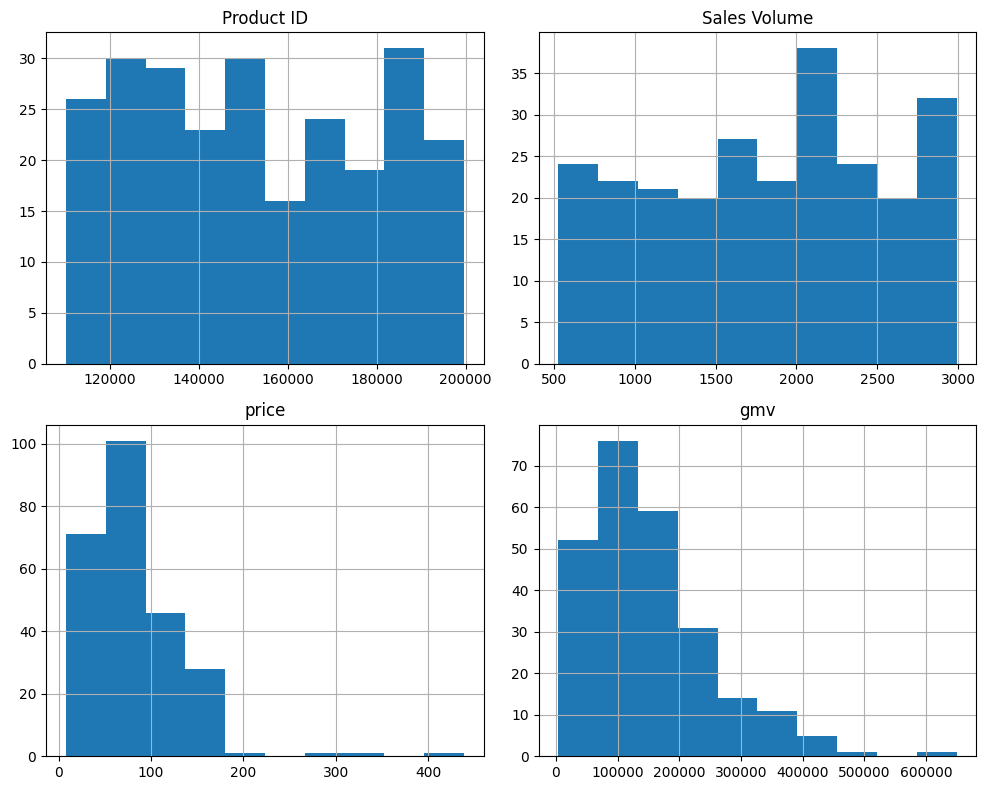

In [9]:
import matplotlib.pyplot as plt
# Create subplots for each column
df2.hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

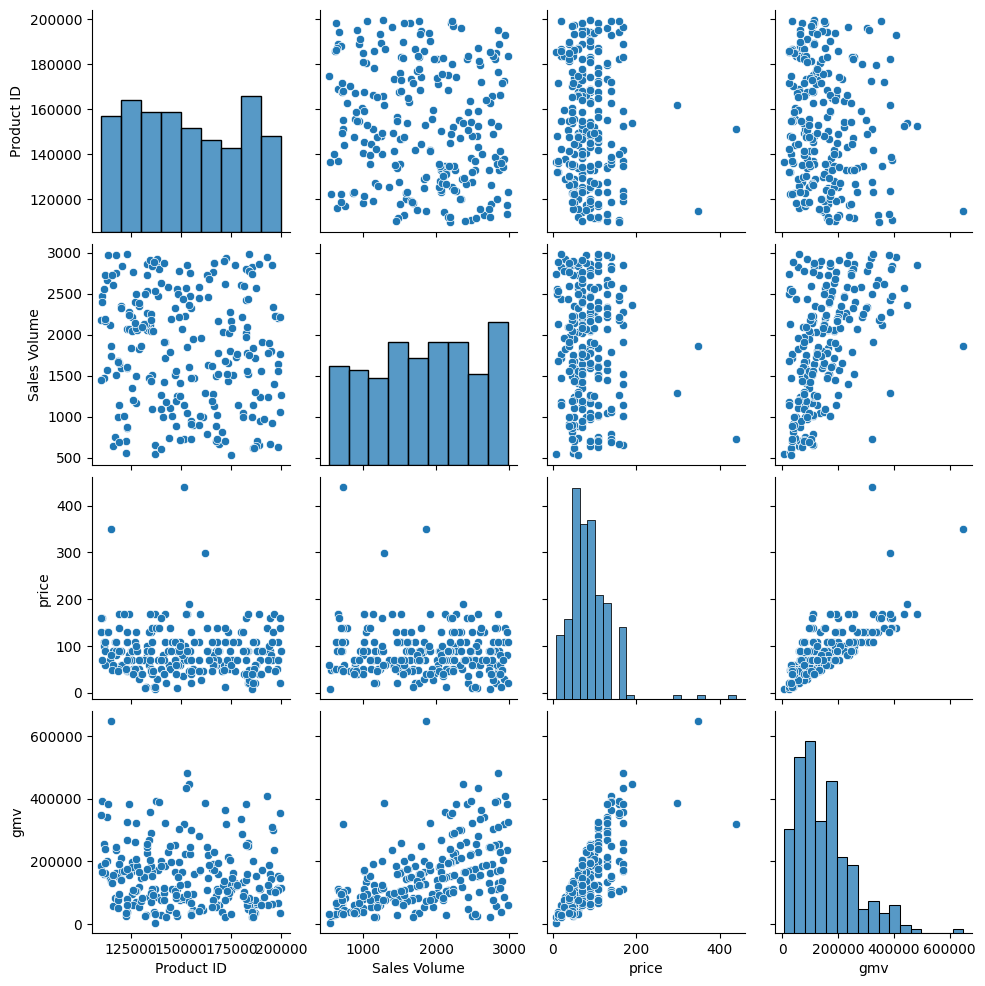

In [10]:
import seaborn as sns
sns.pairplot(df2)

In [11]:
numeric_columns=df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr = df2[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

In [12]:
#Explore how product position affects sales by grouping sales volume and GMV
sum_df2=df2.groupby(['Product Position'])[['Sales Volume','gmv']].sum()
print("Aggregation by sum")
print(sum_df2)
print("\n")

Aggregation by sum
                  Sales Volume          gmv
Product Position                           
Aisle                   177396  15481438.43
End-cap                 148913  11657842.81
Front of Store          129247  10960572.24




In [13]:
#Explore sales performance across different product categories.
sum_df2=df2.groupby(['section','terms'])[['Sales Volume','gmv']].sum()
print("Aggregation by sum")
print(sum_df2)
print("\n")

Aggregation by sum
                  Sales Volume          gmv
section terms                              
MAN     jackets         255451  25693192.87
        jeans            13320    864385.25
        shoes            57906   3754837.63
        sweaters         11868    814818.03
        t-shirts         53637   3696806.25
WOMAN   sweaters         63374   3275813.45




In [14]:
#Explore sales performance across different product categories and their positions
sum_df2=df2.groupby(['section','terms','Product Position'])[['Sales Volume','gmv']].sum()
print("Aggregation by sum")
print(round(sum_df2,2))
print("\n")

Aggregation by sum
                                   Sales Volume          gmv
section terms    Product Position                           
MAN     jackets  Aisle                   102577  10845352.85
                 End-cap                  73688   7092574.43
                 Front of Store           79186   7755265.59
        jeans    Aisle                     4599    225576.75
                 End-cap                   5171    333342.90
                 Front of Store            3550    305465.60
        shoes    Aisle                    24412   1412203.03
                 End-cap                  17906   1246929.40
                 Front of Store           15588   1095705.20
        sweaters Aisle                     2664    299187.60
                 End-cap                   8675    483943.33
                 Front of Store             529     31687.10
        t-shirts Aisle                    25786   1784450.00
                 End-cap                  19434   1300332.65
     

In [15]:
#Understanding the average price of each product category
sum_df2=df2.groupby(['section','terms'])[['Sales Volume','price','gmv']].mean()
print("Aggregation by mean")
print(round(sum_df2,2))
print("\n")

#Undestanding the average price of each product category and their positions
sum_df2=df2.groupby(['section','terms','Product Position'])[['Sales Volume','price','gmv']].mean()
print("Aggregation by mean")
print(round(sum_df2,2))
print("\n")


Aggregation by mean
                  Sales Volume   price        gmv
section terms                                    
MAN     jackets        1851.09  104.19  186182.56
        jeans          1665.00   63.92  108048.16
        shoes          1867.94   64.87  121123.79
        sweaters       1695.43   75.93  116402.58
        t-shirts       1676.16   67.43  115525.20
WOMAN   sweaters       1863.94   50.53   96347.45


Aggregation by mean
                                   Sales Volume   price        gmv
section terms    Product Position                                 
MAN     jackets  Aisle                  1899.57  108.79  200839.87
                 End-cap                1797.27   97.33  172989.62
                 Front of Store         1841.53  104.95  180355.01
        jeans    Aisle                  2299.50   41.44  112788.38
                 End-cap                1292.75   62.40   83335.73
                 Front of Store         1775.00   89.45  152732.80
        shoes    Aisle

In [16]:
#understand the affect of promotion on sales performance
sum_df2=df2.groupby(['section','terms','Promotion'])[['Sales Volume','gmv']].sum()
print("Aggregation by sum")
print(round(sum_df2,2))
print("\n")

Aggregation by sum
                            Sales Volume          gmv
section terms    Promotion                           
MAN     jackets  No               134416  12573916.27
                 Yes              121035  13119276.60
        jeans    No                 8611    573798.90
                 Yes                4709    290586.35
        shoes    No                28560   1610254.23
                 Yes               29346   2144583.40
        sweaters No                10090    690535.83
                 Yes                1778    124282.20
        t-shirts No                30264   1961878.60
                 Yes               23373   1734927.65
WOMAN   sweaters No                28371   1583705.75
                 Yes               35003   1692107.70




In [17]:
#understanding the affect of promotion on average of sales in man and woman category
sum_df2=df2.groupby(['section','Promotion'])[['Sales Volume','gmv']].sum()
print("Aggregation by mean")
print(round(sum_df2,2))
print("\n")

Aggregation by mean
                   Sales Volume          gmv
section Promotion                           
MAN     No               211941  17410383.83
        Yes              180241  17413656.20
WOMAN   No                28371   1583705.75
        Yes               35003   1692107.70




In [18]:
#count the amount of sweater in each section and position
sum_df2 = df2.groupby(['section','terms','Product Position','Promotion'])[['Product ID']].count()
sum_df2 = sum_df2[sum_df2.index.get_level_values('terms') == 'sweaters']

print("Aggregation by count")
print(round(sum_df2,2))
print("\n")

Aggregation by count
                                             Product ID
section terms    Product Position Promotion            
MAN     sweaters Aisle            No                  2
                 End-cap          No                  3
                                  Yes                 1
                 Front of Store   No                  1
WOMAN   sweaters Aisle            No                  5
                                  Yes                 5
                 End-cap          No                  6
                                  Yes                 7
                 Front of Store   No                  6
                                  Yes                 5




In [19]:
#Explore the sale performance of sweater in each section and position
sum_df2 = df2.groupby(['section','terms','Product Position','Promotion'])[['Sales Volume','gmv']].sum()
sum_df2 = sum_df2[sum_df2.index.get_level_values('terms') == 'sweaters']

print("Aggregation by sum")
print(round(sum_df2,2))
print("\n")

Aggregation by sum
                                             Sales Volume        gmv
section terms    Product Position Promotion                         
MAN     sweaters Aisle            No                 2664  299187.60
                 End-cap          No                 6897  359661.13
                                  Yes                1778  124282.20
                 Front of Store   No                  529   31687.10
WOMAN   sweaters Aisle            No                 8104  457373.60
                                  Yes                9254  457294.60
                 End-cap          No                 9193  413804.70
                                  Yes               14846  786915.40
                 Front of Store   No                11074  712527.45
                                  Yes               10903  447897.70




In [20]:
#understanding the affect of seasonal on sales performance
sum_df2 = df2.groupby(['section','Seasonal','Product Position'])[['Sales Volume','gmv']].sum()
print("Aggregation by sum")
print(round(sum_df2,2))
print("\n")

Aggregation by sum
                                   Sales Volume         gmv
section Seasonal Product Position                          
MAN     No       Aisle                    83794  7713819.37
                 End-cap                  66508  5246405.60
                 Front of Store           53982  4853461.85
        Yes      Aisle                    76244  6852950.86
                 End-cap                  58366  5210717.11
                 Front of Store           53288  4946685.24
WOMAN   No       Aisle                     1736   138706.40
                 End-cap                   7626   432269.40
                 Front of Store           10908   534623.20
        Yes      Aisle                    15622   775961.80
                 End-cap                  16413   768450.70
                 Front of Store           11069   625801.95




**Detail Findings from EDA**

**a. View of Sum. sale**
1.	There are five product categories for men, but only one for women (sweaters).
2.	Products positioned in the Aisle generate the highest sales volume and GMV, followed by End-cap and Front of Store.
3.	Top-selling men's products are jackets > shoes, t-shirts, jeans> sweaters.
4.	Mans’ product usually place in aisle and end-cap, the least in front of store. a.	Men's jackets and shoes generate the highest sales volume and GMV when positioned in the Aisle.
5.	Women's products are primarily located in End-cap and Front of Store positions, with the least presence in the Aisle.

**B. View of Avr. price**
1.	Men's jackets have the highest average price at \$104.19.
2.	Women's sweaters have an average price of \$50.53, which is 33% lower than men's sweaters at \$75.93.
3.	Women's products are primarily placed in Front of Store and End-cap positions, while men's products are primarily placed in the Aisle.
  a.	Product position impacts pricing differently across categories. Men's jackets and sweaters are cheapest when placed on End-cap and most expensive in the Aisle, while men's t-shirts and jeans are most expensive when placed in Front of Store.
  b.	While product position doesn't affect women's product pricing, sales volume and GMV follow the pattern of Front of Store > End-cap > Aisle.
  
**C. View of promotion and seasonal**
1.	Women's products have a higher promotion rate than men's products. This discrepancy might be influenced by product type. Because the proportion of Seasonal product is higher in woman than man.
2.	Men's promoted sweaters are exclusively placed on End-cap.
3.	Men's non-seasonal products perform best when placed in the Aisle and worst in Front of Store.
4.	Women's seasonal products achieve the best performance when placed on End-cap.

### 1.4 Create word clouds to identify the most common words used in product names and descriptions.

To identify the most frequently occurring product terms within the dataset, we will generate a word cloud based on the product names and descriptions. The results will be used as search keywords to scrape external data from social media, and do further analysis at **Part 2.Social Media data analysis**.

The keyword reults could refer to [here](https://docs.google.com/spreadsheets/d/1BEDH8C2uchDqpip_qP_zUMaavE1M6V3knevh-ZWNZ7A/edit?gid=1417210242#gid=1417210242)


#### 1.4.1 Word clouds for name column
To **create word clouds for product name column** in the entrant's dataset, the following **text cleaning** steps are implemented: contraction removal, conversion to lowercase, removal of excess whitespace, non-word characters, stop words, and punctuation.

Subsequently, **word tokenization** and **lemmatization** (restricting to nouns, adjectives, verbs, and adverbs) are performed. The data is vectorized into word counts and subjected to Latent Dirichlet Allocation to group words into three clusters.

Finally, **word clouds** are generated, and a **bar chart** is created using Matplotlib for visualisation.

In [21]:
target_column = 'name'

In [22]:
!pip install contractions
import re
import string
import contractions
import nltk
import gensim
from gensim.utils import simple_preprocess
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# drop data with missing values in the 'content' column
df2 = df2.dropna(subset=[target_column])

# drop duplicate review content
df2 = df2.drop_duplicates(subset=[target_column])

# remove contraction
df2[target_column] = df2[target_column].map(lambda x: contractions.fix(x))

# convert the relevant column to lowercase
df2[target_column] = df2[target_column].str.lower()

# Remove overspace
df2[target_column] = df2[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

# Remove non-word characters, so numbers and ___ etc
df2[target_column] = df2[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove punctuation
df2[target_column] = df2[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [23]:
# create a list of the contents from the 'contents' column
words = df2[target_column].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['flight']) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df2['cleaned_name'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df2.head()

Product ID Product Position Promotion Seasonal  Sales Volume  \
0      185102            Aisle        No       No          2823   
1      188771            Aisle        No       No           654   
2      180176          End-cap       Yes      Yes          2220   
3      112917            Aisle       Yes      Yes          1568   
4      192936          End-cap        No      Yes          2942   

                   name                                        description  \
0   basic puffer jacket  Puffer jacket made of tear-resistant ripstop f...   
1         tuxedo jacket  Straight fit blazer. Pointed lapel collar and ...   
2  slim fit suit jacket  Slim fit jacket. Notched lapel collar. Long sl...   
3   stretch suit jacket  Slim fit jacket made of viscose blend fabric. ...   
4   double faced jacket  Jacket made of faux leather faux shearling wit...   

    price    terms section        gmv         cleaned_name  
0   19.99  jackets     MAN   56431.77  basic puffer jacket  
1  169.00  jackets     MAN  110526.00               jacket  
2  129.00  jackets     MAN  286380.00          suit jacket  
3  129.00  jackets     MAN  202272.00  stretch suit jacket  
4  139.00  jackets     MAN  408938.00  double faced jacket

In [277]:
# vectorise the data into word counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df2['cleaned_name'])

k = 3 #this is the number of the topic

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
jacket,bomber,texture,suit,jean,basic,limited_edition,shirt,rip,sweater,wool_blend,collar,overshirt,straight,hood,block,pad,medium,color,belt,braid,heavyweight,weight,cotton,lightweight,zipper,sheer,mix,knit,wax,technical,oversized,contrast,rib,fit,effect,loafer,boucl,double,corduroy,weave,patch,penny,linen,faced,vest,boucle,denim,puffer,quilted

Topic#  2
sweater,knit,overshirt,crop,blend,stripe,sneaker,shirt,wool,basic,high,top,open,silk,neck,fine,foil,rib,contrast,plaid,abstract,dye,topstitching,tie,collar,textured,colorblock,jacket,waist,suede,cable,asymmetric,metallic,jewel,back,button,metal,mock,pearly,bead,asymmetrical,alpaca,piping,pearl,soft,fleece,gather,chunky,technical,oversized

Topic#  3
jacket,shirt,faux,leather,fit,suede,pocket,print,overshirt,sneaker,limited_edition,text,crop,contrast,wash,retro,jean,structured,sandal,puffer,abstract,strap,boot,basic,sweater,flare,weave,heart,cargo,slim,raise,wide,slide,pleated,patch,sole,boxy,shearling,interior,quilt,embroid

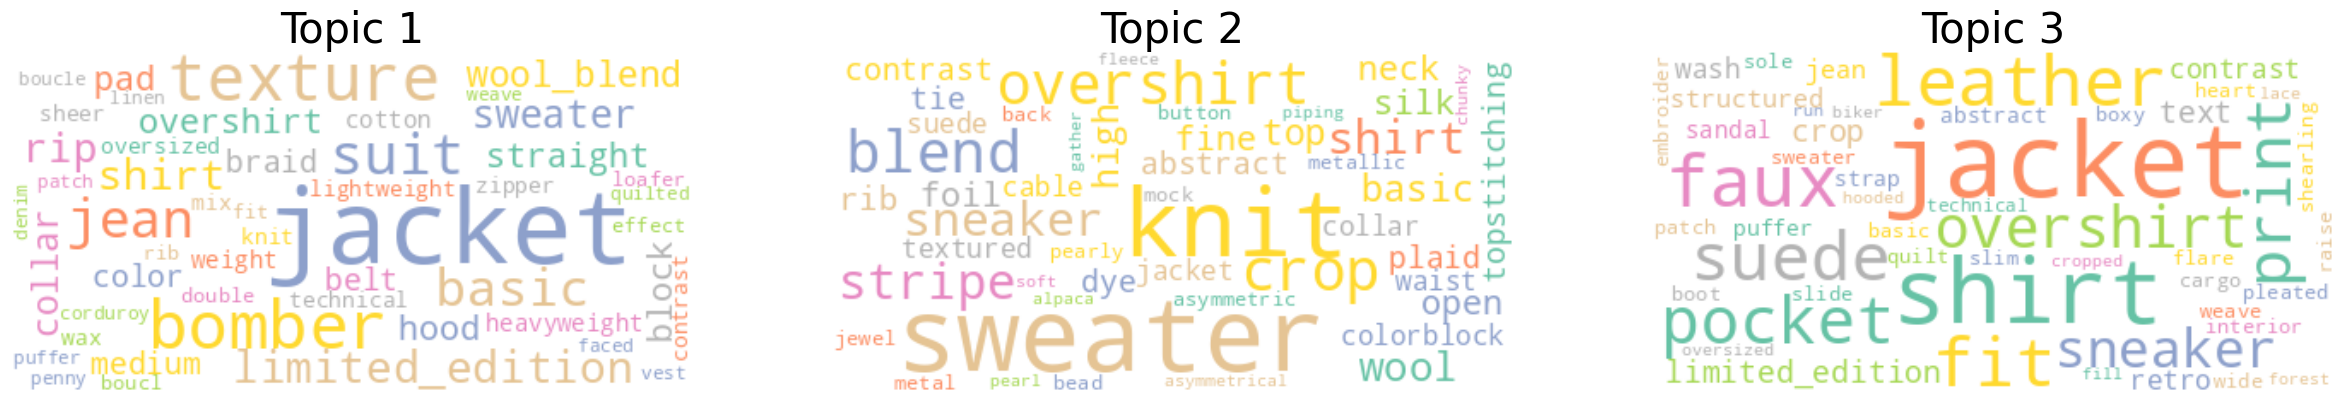

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()

#setting the visualisation of word clouds
wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')

fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")
plt.savefig('feature cloud_all.png', dpi=300)

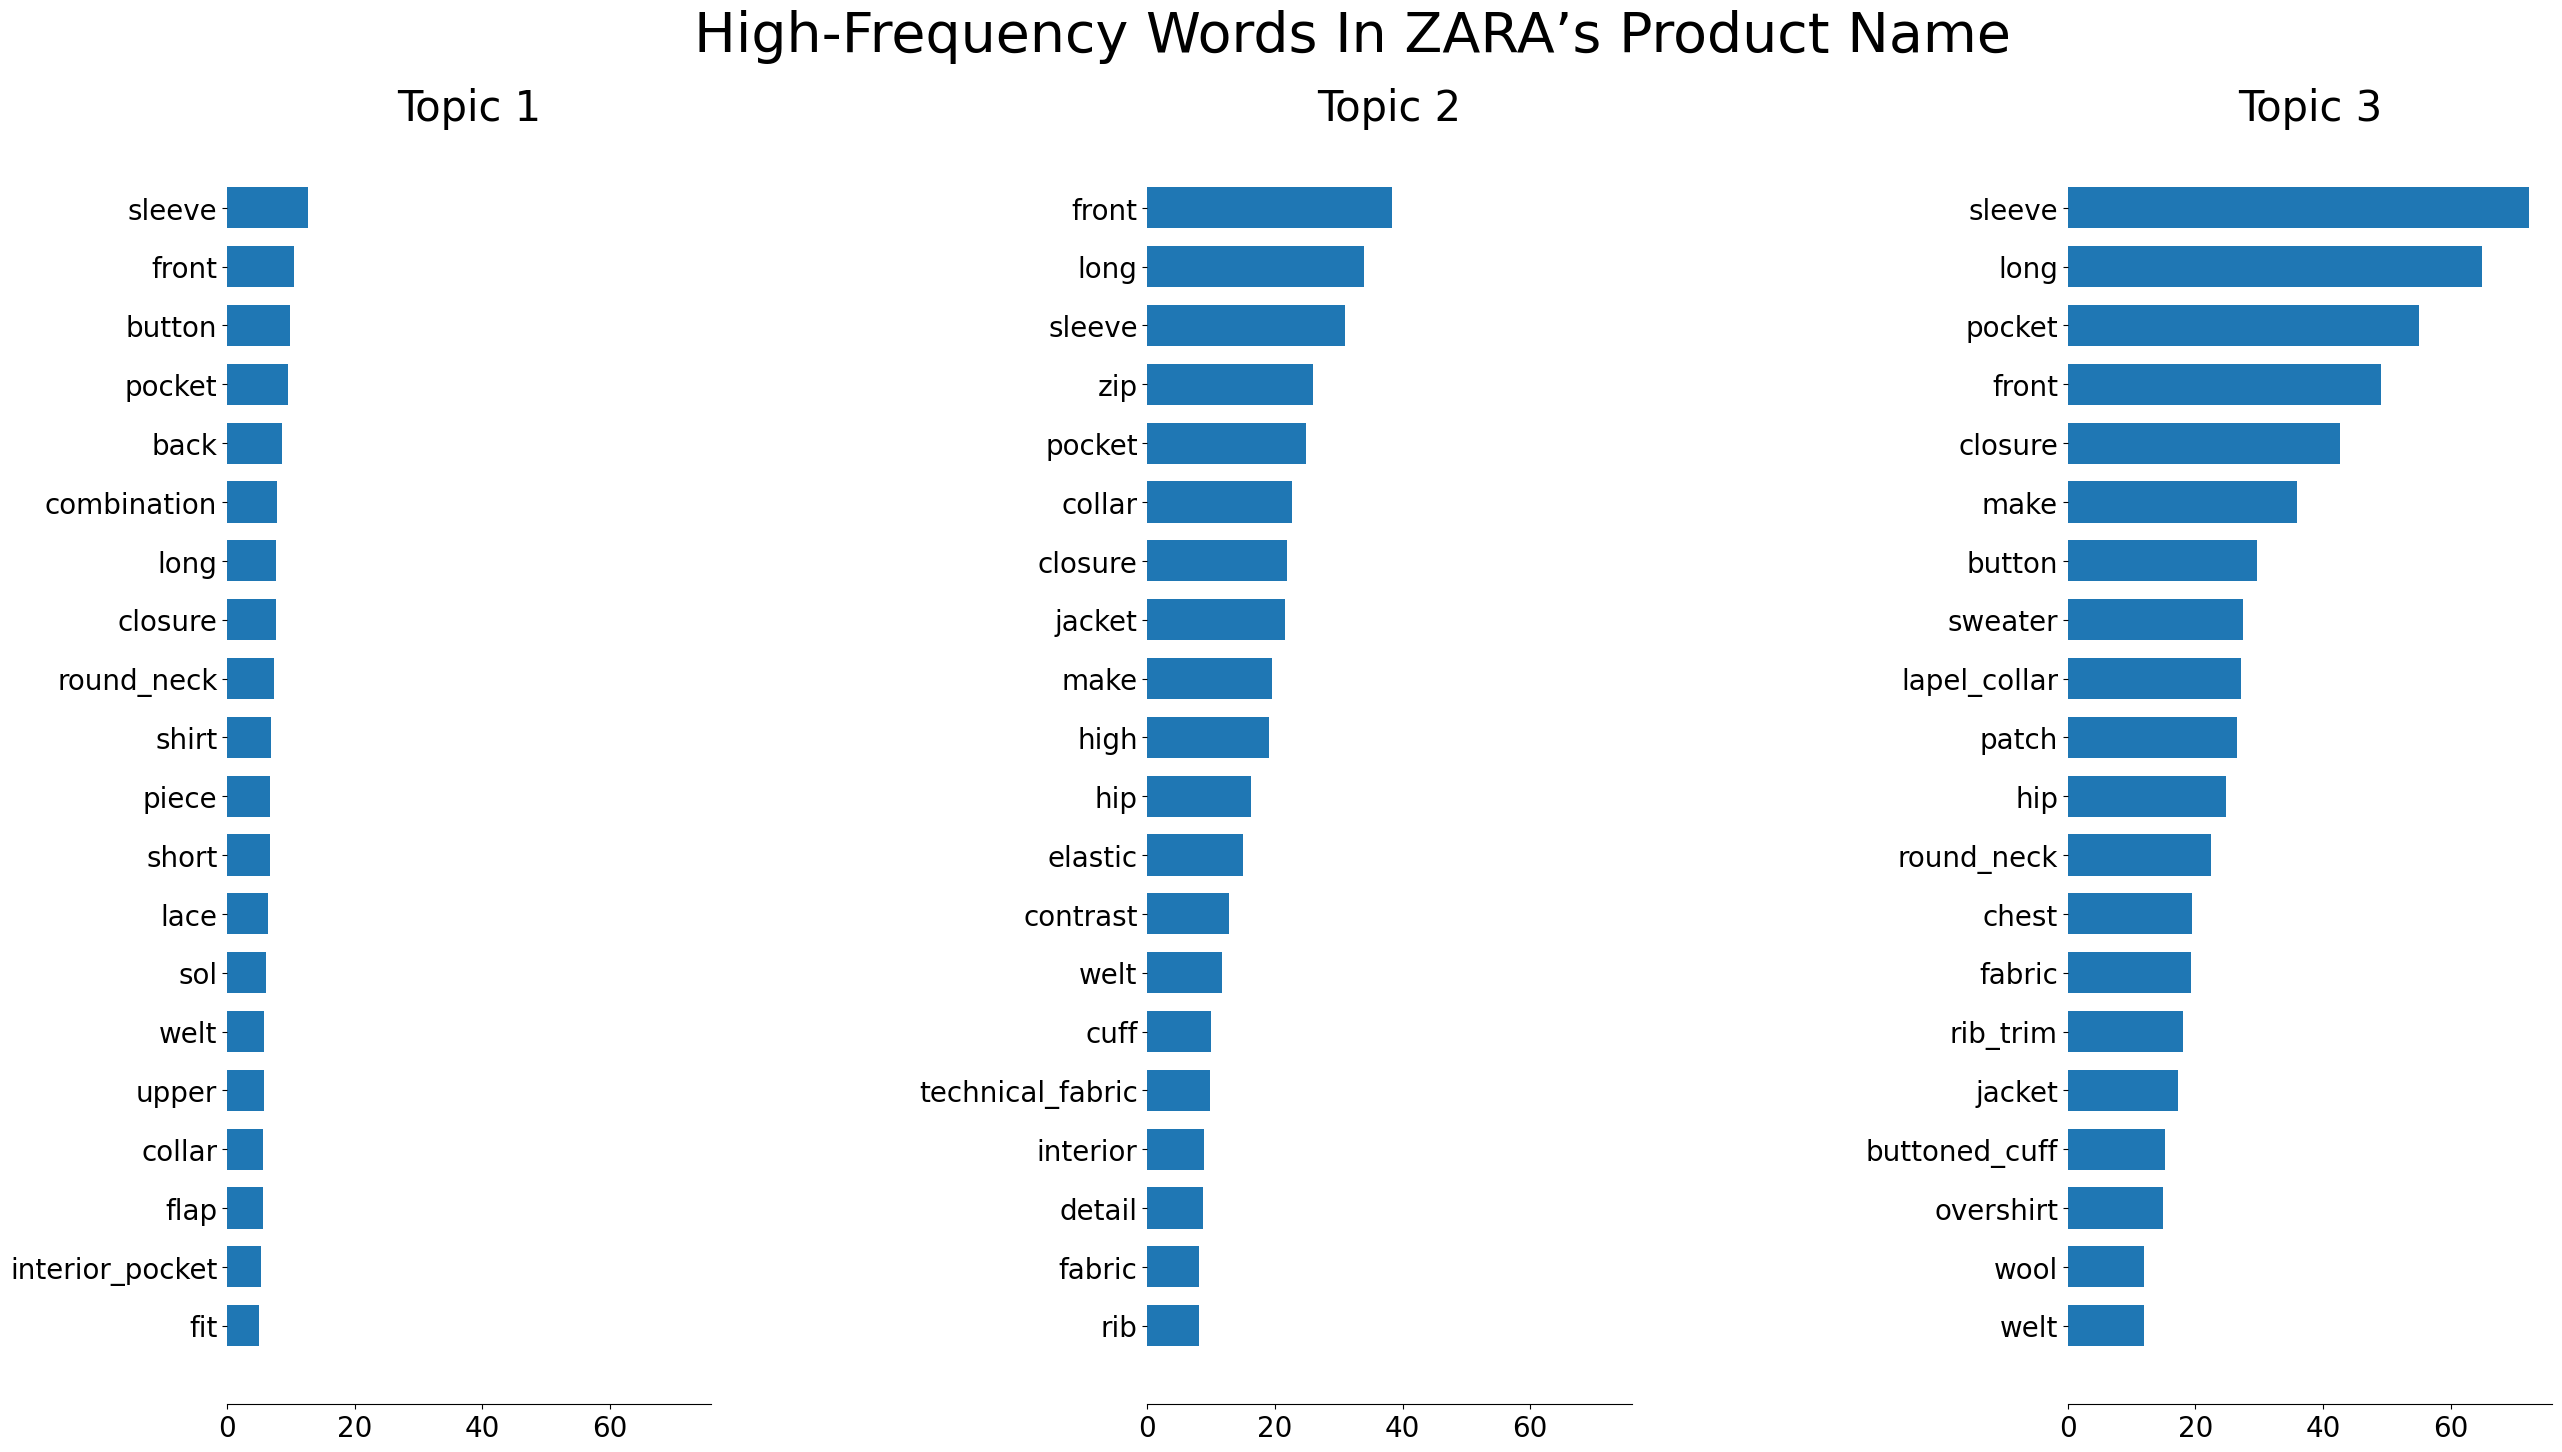

<Figure size 640x480 with 0 Axes>

In [287]:
# Visualise the result into bar charts in topic
%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'High-Frequency Words In ZARA’s Product Name')
plt.savefig('featurebar_all.png', dpi=300)

#### 1.4.2 Word cloud for description column
To create word clouds for the product description column, the same text processing steps used for the product name word clouds will be applied. This includes **text cleaning, word tokenization, lemmatization, word cloud generation, and the creation of a bar chart** for visualisation.

In [28]:
target_column = 'description'

In [29]:
!pip install contractions
import re
import string
import contractions
import nltk
import gensim
from gensim.utils import simple_preprocess
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# drop data with missing values in the 'content' column
df2 = df2.dropna(subset=[target_column])

# drop duplicate review content
df2 = df2.drop_duplicates(subset=[target_column])

# remove contraction
df2[target_column] = df2[target_column].map(lambda x: contractions.fix(x))

# convert the relevant column to lowercase
df2[target_column] = df2[target_column].str.lower()

# Remove overspace
df2[target_column] = df2[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

# Remove non-word characters, so numbers and ___ etc
df2[target_column] = df2[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove punctuation
df2[target_column] = df2[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
# create a list of the contents from the 'contents' column
words = df2[target_column].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['flight']) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents
rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df2['cleaned_description'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df2.head()

Product ID Product Position Promotion Seasonal  Sales Volume  \
0      185102            Aisle        No       No          2823   
1      188771            Aisle        No       No           654   
2      180176          End-cap       Yes      Yes          2220   
3      112917            Aisle       Yes      Yes          1568   
4      192936          End-cap        No      Yes          2942   

                   name                                        description  \
0   basic puffer jacket  puffer jacket made of tear resistant ripstop f...   
1         tuxedo jacket  straight fit blazer  pointed lapel collar and ...   
2  slim fit suit jacket  slim fit jacket  notched lapel collar  long sl...   
3   stretch suit jacket  slim fit jacket made of viscose blend fabric  ...   
4   double faced jacket  jacket made of faux leather faux shearling wit...   

    price    terms section        gmv         cleaned_name  \
0   19.99  jackets     MAN   56431.77  basic puffer jacket   
1  169.00  jackets     MAN  110526.00               jacket   
2  129.00  jackets     MAN  286380.00          suit jacket   
3  129.00  jackets     MAN  202272.00  stretch suit jacket   
4  139.00  jackets     MAN  408938.00  double faced jacket   

                                 cleaned_description  
0  jacket make tear resistant fabric high collar ...  
1  straight_fit blazer point lapel_collar long sl...  
2  slim fit jacket collar long sleeve welt pocket...  
3  slim fit jacket make viscose collar long sleev...  
4  jacket make faux leather faux_shearling fleece...

In [281]:
# vectorise the data into word counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df2['cleaned_description'])

k = 3 #this is the number of the topic

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
sleeve,front,button,pocket,back,combination,long,closure,round_neck,shirt,piece,short,lace,sol,welt,upper,collar,flap,interior_pocket,fit,straight_fit,make,eyelet,leather,hip,detail,contrast,eyelets_chunky,jacket,rip,washed_effect,side,waist,rib_trim,cotton_knit,color,rounded_shape,sneaker,shoulder,print,sneakers_upper,chest,back_vent,material,chunky_lug,blazer,jean,irregular_design,boot,finish

Topic#  2
front,long,sleeve,zip,pocket,collar,closure,jacket,make,high,hip,elastic,contrast,welt,cuff,technical_fabric,interior,detail,fabric,rib,rib_trim,adjustable,washed_effect,flap,strap,leather,interior_pocket,back,patch,round_neck,shirt,hide,sleeve_sweat,print,trim,side_elastic,hem,text,zipper,hood,full_cut,tonal,short,wide,lapel_collar,instep,sandal,crop,asymmetric,faux

Topic#  3
sleeve,long,pocket,front,closure,make,button,sweater,lapel_collar,patch,hip,round_neck,chest,fabric,rib_trim,jacket,buttoned_cuff,overshirt,wool,welt,relaxed_fit,short,washed_effect,zip,flap,neck,shir

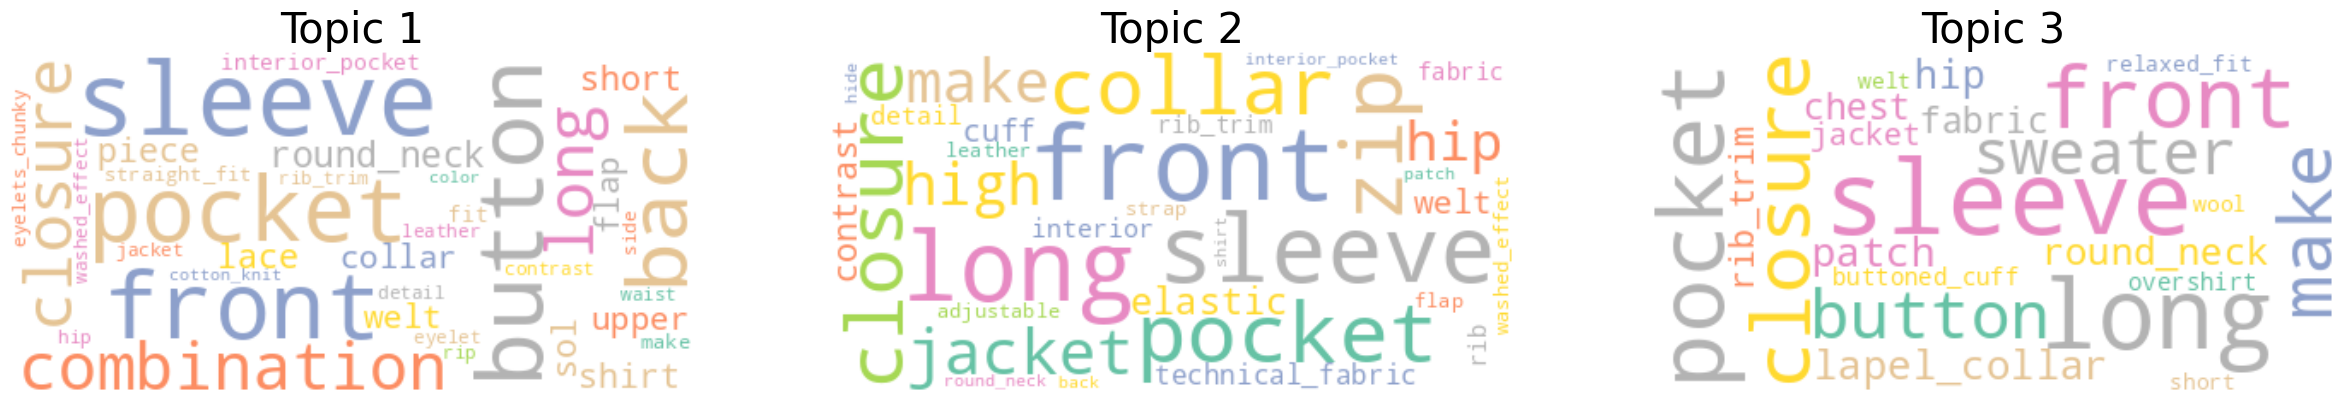

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()

#setting the visualisation of word clouds
wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')

fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")
#plt.savefig('featurecould_all.png', dpi=300)

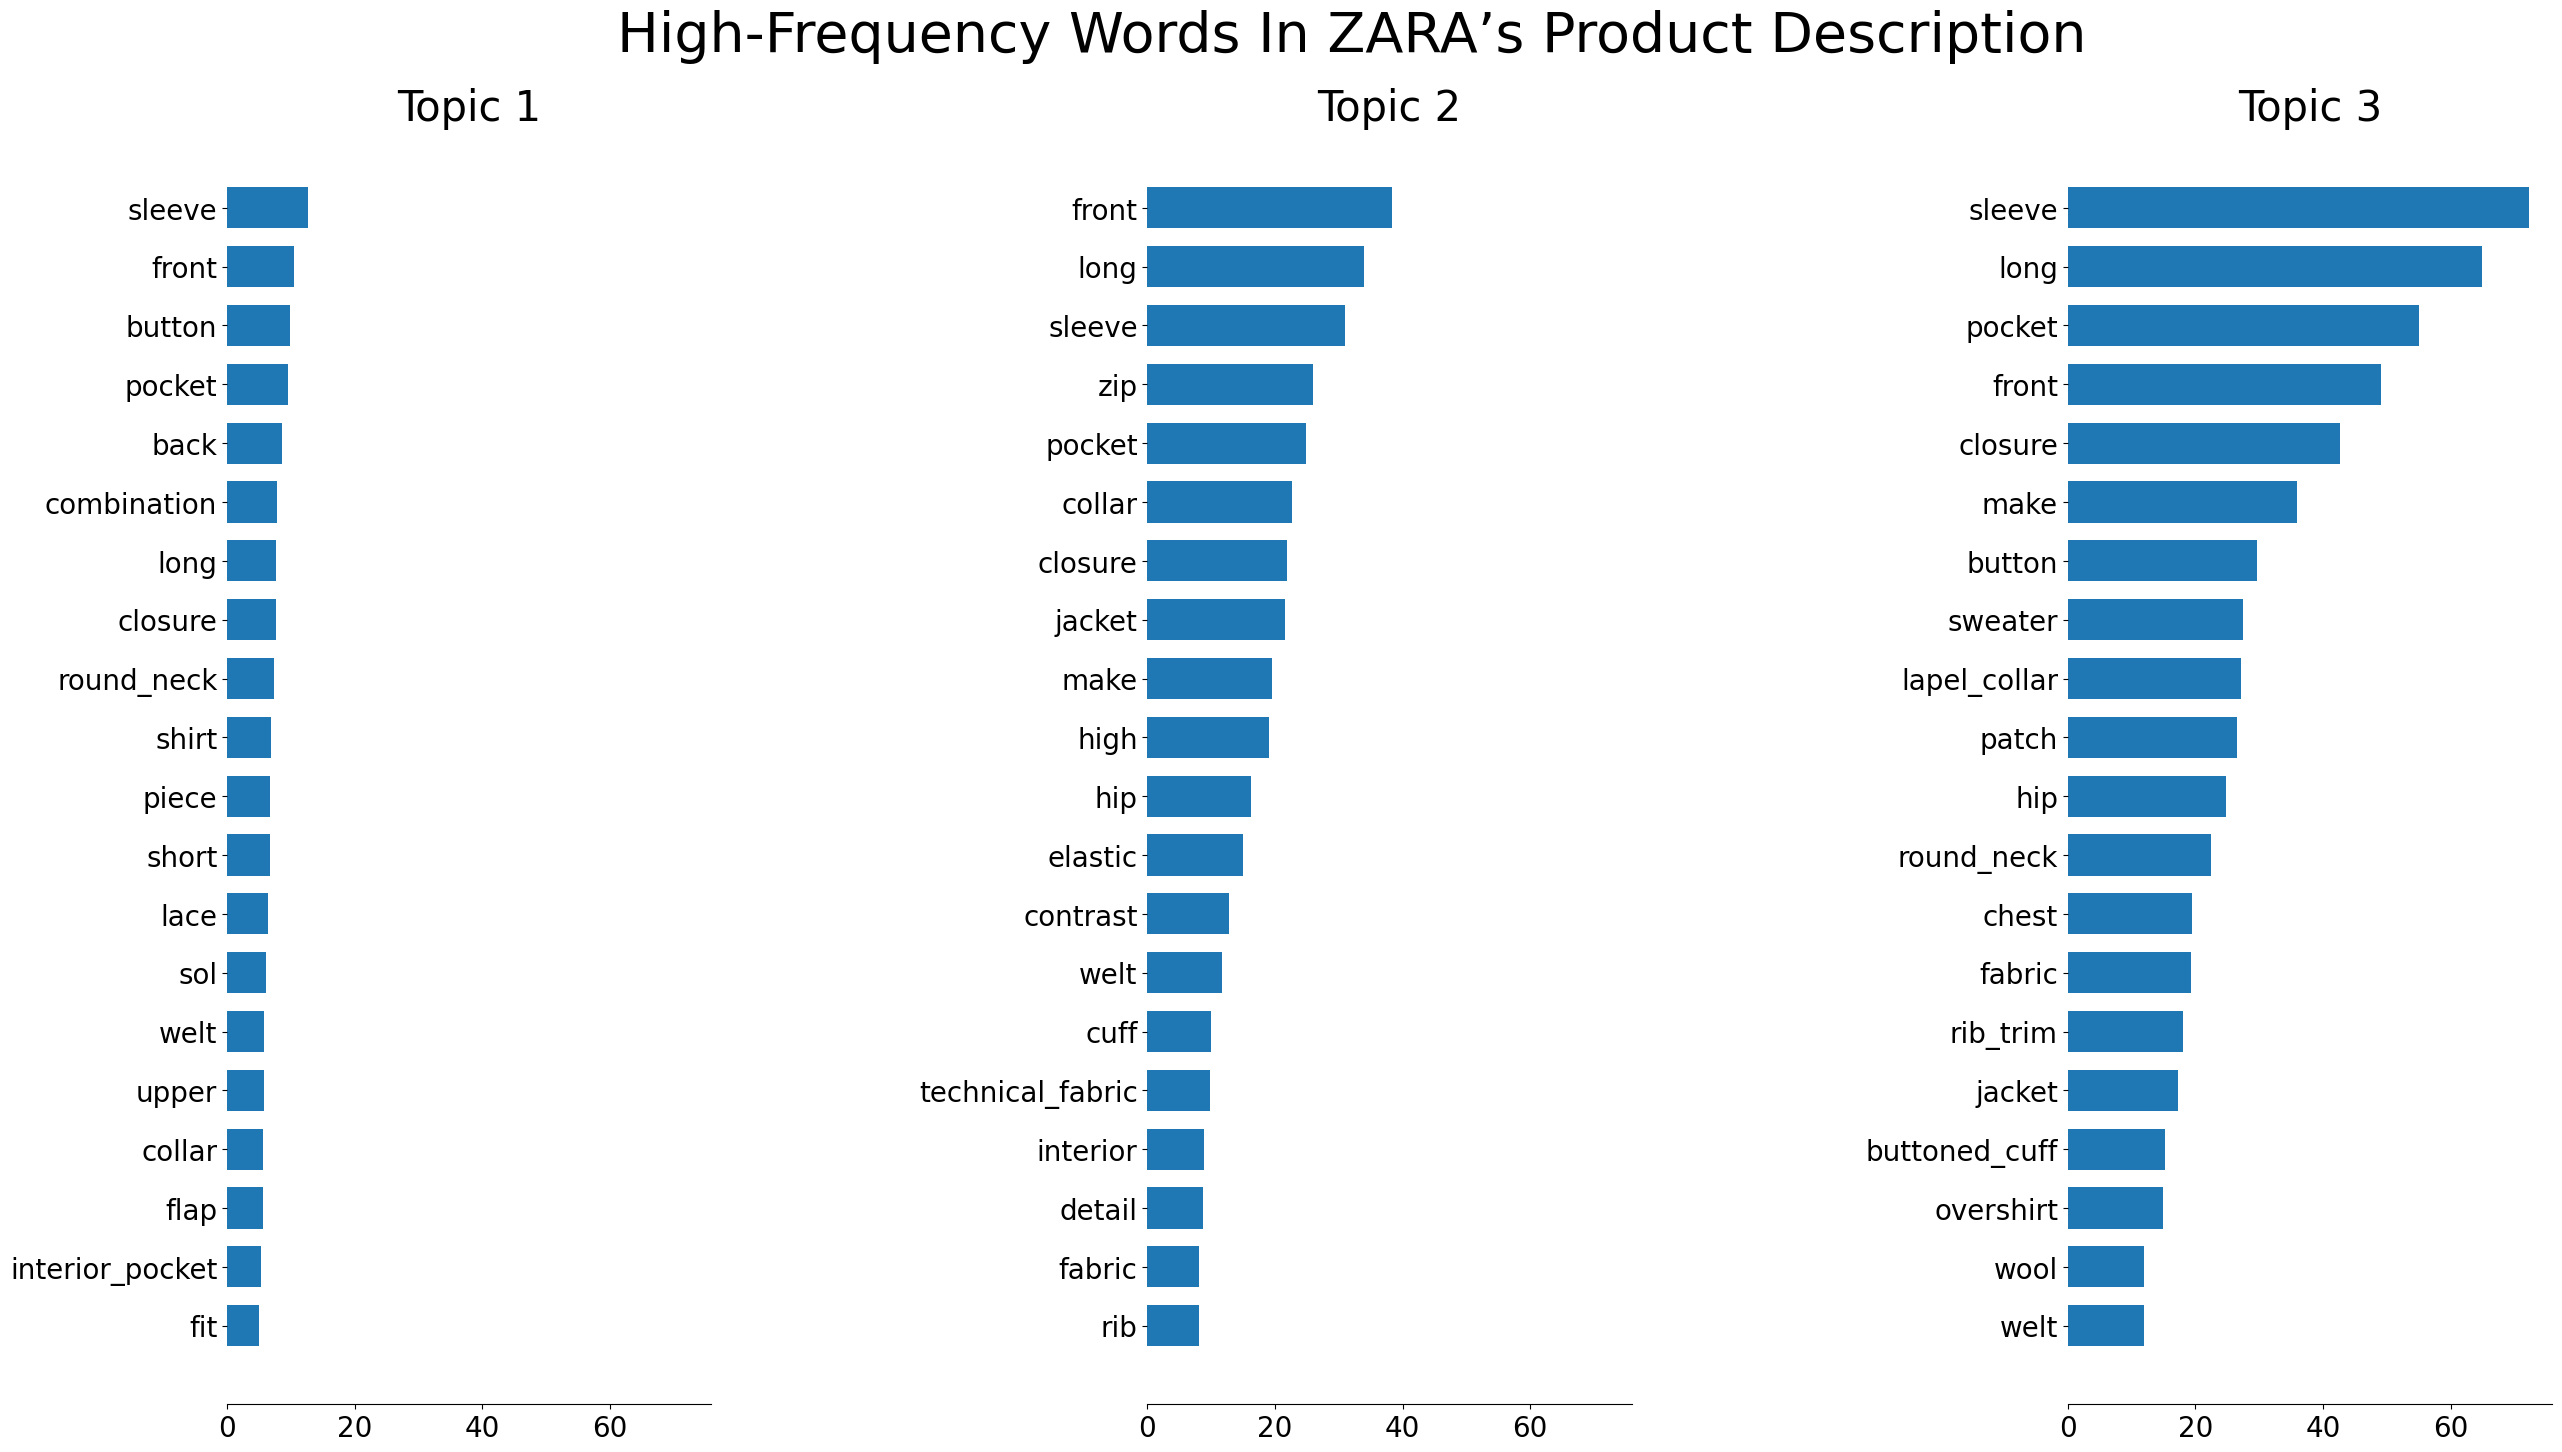

<Figure size 640x480 with 0 Axes>

In [285]:
# Visualise the result into bar charts in topic
%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'High-Frequency Words In ZARA’s Product Description')
plt.savefig('feature_bar_all.png', dpi=300)

## 2. Product internal analysis

In this section, entrant products are categorised by type and positioned on the **Boston Consulting Group (BCG) matrix** to determine their market position. Products in the **star and cash cow quadrants** are further analysed by **plotting their growth rate and market share on a scatter graph** and **creating word clouds of their product features** to identify distinctive characteristics. Finally, as a suggestion for future research, Support Vector Regression (SVR) could be utilised to predict future sales, offering valuable insights.

### 2.1 Segmenting products using the BCG matrix

In this subsection, irrelevant columns are removed, including 'Product Position', 'Promotion', and 'Seasonal'. Second, New columns are added, 'last_mon_SV' and 'last_mon_gmv'.

Additionally, to meet the requirements for the BCG matrix indicator, **random numbers will be assigned as the same quater in last year's sales volumes**. Based on the growth rate observed between ZARA's 2023Q1 and 2024Q1 sales (**9.6%**), the range of random nuber will be adjusted by ** the highest and lowest sales volumes divid 1.096** in the 2024 dataset to estimate their corresponding values for the previous year.

**It's important to note that this is a hypothetical example for testing purposes. In a real-world scenario, entrants or enterprises should use their actual historical sales data.**

#### 2.1.1 Calculation metrics for BCG matrix

In [ ]:
#check the highest and lowest sales volumes in the 2024 dataset
sorted(df2['Sales Volume'])

[529,
 542,
 558,
 606,
 622,
 624,
 628,
 647,
 654,
 656,
 702,
 706,
 707,
 718,
 729,
 729,
 730,
 743,
 758,
 786,
 818,
 867,
 880,
 881,
 892,
 897,
 917,
 923,
 943,
 952,
 966,
 991,
 994,
 996,
 1012,
 1041,
 1094,
 1094,
 1105,
 1135,
 1145,
 1165,
 1180,
 1188,
 1191,
 1204,
 1237,
 1245,
 1249,
 1260,
 1269,
 1278,
 1290,
 1296,
 1350,
 1401,
 1412,
 1435,
 1448,
 1466,
 1466,
 1474,
 1498,
 1500,
 1506,
 1506,
 1513,
 1524,
 1524,
 1552,
 1553,
 1558,
 1563,
 1568,
 1592,
 1608,
 1622,
 1633,
 1644,
 1658,
 1659,
 1669,
 1678,
 1685,
 1712,
 1717,
 1733,
 1736,
 1752,
 1770,
 1773,
 1778,
 1792,
 1796,
 1831,
 1832,
 1841,
 1847,
 1860,
 1866,
 1899,
 1915,
 1916,
 1917,
 1942,
 1961,
 1978,
 2016,
 2019,
 2040,
 2045,
 2048,
 2060,
 2063,
 2065,
 2067,
 2071,
 2074,
 2076,
 2084,
 2089,
 2093,
 2097,
 2114,
 2124,
 2133,
 2135,
 2141,
 2164,
 2179,
 2185,
 2193,
 2211,
 2220,
 2226,
 2240,
 2265,
 2273,
 2277,
 2321,
 2325,
 2339,
 2356,
 2366,
 2386,
 2397,
 2421,
 2434

In [271]:
#reorder the columns and drop columns (Product Position,	Promotion,	Seasonal)
df3 = df2[['section','terms','Product ID','name', 'description', 'price', 'Sales Volume', 'gmv']]

#generate the sales volume for 2023Q1 (9.6%)
df3['2023_SV'] =  np.random.randint(483,2727, df3.shape[0])

#calculate last month gmv (Gross Merchandise Value)
df3['2023_gmv'] = df3['2023_SV'] * df3['price']
df3.head()

<ipython-input-271-7d8c7b9fac20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['2023_SV'] =  np.random.randint(483,2727, df3.shape[0])
<ipython-input-271-7d8c7b9fac20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['2023_gmv'] = df3['2023_SV'] * df3['price']


section    terms  Product ID                  name  \
0     MAN  jackets      185102   basic puffer jacket   
1     MAN  jackets      188771         tuxedo jacket   
2     MAN  jackets      180176  slim fit suit jacket   
3     MAN  jackets      112917   stretch suit jacket   
4     MAN  jackets      192936   double faced jacket   

                                         description   price  Sales Volume  \
0  puffer jacket made of tear resistant ripstop f...   19.99          2823   
1  straight fit blazer  pointed lapel collar and ...  169.00           654   
2  slim fit jacket  notched lapel collar  long sl...  129.00          2220   
3  slim fit jacket made of viscose blend fabric  ...  129.00          1568   
4  jacket made of faux leather faux shearling wit...  139.00          2942   

         gmv  2023_SV   2023_gmv  
0   56431.77     1168   23348.32  
1  110526.00      957  161733.00  
2  286380.00      631   81399.00  
3  202272.00     1940  250260.00  
4  408938.00     2322  322758.00

In [272]:
#Create a new column that combines section and term data, allowing for the separation of women and men using the same terms.
df3['category'] = df3[['section', 'terms']].agg('_'.join, axis=1)
df3

<ipython-input-272-2cc21c2a49de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['category'] = df3[['section', 'terms']].agg('_'.join, axis=1)


section     terms  Product ID                                   name  \
0       MAN   jackets      185102                    basic puffer jacket   
1       MAN   jackets      188771                          tuxedo jacket   
2       MAN   jackets      180176                   slim fit suit jacket   
3       MAN   jackets      112917                    stretch suit jacket   
4       MAN   jackets      192936                    double faced jacket   
..      ...       ...         ...                                    ...   
221     MAN  t-shirts      141330    raised text t shirt limited edition   
223     MAN  t-shirts      155010  semi sheer knit shirt limited edition   
224     MAN  t-shirts      135857             viscose blend knit t shirt   
225     MAN  t-shirts      147690               striped jacquard t shirt   
226     MAN  t-shirts      130321            abstract print knit t shirt   

                                           description   price  Sales Volume  \
0    puffer jacket made of tear resistant ripstop f...   19.99          2823   
1    straight fit blazer  pointed lapel collar and ...  169.00           654   
2    slim fit jacket  notched lapel collar  long sl...  129.00          2220   
3    slim fit jacket made of viscose blend fabric  ...  129.00          1568   
4    jacket made of faux leather faux shearling wit...  139.00          2942   
..                                                 ...     ...           ...   
221  full cut t shirt with round neck and short sle...   39.90          1915   
223  slim fit shirt made of wrinkle effect fabric  ...   45.90           729   
224  knit shirt in viscose blend fabric  mock neck ...   45.90          2045   
225  relaxed fit t shirt with round neck and short ...   39.90           881   
226  cotton knit t shirt  round neck and short slee...   39.90          2093   

           gmv  2023_SV   2023_gmv      category  
0     56431.77     1168   23348.32   MAN_jackets  
1    110526.00      957  161733.00   MAN_jackets  
2    286380.00      631   81399.00   MAN_jackets  
3    202272.00     1940  250260.00   MAN_jackets  
4    408938.00     2322  322758.00   MAN_jackets  
..         ...      ...        ...           ...  
221   76408.50     1861   74253.90  MAN_t-shirts  
223   33461.10     1002   45991.80  MAN_t-shirts  
224   93865.50     2001   91845.90  MAN_t-shirts  
225   35151.90      773   30842.70  MAN_t-shirts  
226   83510.70     1422   56737.80  MAN_t-shirts  

[193 rows x 11 columns]

In [273]:
#remove section and terms cloumns
df3.drop(columns=['section','terms'])

Product ID                                   name  \
0        185102                    basic puffer jacket   
1        188771                          tuxedo jacket   
2        180176                   slim fit suit jacket   
3        112917                    stretch suit jacket   
4        192936                    double faced jacket   
..          ...                                    ...   
221      141330    raised text t shirt limited edition   
223      155010  semi sheer knit shirt limited edition   
224      135857             viscose blend knit t shirt   
225      147690               striped jacquard t shirt   
226      130321            abstract print knit t shirt   

                                           description   price  Sales Volume  \
0    puffer jacket made of tear resistant ripstop f...   19.99          2823   
1    straight fit blazer  pointed lapel collar and ...  169.00           654   
2    slim fit jacket  notched lapel collar  long sl...  129.00          2220   
3    slim fit jacket made of viscose blend fabric  ...  129.00          1568   
4    jacket made of faux leather faux shearling wit...  139.00          2942   
..                                                 ...     ...           ...   
221  full cut t shirt with round neck and short sle...   39.90          1915   
223  slim fit shirt made of wrinkle effect fabric  ...   45.90           729   
224  knit shirt in viscose blend fabric  mock neck ...   45.90          2045   
225  relaxed fit t shirt with round neck and short ...   39.90           881   
226  cotton knit t shirt  round neck and short slee...   39.90          2093   

           gmv  2023_SV   2023_gmv      category  
0     56431.77     1168   23348.32   MAN_jackets  
1    110526.00      957  161733.00   MAN_jackets  
2    286380.00      631   81399.00   MAN_jackets  
3    202272.00     1940  250260.00   MAN_jackets  
4    408938.00     2322  322758.00   MAN_jackets  
..         ...      ...        ...           ...  
221   76408.50     1861   74253.90  MAN_t-shirts  
223   33461.10     1002   45991.80  MAN_t-shirts  
224   93865.50     2001   91845.90  MAN_t-shirts  
225   35151.90      773   30842.70  MAN_t-shirts  
226   83510.70     1422   56737.80  MAN_t-shirts  

[193 rows x 9 columns]

In [274]:
# Calculate the total sales amount and gmv for each category
sum_df3=df3.groupby(['category'])[['Sales Volume','gmv','2023_SV',	'2023_gmv']].sum()
sum_df3

Sales Volume          gmv  2023_SV     2023_gmv
category                                                       
MAN_jackets           188369  19549589.91   163378  17551345.13
MAN_jeans              11894    764707.85    10574    760685.62
MAN_shoes              53883   3453749.93    45316   2756002.59
MAN_sweaters            7996    376551.23     7920    422169.44
MAN_t-shirts           24594    946650.60    22692    869094.80
WOMAN_sweaters         63374   3275813.45    59110   2848836.97

In [275]:
# calculate share rate
sum_df3.loc[:, 'product_share_rate'] = (sum_df3['gmv'] / sum_df3['gmv'].sum()).round(3)

# caculate growth rate
sum_df3['product_growth_rate']= (sum_df3['Sales Volume']/sum_df3['2023_SV']-1).round(2)
sum_df3

Sales Volume          gmv  2023_SV     2023_gmv  \
category                                                          
MAN_jackets           188369  19549589.91   163378  17551345.13   
MAN_jeans              11894    764707.85    10574    760685.62   
MAN_shoes              53883   3453749.93    45316   2756002.59   
MAN_sweaters            7996    376551.23     7920    422169.44   
MAN_t-shirts           24594    946650.60    22692    869094.80   
WOMAN_sweaters         63374   3275813.45    59110   2848836.97   

                product_share_rate  product_growth_rate  
category                                                 
MAN_jackets                  0.689                 0.15  
MAN_jeans                    0.027                 0.12  
MAN_shoes                    0.122                 0.19  
MAN_sweaters                 0.013                 0.01  
MAN_t-shirts                 0.033                 0.08  
WOMAN_sweaters               0.115                 0.07

#### 2.1.2 Create BCG matrix graph by category
code source:https://www.kaggle.com/code/mmalam/bcg-matrix


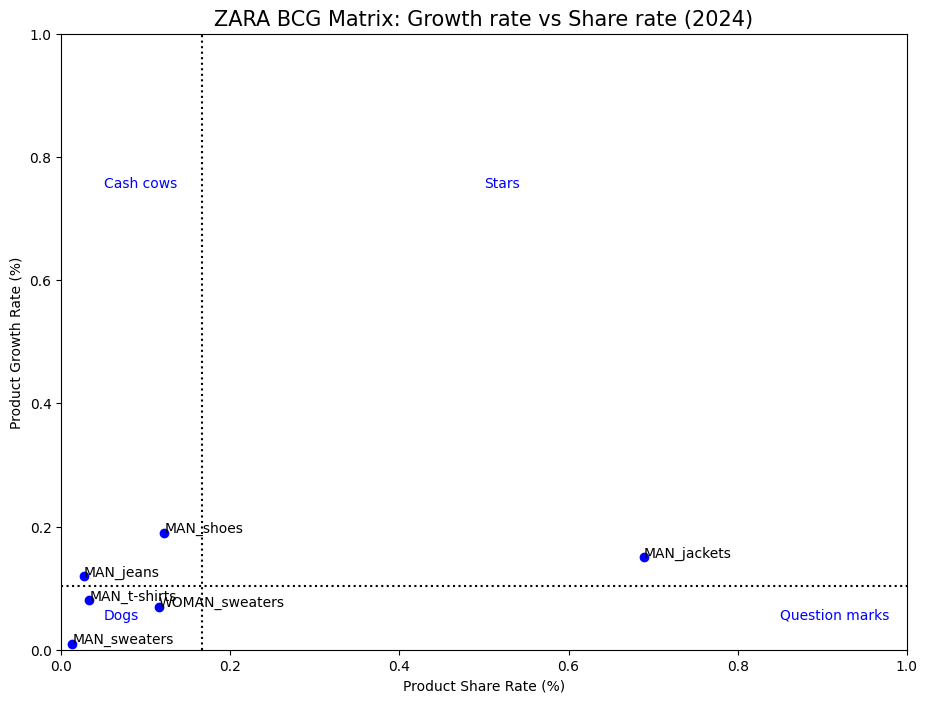

In [276]:
# caculate threshold
market_grow=sum_df3["product_growth_rate"].mean()
market_share=sum_df3["product_share_rate"].mean()

# plot
plt.figure(figsize=(24,8))
ax=plt.subplot(121)
plt.scatter(x=sum_df3["product_share_rate"],y=sum_df3["product_growth_rate"],color="blue")
plt.xlabel("Product Share Rate (%)")
plt.ylabel("Product Growth Rate (%)")
plt.hlines(market_grow,0,1,color='k',linestyles='dotted')
plt.vlines(market_share,0,1,color='k',linestyles='dotted')
plt.text(0.5,0.75,"Stars",color="blue")
plt.text(0.85,0.05,"Question marks",color="blue")
plt.text(0.05,0.75,"Cash cows",color="blue")
plt.text(0.05,0.05,"Dogs",color="blue")
plt.xlim(0.00,1.00)
plt.ylim(0.00,1.00)
plt.title("ZARA BCG Matrix: Growth rate vs Share rate (2024)",size=15)
for index, row in sum_df3.iterrows():
    ax.annotate(f"{index}", (row["product_share_rate"], row["product_growth_rate"]))
#sum_df3.apply(lambda r: ax.annotate(r[sum_df3["product_share_rate"]].astype(str)+','+r[sum_df3["product_growth_rate"]].astype(str),
#                                       (r.x*1.02, r.y*1.02)), axis=1)
plt.show()
#plt.savefig('bcg_matrix.png', dpi=300)

### 2.2 In-Depth Analysis of the Star Product - Jacket

In this subsection, we are going to analyses **men's jackets**, as a product category located in the star quadrant. To understand the entire range of jacket products offered by the entrant, **the growth rate and market share** of each jacket are calculated. Subsequently, **a scatter plot** is created to visualise the distribution of jackets' growth rates and market shares across all items . Additionally,**a word cloud** is created for the jacket category to identify its distinctive features. Finally, **as a suggestion for future research, a Support Vector Regression (SVR) model can be employed** to predict future sales within the target market, aiding decision-makers in formulating more effective expansion strategies.

#### 2.2.1 Calculate the product growth rate and product share rate for each man jackets.

In [ ]:
#Focus solely on the Man_jacket product and filter out the rest
df4=df3[df3['category'] == 'MAN_jackets']
df4

section    terms  Product ID                                     name  \
0       MAN  jackets      185102                      basic puffer jacket   
1       MAN  jackets      188771                            tuxedo jacket   
2       MAN  jackets      180176                     slim fit suit jacket   
3       MAN  jackets      112917                      stretch suit jacket   
4       MAN  jackets      192936                      double faced jacket   
..      ...      ...         ...                                      ...   
126     MAN  jackets      144012  overshirt with contrasting topstitching   
127     MAN  jackets      147051             quilted structured overshirt   
128     MAN  jackets      185800                      technical overshirt   
194     MAN  jackets      123230               striped textured overshirt   
195     MAN  jackets      154676                         fleece overshirt   

                                           description   price  Sales Volume  \
0    puffer jacket made of tear resistant ripstop f...   19.99          2823   
1    straight fit blazer  pointed lapel collar and ...  169.00           654   
2    slim fit jacket  notched lapel collar  long sl...  129.00          2220   
3    slim fit jacket made of viscose blend fabric  ...  129.00          1568   
4    jacket made of faux leather faux shearling wit...  139.00          2942   
..                                                 ...     ...           ...   
126  relaxed fit overshirt made with cotton fabric ...   59.90           743   
127  regular fit overshirt with quilted interior  l...  109.00          2325   
128  regular fit overshirt with lightly padded inte...  109.00          1841   
194  relaxed fit overshirt  lapel collar and long s...   69.90           880   
195  regular fit overshirt  lapel collar and long s...   69.90           943   

           gmv  2023_SV   2023_gmv     category  
0     56431.77     1082   21629.18  MAN_jackets  
1    110526.00     2708  457652.00  MAN_jackets  
2    286380.00      553   71337.00  MAN_jackets  
3    202272.00     1693  218397.00  MAN_jackets  
4    408938.00      506   70334.00  MAN_jackets  
..         ...      ...        ...          ...  
126   44505.70      909   54449.10  MAN_jackets  
127  253425.00     1251  136359.00  MAN_jackets  
128  200669.00     1876  204484.00  MAN_jackets  
194   61512.00     2207  154269.30  MAN_jackets  
195   65915.70     2403  167969.70  MAN_jackets  

[103 rows x 11 columns]

In [ ]:
#Caculate share rate for each Man_jacket product
df4.loc[:, 'product_share_rate'] = (df4['gmv'] / df4['gmv'].sum()).round(3)

#Caculate growth rate for each Man_jacket product
df4['product_growth_rate']= (df4['Sales Volume']/df4['2023_SV']-1).round(2)

df4

<ipython-input-807-9b4594365787>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['product_growth_rate']= (df4['Sales Volume']/df4['2023_SV']-1).round(2)


section    terms  Product ID                                     name  \
0       MAN  jackets      185102                      basic puffer jacket   
1       MAN  jackets      188771                            tuxedo jacket   
2       MAN  jackets      180176                     slim fit suit jacket   
3       MAN  jackets      112917                      stretch suit jacket   
4       MAN  jackets      192936                      double faced jacket   
..      ...      ...         ...                                      ...   
126     MAN  jackets      144012  overshirt with contrasting topstitching   
127     MAN  jackets      147051             quilted structured overshirt   
128     MAN  jackets      185800                      technical overshirt   
194     MAN  jackets      123230               striped textured overshirt   
195     MAN  jackets      154676                         fleece overshirt   

                                           description   price  Sales Volume  \
0    puffer jacket made of tear resistant ripstop f...   19.99          2823   
1    straight fit blazer  pointed lapel collar and ...  169.00           654   
2    slim fit jacket  notched lapel collar  long sl...  129.00          2220   
3    slim fit jacket made of viscose blend fabric  ...  129.00          1568   
4    jacket made of faux leather faux shearling wit...  139.00          2942   
..                                                 ...     ...           ...   
126  relaxed fit overshirt made with cotton fabric ...   59.90           743   
127  regular fit overshirt with quilted interior  l...  109.00          2325   
128  regular fit overshirt with lightly padded inte...  109.00          1841   
194  relaxed fit overshirt  lapel collar and long s...   69.90           880   
195  regular fit overshirt  lapel collar and long s...   69.90           943   

           gmv  2023_SV   2023_gmv     category  product_share_rate  \
0     56431.77     1082   21629.18  MAN_jackets               0.003   
1    110526.00     2708  457652.00  MAN_jackets               0.006   
2    286380.00      553   71337.00  MAN_jackets               0.015   
3    202272.00     1693  218397.00  MAN_jackets               0.010   
4    408938.00      506   70334.00  MAN_jackets               0.021   
..         ...      ...        ...          ...                 ...   
126   44505.70      909   54449.10  MAN_jackets               0.002   
127  253425.00     1251  136359.00  MAN_jackets               0.013   
128  200669.00     1876  204484.00  MAN_jackets               0.010   
194   61512.00     2207  154269.30  MAN_jackets               0.003   
195   65915.70     2403  167969.70  MAN_jackets               0.003   

     product_growth_rate  
0                   1.61  
1                  -0.76  
2                   3.01  
3                  -0.07  
4                   4.81  
..                   ...  
126                -0.18  
127                 0.86  
128                -0.02  
194                -0.60  
195                -0.61  

[103 rows x 13 columns]

#### 2.2.2 Plot a scatter for man jackets

TypeError: 'float' object cannot be interpreted as an integer

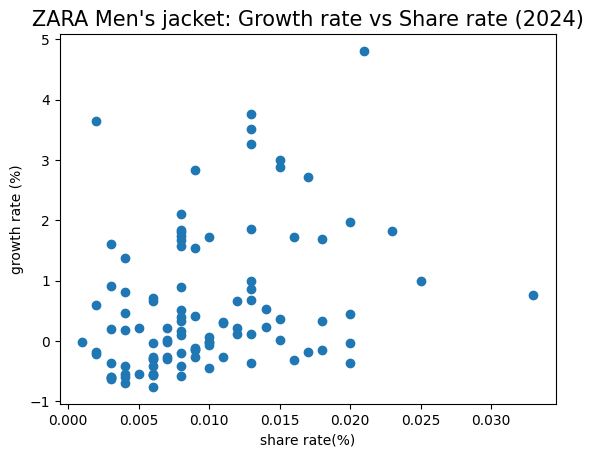

In [ ]:
import pandas as pd

# visualise the jacket data using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

plt.title("ZARA Men's jacket: Growth rate vs Share rate (2024)",size=15)
plt.scatter(df4['product_share_rate'], df4['product_growth_rate'])

# Set axis labels and tick labels with percentage formatting
plt.xlabel("share rate(%)")
plt.ylabel("growth rate (%)")
plt.xticks(np.arange(0, 1, 0.1), [f"{i}%" for i in range(0, 1, 0.1)])
plt.yticks(np.arange(0, 5, 1), [f"{i}%" for i in range(0, 5, 1)])
plt.show()
plt.savefig('Jacket_grow&share.png',dpi=300)

#### 2.2.3 Word cloud for man jacket to visualise and to identify distinguishing features

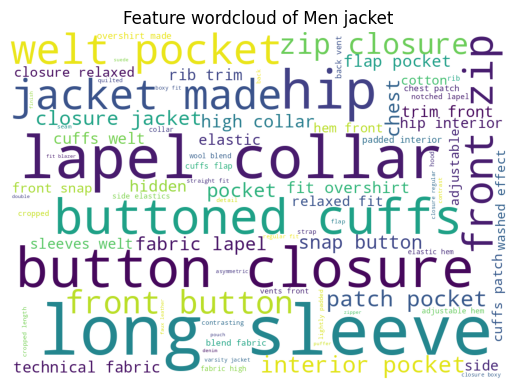

<Figure size 640x480 with 0 Axes>

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

wc_jac = WordCloud(width=1000,height=700,min_font_size=10,background_color='white')
high_potential = wc_jac.generate(df4[df4['category']=='MAN_jackets']['description'].str.cat(sep=" "))
plt.title('Feature wordcloud of Men jacket')
plt.axis('off')
plt.imshow(high_potential)
plt.show()

#plt.savefig('Men_jacket_featyre_wc.png', dpi=100)

#### 2.2.4 Suggestion for future research: Sales Forecasting by SVR (man jacket).
[coding source of SVR](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)

In [ ]:
#try Support Vector Regression (SVR)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df4['Sales Volume']
y = df4['gmv']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.values.reshape(-1, 1))
y = sc_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Sales prediction for jacket (SVR)')
plt.xlabel('Sale volumns')
plt.ylabel('GMV')
plt.show()

### 2.3 In-Depth analysis of the cash cow product - Men's Jeans


In this subsection, we are going to analyses **men's jeans**, as a product category located in the **cash cow quadrant**. To analyse the complete range of jeans products offered by the entrant, the same approach used for the men's jacket category will be applied. This includes **calculating growth rates and market shares, creating a scatter plot, and creating a word cloud** for the jeans category. The last, a Support Vector Regression (SVR) model will be employed to predict future sales for men jeans.

#### 2.3.1 Calculate the product growth rate and product share rate for each man jeans.

In [ ]:
#Focus solely on the MAN_jean product and filter out the rest
df4_jean=df3[df3['category'] == 'MAN_jeans']
df4_jean

section  terms  Product ID                             name  \
197     MAN  jeans      175584  baggy fit jeans limited edition   
198     MAN  jeans      147491               baggy belted jeans   
199     MAN  jeans      198283                  baggy fit jeans   
201     MAN  jeans      156342           flared fit cargo jeans   
202     MAN  jeans      186083           pleated wide fit jeans   
203     MAN  jeans      171776                      denim shirt   
204     MAN  jeans      134429        ripped straight fit jeans   

                                           description   price  Sales Volume  \
197  baggy jeans  five pockets  washed effect  fron...   69.90          2084   
198  baggy jeans  self belt at waist  front pockets...   59.90          1563   
199  baggy fit jeans  five pockets  washed effect  ...   69.90          1558   
201  flared jeans  patch pockets with flaps at hip ...  109.00          1466   
202  wide fit jeans  adjustable interior elastic wa...   49.90           624   
203  relaxed fit shirt made of denim fabric  lapel ...   12.99          1685   
204  straight fit jeans  five pockets  washed effec...   69.90          2914   

           gmv  2023_SV   2023_gmv   category  
197  145671.60     1635  114286.50  MAN_jeans  
198   93623.70     1262   75593.80  MAN_jeans  
199  108904.20      561   39213.90  MAN_jeans  
201  159794.00     1680  183120.00  MAN_jeans  
202   31137.60     1234   61576.60  MAN_jeans  
203   21888.15     1736   22550.64  MAN_jeans  
204  203688.60     2343  163775.70  MAN_jeans

In [ ]:
#Caculate share rate for each Man_jeans product
df4_jean.loc[:, 'product_share_rate'] = (df4_jean['gmv'] / df4_jean['gmv'].sum()).round(3)

#Caculate growth rate for each Man_jeans product
df4_jean['product_growth_rate']= (df4_jean['Sales Volume']/df4_jean['2023_SV']-1).round(2)

df4_jean

<ipython-input-833-b35ca3167444>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_jean['product_growth_rate']= (df4_jean['Sales Volume']/df4_jean['2023_SV']-1).round(2)


section  terms  Product ID                             name  \
197     MAN  jeans      175584  baggy fit jeans limited edition   
198     MAN  jeans      147491               baggy belted jeans   
199     MAN  jeans      198283                  baggy fit jeans   
201     MAN  jeans      156342           flared fit cargo jeans   
202     MAN  jeans      186083           pleated wide fit jeans   
203     MAN  jeans      171776                      denim shirt   
204     MAN  jeans      134429        ripped straight fit jeans   

                                           description   price  Sales Volume  \
197  baggy jeans  five pockets  washed effect  fron...   69.90          2084   
198  baggy jeans  self belt at waist  front pockets...   59.90          1563   
199  baggy fit jeans  five pockets  washed effect  ...   69.90          1558   
201  flared jeans  patch pockets with flaps at hip ...  109.00          1466   
202  wide fit jeans  adjustable interior elastic wa...   49.90           624   
203  relaxed fit shirt made of denim fabric  lapel ...   12.99          1685   
204  straight fit jeans  five pockets  washed effec...   69.90          2914   

           gmv  2023_SV   2023_gmv   category  product_share_rate  \
197  145671.60     1635  114286.50  MAN_jeans               0.190   
198   93623.70     1262   75593.80  MAN_jeans               0.122   
199  108904.20      561   39213.90  MAN_jeans               0.142   
201  159794.00     1680  183120.00  MAN_jeans               0.209   
202   31137.60     1234   61576.60  MAN_jeans               0.041   
203   21888.15     1736   22550.64  MAN_jeans               0.029   
204  203688.60     2343  163775.70  MAN_jeans               0.266   

     product_growth_rate  
197                 0.27  
198                 0.24  
199                 1.78  
201                -0.13  
202                -0.49  
203                -0.03  
204                 0.24

#### 2.3.2  Plot a scartter for men's jeans

TypeError: 'float' object cannot be interpreted as an integer

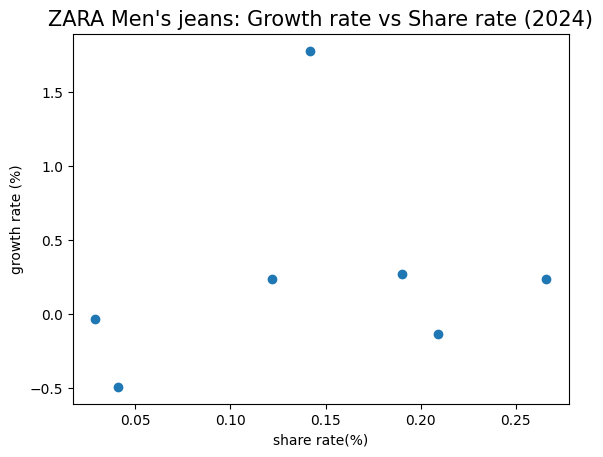

In [ ]:
# visualise the jacket data using Seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.title("ZARA Men's jeans: Growth rate vs Share rate (2024)",size=15)
plt.scatter(df4_jean['product_share_rate'], df4_jean['product_growth_rate'])

# Set axis labels and tick labels with percentage formatting
plt.xlabel("share rate(%)")
plt.ylabel("growth rate (%)")
plt.xticks(np.arange(0, 1, 0.1), [f"{i}%" for i in range(0, 1, 0.1)])
plt.yticks(np.arange(0, 5, 1), [f"{i}%" for i in range(0, 5, 1)])
plt.show()
plt.savefig('Jeans_grow&share.png',dpi=300)

#### 2.3.3 Word cloud for men's jeans to visualise and to identify distinguishing features

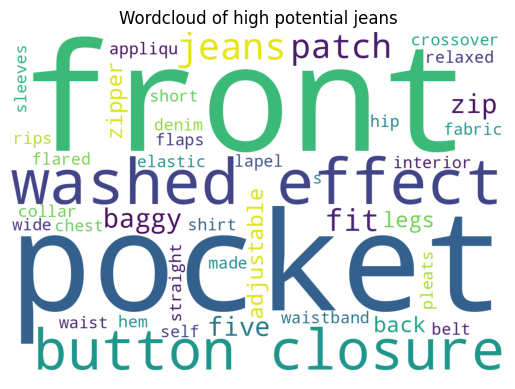

In [ ]:
#create a word cloud for jeans
wc_jean = WordCloud(width=1000,height=700,min_font_size=10,background_color='white')
clo_jean = wc_jean.generate(df4_jean[df4_jean['category']=='MAN_jeans']['description'].str.cat(sep=" "))
plt.title('Wordcloud of high potential jeans')
plt.axis('off')
plt.imshow(clo_jean)
plt.show()

#### 2.3.4 Suggestion for future research: Sales Forecasting by SVR (men's jeans).
* [coding source](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)

In [ ]:
#try Support Vector Regression (SVR)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df4_jean['Sales Volume']
y = df4_jean['gmv']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.values.reshape(-1, 1))
y = sc_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
#import regression models
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [ ]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

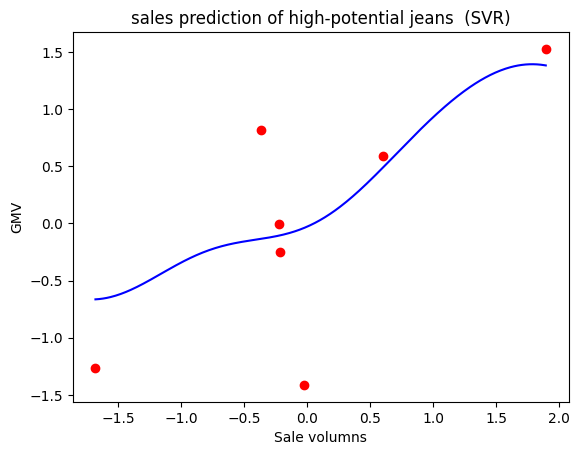

In [ ]:
#create a scatter plot for jeans
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Sales prediction of jeans  (SVR)')
plt.xlabel('Sale volumns')
plt.ylabel('GMV')
plt.show()

### other product type performance

<ipython-input-297-3e7aaef9c818>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'product_share_rate'] = (data['gmv'] / data['gmv'].sum()).round(3)
<ipython-input-297-3e7aaef9c818>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_growth_rate'] = (data['Sales Volume'] / data['2023_SV'] - 1).round(2)
<ipython-input-297-3e7aaef9c818>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

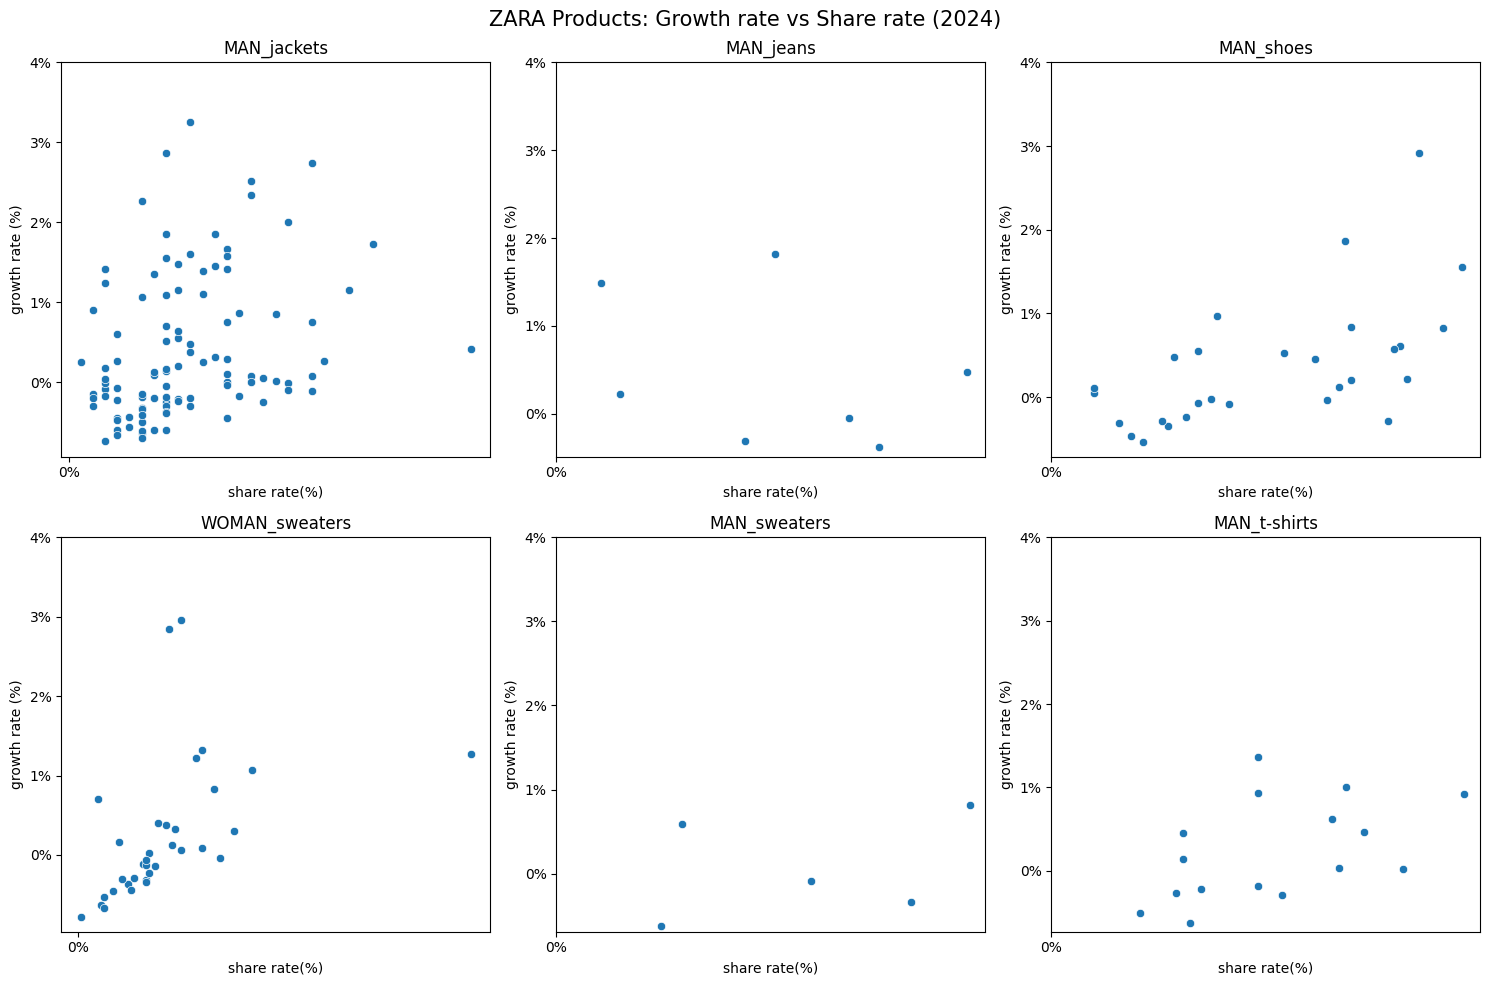

<Figure size 640x480 with 0 Axes>

In [297]:
# @title Calculate the product growth rate and product share rate for each man jackets.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Define the categories you want to plot (replace with your actual categories)
categories_to_plot = ['MAN_jackets', 'MAN_jeans', 'MAN_shoes', 'WOMAN_sweaters', 'MAN_sweaters', 'MAN_t-shirts']

# Filter data for each category and calculate share and growth rates
data_dict = {}
for category in categories_to_plot:
  data = df3[df3['category'] == category]
  data.loc[:, 'product_share_rate'] = (data['gmv'] / data['gmv'].sum()).round(3)
  data['product_growth_rate'] = (data['Sales Volume'] / data['2023_SV'] - 1).round(2)
  data_dict[category] = data

# Create a figure with subplots for each category
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figsize for better visualization

# Set plot title (optional)
fig.suptitle("ZARA Products: Growth rate vs Share rate (2024)", size=15)

# Loop through categories and plot data on subplots
for i, (category, data) in enumerate(data_dict.items()):
  row, col = divmod(i, 3)  # Calculate subplot positions
  sns.scatterplot(
      x="product_share_rate",
      y="product_growth_rate",
      data=data,
      ax=axes[row, col]
  )

  # Set axis labels and tick labels with percentage formatting
  axes[row, col].set_xlabel("share rate(%)")
  axes[row, col].set_ylabel("growth rate (%)")
  axes[row, col].set_xticks(np.arange(0, 1, 1), [f"{i}%" for i in range(0, 1, 1)])
  axes[row, col].set_yticks(np.arange(0, 5, 1), [f"{i}%" for i in range(0, 5, 1)])
  axes[row, col].set_title(category)  # Add category title to each subplot

# Adjust layout
plt.tight_layout()

plt.show()
plt.savefig('Jacket_grow&share.png', dpi=300)

# Part 2. External Product Analysis (Social Media Data)
<a id="chapter2"></a>

In this section, our work is conducting **sentiment analysis** and **clustering on Twitter data**. The process involves **data cleaning, exploratory data analysis (EDA), text cleaning, sentiment analysis, and the creation of sentiment-specific word clouds** for two example products: men's jackets and men's jeans.

By analysing authentic feedback from the target market, the model aim to provide valuable insights for entrants. These insights will help them understand potential market trends and inform their research for business expansion. Here we use data from Twitter (X), but other social media text data is adaptable as well.

## 1. Import Twitter data & remove irrelevant variables

In [ ]:
#read raw data
import pandas as pd
df_0822=pd.read_csv('dataset_tweet-scraper_2024-08-21_13-11-21-379.csv')
df_0822

<ipython-input-2-7b4d1a8f4e0c>:2: DtypeWarning: Columns (0,1,3,4,6,7,9,10,11,12,21,22,25,35,37,38,69,77,85,95,102,140,172,178,179,235,272,274,276,277,281,283,320,323,326,329,332,335,338,476,678,756,818,821,858,859,863,864,865,998,1201,1279,1343,1344,1345,1346,1353,1354,1367,1378,1379,1382,1410,1413,1416,1419,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1435,1440,1441,1443,1445,1448,1449,1450,1452,1454,1455,1456,1457,1458,1551,1552,1553,1573,1574,1575,1598,1601,1604,1607,1609,1610,1611,1612,1613,1617,1618,1619,1643,1646,1649,1652,1654,1655,1656,1657,1661,1662,1663,1685,1688,1691,1694,1696,1697,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1713,1718,1719,1721,1723,1726,1727,1728,1730,1732,1733,1734,1735,1736,1830,1831,1832,1852,1853,1854,1877,1880,1883,1886,1888,1889,1890,1891,1892,1896,1897,1898,1922,1925,1928,1931,1933,1934,1935,1936,1937,1941,1942,1943,1967,1970,1973,1976,1978,1979) have mixed types. Specify dtype option on import or set low_memory=False.


author/affiliatesHighlightedLabel/label/badge/url  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
12791                                               NaN   
12792                                               NaN   
12793                                               NaN   
12794                                               NaN   
12795                                               NaN   

      author/affiliatesHighlightedLabel/label/description  \
0                                                    NaN    
1                                                    NaN    
2                                                    NaN    
3                                                    NaN    
4                                                    NaN    
...                                                  ...    
12791                                                NaN    
12792                                                NaN    
12793                                                NaN    
12794                                                NaN    
12795                                                NaN    

       author/affiliatesHighlightedLabel/label/longDescription/entities/0/fromIndex  \
0                                                    NaN                              
1                                                    NaN                              
2                                                    NaN                              
3                                                    NaN                              
4                                                    NaN                              
...                                                  ...                              
12791                                                NaN                              
12792                                                NaN                              
12793                                                NaN                              
12794                                                NaN                              
12795                                                NaN                              

      author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/__typename  \
0                                                    NaN                                                         
1                                                    NaN                                                         
2                                                    NaN                                                         
3                                                    NaN                                                         
4                                                    NaN                                                         
...                                                  ...                                                         
12791                                                NaN                                                         
12792                                                NaN                                                         
12793                                                NaN                                                         
12794                                                NaN                                                         
12795                                                NaN                                                         

      author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/legacy/screen_name  \
0                           

In [ ]:
#check the data type
df_0822.dtypes

author/affiliatesHighlightedLabel/label/badge/url                                                                    object
author/affiliatesHighlightedLabel/label/description                                                                  object
author/affiliatesHighlightedLabel/label/longDescription/entities/0/fromIndex                                        float64
author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/__typename             object
author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/legacy/screen_name     object
                                                                                                                     ...   
text                                                                                                                 object
twitterUrl                                                                                                           object
type                                                                                                                 object
url                                                                                                                  object
viewCount                                                                                                           float64
Length: 2000, dtype: object

In [ ]:
#check null value
df_0822.isnull().sum()

author/affiliatesHighlightedLabel/label/badge/url                                                                   12746
author/affiliatesHighlightedLabel/label/description                                                                 12746
author/affiliatesHighlightedLabel/label/longDescription/entities/0/fromIndex                                        12758
author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/__typename            12758
author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/legacy/screen_name    12759
                                                                                                                    ...  
text                                                                                                                    4
twitterUrl                                                                                                              4
type                                                                                                                    4
url                                                                                                                     4
viewCount                                                                                                             369
Length: 2000, dtype: int64

In [ ]:
#remove columns with more than 100 missing values
df1_0822=df_0822.dropna(thresh=len(df_0822) - 100, axis=1)
df1_0822

author/canDm author/canMediaTag                author/createdAt  \
0              NaN                NaN                             NaN   
1              NaN                NaN                             NaN   
2              NaN                NaN                             NaN   
3              NaN                NaN                             NaN   
4             True               True  Sat Dec 24 08:13:42 +0000 2022   
...            ...                ...                             ...   
12791         True              False  Wed Mar 09 02:04:51 +0000 2016   
12792        False               True  Thu Mar 23 17:20:23 +0000 2023   
12793         True              False  Tue Feb 02 05:24:49 +0000 2021   
12794        False               True  Wed Jan 25 02:57:28 +0000 2012   
12795        False              False  Sat Sep 19 12:26:43 +0000 2009   

       author/fastFollowersCount  author/favouritesCount  author/followers  \
0                            NaN                     NaN               NaN   
1                            NaN                     NaN               NaN   
2                            NaN                     NaN               NaN   
3                            NaN                     NaN               NaN   
4                            0.0                 12444.0             142.0   
...                          ...                     ...               ...   
12791                        0.0                152324.0            2498.0   
12792                        0.0                     4.0              27.0   
12793                        0.0                 60645.0             253.0   
12794                        0.0                  7324.0              30.0   
12795                        0.0                 31802.0             564.0   

       author/following author/hasCustomTimelines     author/id  \
0                   NaN                       NaN           NaN   
1                   NaN                       NaN           NaN   
2                   NaN                       NaN           NaN   
3                   NaN                       NaN           NaN   
4                 752.0                      True  1.606564e+18   
...                 ...                       ...           ...   
12791             145.0                      True  7.073866e+17   
12792             107.0                     False  1.638954e+18   
12793             237.0                      True  1.356474e+18   
12794              60.0                     False  4.735479e+08   
12795             993.0                      True  7.553855e+07   

      author/isTranslator  ... lang  likeCount quoteCount replyCount  \
0                     NaN  ...  NaN        NaN        NaN        NaN   
1                     NaN  ...  NaN        NaN        NaN        NaN   
2                     NaN  ...  NaN        NaN        NaN        NaN   
3                     NaN  ...  NaN        NaN        NaN        NaN   
4                   False  ...   en       13.0        0.0        2.0   
...                   ...  ...  ...        ...        ...        ...   
12791               False  ...   en       11.0        1.0        2.0   
12792               False  ...   en        0.0        0.0        0.0   
12793               False  ...   en        0.0        0.0        0.0   
12794               False  ...   en        0.0        0.0        0.0   
12795               False  ...   en        0.0        0.0        0.0   

       retweetCount               source  \
0               NaN                  NaN   
1               NaN                  NaN   
2               NaN                  NaN   
3               NaN                  NaN   
4               6.0  Twitter for Android   
...             ...                  ...   
12791           0.0  Twitter for Android   
12792           0.0      Twitter Web App   
12793           0.0   Twitter for iPhone   
12794           0.0      Twitter Web App   
12795           0.0     Twitter for iP

In [ ]:
#check the data type and cloumns
df1_0822.dtypes

author/canDm                  object
author/canMediaTag            object
author/createdAt              object
author/fastFollowersCount    float64
author/favouritesCount       float64
author/followers             float64
author/following             float64
author/hasCustomTimelines     object
author/id                    float64
author/isTranslator           object
author/isVerified             object
author/mediaCount            float64
author/name                   object
author/profilePicture         object
author/statusesCount         float64
author/twitterUrl             object
author/type                   object
author/url                    object
author/userName               object
bookmarkCount                float64
createdAt                     object
id                           float64
isConversationControlled      object
isQuote                       object
isReply                       object
isRetweet                     object
lang                          object
likeCount                    float64
quoteCount                   float64
replyCount                   float64
retweetCount                 float64
source                        object
text                          object
twitterUrl                    object
type                          object
url                           object
dtype: object

In [ ]:
#remove irrelevant columns
drop_cols= list(range(0,20)) + list(range(21,27))+ list(range(33,36))
df2_0822 = df1_0822.drop(columns=df1_0822.columns[drop_cols])
df2_0822

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


createdAt  likeCount  quoteCount  replyCount  \
0                                 NaN        NaN         NaN         NaN   
1                                 NaN        NaN         NaN         NaN   
2                                 NaN        NaN         NaN         NaN   
3                                 NaN        NaN         NaN         NaN   
4      Thu Jun 29 23:59:38 +0000 2023       13.0         0.0         2.0   
...                               ...        ...         ...         ...   
12791  Wed Jun 14 12:06:22 +0000 2023       11.0         1.0         2.0   
12792  Wed Jun 14 12:05:26 +0000 2023        0.0         0.0         0.0   
12793  Wed Jun 14 12:05:24 +0000 2023        0.0         0.0         0.0   
12794  Wed Jun 14 12:04:15 +0000 2023        0.0         0.0         0.0   
12795  Wed Jun 14 12:02:04 +0000 2023        0.0         0.0         0.0   

       retweetCount               source  \
0               NaN                  NaN   
1               NaN                  NaN   
2               NaN                  NaN   
3               NaN                  NaN   
4               6.0  Twitter for Android   
...             ...                  ...   
12791           0.0  Twitter for Android   
12792           0.0      Twitter Web App   
12793           0.0   Twitter for iPhone   
12794           0.0      Twitter Web App   
12795           0.0     Twitter for iPad   

                                                    text  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4      I thought i posted it already but heres Raven ...  
...                                                  ...  
12791  mf you mighta looked at me and not even known....  
12792  whattry Mens Leather Jacket, Faux Motorcycle B...  
12793  Never trust a nigga who wear a bedazzled leath...  
12794  @Eru_theWild Excuse me, Joey, but how *dare* y...  
12795                           Real Full Metal Jacket 😩  

[12796 rows x 7 columns]

In [ ]:
#check null value
df2_0822.isnull().sum()

createdAt       4
likeCount       4
quoteCount      4
replyCount      4
retweetCount    4
source          4
text            4
dtype: int64

In [ ]:
#remove null value
df2_0822.dropna(subset=['text'], inplace=True)
df2_0822

createdAt  likeCount  quoteCount  replyCount  \
4      Thu Jun 29 23:59:38 +0000 2023       13.0         0.0         2.0   
5      Thu Jun 29 23:59:03 +0000 2023       10.0         0.0         0.0   
6      Thu Jun 29 23:56:20 +0000 2023        3.0         0.0         0.0   
7      Thu Jun 29 23:55:35 +0000 2023        1.0         0.0         0.0   
8      Thu Jun 29 23:54:24 +0000 2023        0.0         0.0         1.0   
...                               ...        ...         ...         ...   
12791  Wed Jun 14 12:06:22 +0000 2023       11.0         1.0         2.0   
12792  Wed Jun 14 12:05:26 +0000 2023        0.0         0.0         0.0   
12793  Wed Jun 14 12:05:24 +0000 2023        0.0         0.0         0.0   
12794  Wed Jun 14 12:04:15 +0000 2023        0.0         0.0         0.0   
12795  Wed Jun 14 12:02:04 +0000 2023        0.0         0.0         0.0   

       retweetCount               source  \
4               6.0  Twitter for Android   
5               0.0   Twitter for iPhone   
6               0.0   Twitter for iPhone   
7               0.0   Twitter for iPhone   
8               0.0      Twitter Web App   
...             ...                  ...   
12791           0.0  Twitter for Android   
12792           0.0      Twitter Web App   
12793           0.0   Twitter for iPhone   
12794           0.0      Twitter Web App   
12795           0.0     Twitter for iPad   

                                                    text  
4      I thought i posted it already but heres Raven ...  
5      i don’t believe for a second that all the peop...  
6      @GoneFishkin As long as it’s not leather jacke...  
7      Check out what I'm selling: Topshop Womens Blu...  
8         @The_Real_Fly 7.62 full metal jacket will work  
...                                                  ...  
12791  mf you mighta looked at me and not even known....  
12792  whattry Mens Leather Jacket, Faux Motorcycle B...  
12793  Never trust a nigga who wear a bedazzled leath...  
12794  @Eru_theWild Excuse me, Joey, but how *dare* y...  
12795                           Real Full Metal Jacket 😩  

[12792 rows x 7 columns]

In [ ]:
#Remove irrelevant columns
df3_0822=df2_0822.drop(['source'], axis=1)
df3_0822

createdAt  likeCount  quoteCount  replyCount  \
4      Thu Jun 29 23:59:38 +0000 2023       13.0         0.0         2.0   
5      Thu Jun 29 23:59:03 +0000 2023       10.0         0.0         0.0   
6      Thu Jun 29 23:56:20 +0000 2023        3.0         0.0         0.0   
7      Thu Jun 29 23:55:35 +0000 2023        1.0         0.0         0.0   
8      Thu Jun 29 23:54:24 +0000 2023        0.0         0.0         1.0   
...                               ...        ...         ...         ...   
12791  Wed Jun 14 12:06:22 +0000 2023       11.0         1.0         2.0   
12792  Wed Jun 14 12:05:26 +0000 2023        0.0         0.0         0.0   
12793  Wed Jun 14 12:05:24 +0000 2023        0.0         0.0         0.0   
12794  Wed Jun 14 12:04:15 +0000 2023        0.0         0.0         0.0   
12795  Wed Jun 14 12:02:04 +0000 2023        0.0         0.0         0.0   

       retweetCount                                               text  
4               6.0  I thought i posted it already but heres Raven ...  
5               0.0  i don’t believe for a second that all the peop...  
6               0.0  @GoneFishkin As long as it’s not leather jacke...  
7               0.0  Check out what I'm selling: Topshop Womens Blu...  
8               0.0     @The_Real_Fly 7.62 full metal jacket will work  
...             ...                                                ...  
12791           0.0  mf you mighta looked at me and not even known....  
12792           0.0  whattry Mens Leather Jacket, Faux Motorcycle B...  
12793           0.0  Never trust a nigga who wear a bedazzled leath...  
12794           0.0  @Eru_theWild Excuse me, Joey, but how *dare* y...  
12795           0.0                           Real Full Metal Jacket 😩  

[12792 rows x 6 columns]

In [ ]:
#Add new cloumns for dates and time
df3_0822['Dates'] = pd.to_datetime(df3_0822['createdAt']).dt.date
df3_0822['Time'] = pd.to_datetime(df3_0822['createdAt']).dt.time
df3_0822

<ipython-input-11-e542f788d466>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3_0822['Dates'] = pd.to_datetime(df3_0822['createdAt']).dt.date
<ipython-input-11-e542f788d466>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3_0822['Time'] = pd.to_datetime(df3_0822['createdAt']).dt.time


createdAt  likeCount  quoteCount  replyCount  \
4      Thu Jun 29 23:59:38 +0000 2023       13.0         0.0         2.0   
5      Thu Jun 29 23:59:03 +0000 2023       10.0         0.0         0.0   
6      Thu Jun 29 23:56:20 +0000 2023        3.0         0.0         0.0   
7      Thu Jun 29 23:55:35 +0000 2023        1.0         0.0         0.0   
8      Thu Jun 29 23:54:24 +0000 2023        0.0         0.0         1.0   
...                               ...        ...         ...         ...   
12791  Wed Jun 14 12:06:22 +0000 2023       11.0         1.0         2.0   
12792  Wed Jun 14 12:05:26 +0000 2023        0.0         0.0         0.0   
12793  Wed Jun 14 12:05:24 +0000 2023        0.0         0.0         0.0   
12794  Wed Jun 14 12:04:15 +0000 2023        0.0         0.0         0.0   
12795  Wed Jun 14 12:02:04 +0000 2023        0.0         0.0         0.0   

       retweetCount                                               text  \
4               6.0  I thought i posted it already but heres Raven ...   
5               0.0  i don’t believe for a second that all the peop...   
6               0.0  @GoneFishkin As long as it’s not leather jacke...   
7               0.0  Check out what I'm selling: Topshop Womens Blu...   
8               0.0     @The_Real_Fly 7.62 full metal jacket will work   
...             ...                                                ...   
12791           0.0  mf you mighta looked at me and not even known....   
12792           0.0  whattry Mens Leather Jacket, Faux Motorcycle B...   
12793           0.0  Never trust a nigga who wear a bedazzled leath...   
12794           0.0  @Eru_theWild Excuse me, Joey, but how *dare* y...   
12795           0.0                           Real Full Metal Jacket 😩   

            Dates      Time  
4      2023-06-29  23:59:38  
5      2023-06-29  23:59:03  
6      2023-06-29  23:56:20  
7      2023-06-29  23:55:35  
8      2023-06-29  23:54:24  
...           ...       ...  
12791  2023-06-14  12:06:22  
12792  2023-06-14  12:05:26  
12793  2023-06-14  12:05:24  
12794  2023-06-14  12:04:15  
12795  2023-06-14  12:02:04  

[12792 rows x 8 columns]

In [ ]:
#read the second raw dataset
import pandas as pd
df_0823=pd.read_csv('dataset_tweet-scraper_2024-08-21_17-55-58-397.csv')
df_0823

<ipython-input-12-75af15c9d818>:2: DtypeWarning: Columns (10,11,13,36,38,40,41,42,44,46,47,48,50,52,53,54,56,58,60,61,63,64,66,67,69,71,73,74,75,77,79,81,82,83,84,86,88,89,90,92,94,96,97,118,120,121,122,124,126,128,129,130,132,134,135,136,138,141,142,143,145,147,148,149,151,173,175,176,177,178,200,202,203,204,226,227,249,251,252,253,254,273,275,276,277,278,298,300,301,302,324,326,327,328,348,350,351,352,354,356,357,358,359,361,363,364,365,366,388,390,391,393,395,396,398,400,401,421,423,425,426,427,428,429,430,432,434,435,436,438,439,440,441,442,443,444,445,446,447,448,449,450,453,454,455,458,463,464,466,468,471,472,474,476,477,478,479,480,481,483,484,486,488,489,490,491,492,493,494,495,496,497,498,499,502,507,508,510,512,513,514,515,517,519,520,521,522,523,525,527,543,545,547,550,553,556,559,562,565,568,571,574,577,579,582,583,706,707,708,709,711,712,714,715,948,949,952,953,954,957,958,959,962,979,980,984,985,989,990,1114,1115,1117,1118,1121,1122,1363,1364,1367,1368,1371,1379,1390,1391

author/canDm  author/canMediaTag  \
0             False                True   
1             False                True   
2              True               False   
3             False                True   
4             False               False   
...             ...                 ...   
19995         False                True   
19996          True               False   
19997          True                True   
19998          True               False   
19999         False               False   

                                     author/coverPicture  \
0      https://pbs.twimg.com/profile_banners/28175742...   
1                                                    NaN   
2      https://pbs.twimg.com/profile_banners/12465545...   
3      https://pbs.twimg.com/profile_banners/16423770...   
4      https://pbs.twimg.com/profile_banners/15363227...   
...                                                  ...   
19995  https://pbs.twimg.com/profile_banners/88709578...   
19996  https://pbs.twimg.com/profile_banners/31029878...   
19997  https://pbs.twimg.com/profile_banners/13376943...   
19998  https://pbs.twimg.com/profile_banners/93811201...   
19999  https://pbs.twimg.com/profile_banners/98843072...   

                     author/createdAt  \
0      Thu Oct 09 00:06:12 +0000 2014   
1      Thu Nov 30 17:50:26 +0000 2017   
2      Sat Mar 20 03:51:15 +0000 2010   
3      Sun Apr 02 04:03:02 +0000 2023   
4      Mon Jun 13 12:21:15 +0000 2022   
...                               ...   
19995  Mon Jul 17 23:44:51 +0000 2017   
19996  Tue Apr 14 02:12:36 +0000 2009   
19997  Fri Apr 16 15:41:48 +0000 2010   
19998  Tue Dec 05 18:25:08 +0000 2017   
19999  Mon Apr 23 14:53:44 +0000 2018   

                                      author/description  \
0                   Hairdresser , Housewife and Poshmark   
1                                                    NaN   
2      Born in the fires of chaos. I tweet what’s on ...   
3      22 | she/her | lesbian | nsfw | let’s kiss :33...   
4      Father ♦️ Married to an amazing Woman♦️Veteran...   
...                                                  ...   
19995  These posts contain affiliate links. The Humbl...   
19996                                                NaN   
19997  Bone Head is real. https://t.co/SyP8fqdPZt 💙 🌊...   
19998                               TWENTY4 • ⭐️⭐️⭐️⭐️⭐️   
19999  | Welsh in London 🏴󠁧󠁢󠁷󠁬󠁳󠁿| 🇵🇸| Democratic Soci...   

      author/entities/description/urls/0/display_url  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
19995                                            NaN   
19996                                            NaN   
19997                               mybook.to/V1LuSJ   
19998                                            NaN   
19999                                            NaN   

      author/entities/description/urls/0/expanded_url  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
19995                                             NaN   
19996                                             NaN   
19997                         http://mybook.to/V1LuSJ   
19998                                             NaN   
19999                                             NaN   

       author/entities/description/urls/0/indices/0  \
0                                               NaN   
1                                               NaN   
2                               

In [ ]:
#check the data type
df_0823.dtypes

author/canDm              bool
author/canMediaTag        bool
author/coverPicture     object
author/createdAt        object
author/description      object
                        ...   
text                    object
twitterUrl              object
type                    object
url                     object
viewCount              float64
Length: 2000, dtype: object

In [ ]:
#check the null value
df_0823.isnull().sum()

author/canDm              0
author/canMediaTag        0
author/coverPicture    4857
author/createdAt          0
author/description     3574
                       ... 
text                      0
twitterUrl                0
type                      0
url                       0
viewCount              1272
Length: 2000, dtype: int64

In [ ]:
#remove columns with more than 100 missing values
df1_0823=df_0823.dropna(thresh=len(df_0823) - 100, axis=1)
df1_0823

author/canDm  author/canMediaTag                author/createdAt  \
0             False                True  Thu Oct 09 00:06:12 +0000 2014   
1             False                True  Thu Nov 30 17:50:26 +0000 2017   
2              True               False  Sat Mar 20 03:51:15 +0000 2010   
3             False                True  Sun Apr 02 04:03:02 +0000 2023   
4             False               False  Mon Jun 13 12:21:15 +0000 2022   
...             ...                 ...                             ...   
19995         False                True  Mon Jul 17 23:44:51 +0000 2017   
19996          True               False  Tue Apr 14 02:12:36 +0000 2009   
19997          True                True  Fri Apr 16 15:41:48 +0000 2010   
19998          True               False  Tue Dec 05 18:25:08 +0000 2017   
19999         False               False  Mon Apr 23 14:53:44 +0000 2018   

       author/fastFollowersCount  author/favouritesCount  author/followers  \
0                              0                     106               107   
1                              0                      74               160   
2                              0                   30628               688   
3                              0                   26893               580   
4                              0                   64421              2313   
...                          ...                     ...               ...   
19995                          0                     315              5244   
19996                          0                   51642               436   
19997                          0                   17945            400158   
19998                          0                  171231              1492   
19999                          0                   78612              1941   

       author/following  author/hasCustomTimelines            author/id  \
0                   227                      False           2817574223   
1                    35                      False   936291343210385408   
2                   629                       True            124655450   
3                   355                      False  1642377032540487681   
4                  1811                       True  1536322714100719616   
...                 ...                        ...                  ...   
19995               454                      False   887095785153867776   
19996              1698                       True             31029878   
19997            439450                       True            133769431   
19998              1183                       True   938112016971055104   
19999              2520                       True   988430728043155456   

       author/isTranslator  ...  lang likeCount quoteCount  replyCount  \
0                    False  ...    en         0          0           0   
1                    False  ...    en         0          0           0   
2                    False  ...    en         0          0           0   
3                    False  ...    en         5          0           1   
4                    False  ...    en         1          0           1   
...                    ...  ...   ...       ...        ...         ...   
19995                False  ...    en         0          0           0   
19996                False  ...    en         0          0           0   
19997                False  ...    en         1          1           1   
19998                False  ...    en         1          0           1   
19999                False  ...    en         1          0           0   

      retweetCount              source  \
0                0            Poshmark   
1                0  Twitter for iPhone   
2                0  Twitter for iPhone   
3                0  Twitter for iPhone   
4                0  Twitter for iPhone   
...            ...                 ...   
19995            0     Twitter Web App   
19996            0            Poshmark   
1

In [ ]:
#check the data type and cloumns
df1_0823.dtypes

author/canDm                   bool
author/canMediaTag             bool
author/createdAt             object
author/fastFollowersCount     int64
author/favouritesCount        int64
author/followers              int64
author/following              int64
author/hasCustomTimelines      bool
author/id                     int64
author/isTranslator            bool
author/mediaCount             int64
author/name                  object
author/profilePicture        object
author/statusesCount          int64
author/twitterUrl            object
author/type                  object
author/url                   object
author/userName              object
bookmarkCount                 int64
createdAt                    object
id                            int64
isConversationControlled       bool
isQuote                        bool
isReply                        bool
isRetweet                      bool
lang                         object
likeCount                     int64
quoteCount                    int64
replyCount                    int64
retweetCount                  int64
source                       object
text                         object
twitterUrl                   object
type                         object
url                          object
dtype: object

In [ ]:
#remove irrelevant columns
drop_cols= list(range(0,19)) + list(range(20,26))+ list(range(32,35))
df2_0823 = df1_0823.drop(columns=df1_0823.columns[drop_cols])
df2_0823

createdAt  likeCount  quoteCount  replyCount  \
0      Thu Jun 29 23:57:48 +0000 2023          0           0           0   
1      Thu Jun 29 23:54:08 +0000 2023          0           0           0   
2      Thu Jun 29 23:52:59 +0000 2023          0           0           0   
3      Thu Jun 29 23:45:24 +0000 2023          5           0           1   
4      Thu Jun 29 23:36:40 +0000 2023          1           0           1   
...                               ...        ...         ...         ...   
19995  Mon May 15 23:08:04 +0000 2023          0           0           0   
19996  Mon May 15 23:07:44 +0000 2023          0           0           0   
19997  Mon May 15 23:06:16 +0000 2023          1           1           1   
19998  Mon May 15 22:59:48 +0000 2023          1           0           1   
19999  Mon May 15 22:58:17 +0000 2023          1           0           0   

       retweetCount              source  \
0                 0            Poshmark   
1                 0  Twitter for iPhone   
2                 0  Twitter for iPhone   
3                 0  Twitter for iPhone   
4                 0  Twitter for iPhone   
...             ...                 ...   
19995             0     Twitter Web App   
19996             0            Poshmark   
19997             1  The Social Jukebox   
19998             0  Twitter for iPhone   
19999             0  Twitter for iPhone   

                                                    text  
0      Check out this listing I just added to my #Pos...  
1      Check out LL Bean Classic Fit Jeans Men's My M...  
2      I’m learning that fitted distressed jeans don’...  
3      just found $20 in the pocket of my jeans 😫 my ...  
4      @PrairieVeteran @bigmothufacking @Taurus_Moon_...  
...                                                  ...  
19995  ☀️☀️☀️ 35% savings on the LookbookStore Mid Ri...  
19996  Check out this listing I just added to my #Pos...  
19997  The tiny pocket in jeans was made for pocket w...  
19998  this would be fire with a crimped half up half...  
19999  @Jeremia91377986 @PicturesFoIder Yep. Or I’ve ...  

[20000 rows x 7 columns]

In [ ]:
#check null value
df2_0823.isnull().sum()

createdAt       0
likeCount       0
quoteCount      0
replyCount      0
retweetCount    0
source          0
text            0
dtype: int64

In [ ]:
#remove irrelevant columns
df3_0823=df2_0823.drop(['source'], axis=1)
df3_0823

createdAt  likeCount  quoteCount  replyCount  \
0      Thu Jun 29 23:57:48 +0000 2023          0           0           0   
1      Thu Jun 29 23:54:08 +0000 2023          0           0           0   
2      Thu Jun 29 23:52:59 +0000 2023          0           0           0   
3      Thu Jun 29 23:45:24 +0000 2023          5           0           1   
4      Thu Jun 29 23:36:40 +0000 2023          1           0           1   
...                               ...        ...         ...         ...   
19995  Mon May 15 23:08:04 +0000 2023          0           0           0   
19996  Mon May 15 23:07:44 +0000 2023          0           0           0   
19997  Mon May 15 23:06:16 +0000 2023          1           1           1   
19998  Mon May 15 22:59:48 +0000 2023          1           0           1   
19999  Mon May 15 22:58:17 +0000 2023          1           0           0   

       retweetCount                                               text  
0                 0  Check out this listing I just added to my #Pos...  
1                 0  Check out LL Bean Classic Fit Jeans Men's My M...  
2                 0  I’m learning that fitted distressed jeans don’...  
3                 0  just found $20 in the pocket of my jeans 😫 my ...  
4                 0  @PrairieVeteran @bigmothufacking @Taurus_Moon_...  
...             ...                                                ...  
19995             0  ☀️☀️☀️ 35% savings on the LookbookStore Mid Ri...  
19996             0  Check out this listing I just added to my #Pos...  
19997             1  The tiny pocket in jeans was made for pocket w...  
19998             0  this would be fire with a crimped half up half...  
19999             0  @Jeremia91377986 @PicturesFoIder Yep. Or I’ve ...  

[20000 rows x 6 columns]

In [ ]:
#Add new cloumns for dates and time
df3_0823['Dates'] = pd.to_datetime(df3_0823['createdAt']).dt.date
df3_0823['Time'] = pd.to_datetime(df3_0823['createdAt']).dt.time
df3_0823

<ipython-input-20-a0f8480163de>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3_0823['Dates'] = pd.to_datetime(df3_0823['createdAt']).dt.date
<ipython-input-20-a0f8480163de>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3_0823['Time'] = pd.to_datetime(df3_0823['createdAt']).dt.time


createdAt  likeCount  quoteCount  replyCount  \
0      Thu Jun 29 23:57:48 +0000 2023          0           0           0   
1      Thu Jun 29 23:54:08 +0000 2023          0           0           0   
2      Thu Jun 29 23:52:59 +0000 2023          0           0           0   
3      Thu Jun 29 23:45:24 +0000 2023          5           0           1   
4      Thu Jun 29 23:36:40 +0000 2023          1           0           1   
...                               ...        ...         ...         ...   
19995  Mon May 15 23:08:04 +0000 2023          0           0           0   
19996  Mon May 15 23:07:44 +0000 2023          0           0           0   
19997  Mon May 15 23:06:16 +0000 2023          1           1           1   
19998  Mon May 15 22:59:48 +0000 2023          1           0           1   
19999  Mon May 15 22:58:17 +0000 2023          1           0           0   

       retweetCount                                               text  \
0                 0  Check out this listing I just added to my #Pos...   
1                 0  Check out LL Bean Classic Fit Jeans Men's My M...   
2                 0  I’m learning that fitted distressed jeans don’...   
3                 0  just found $20 in the pocket of my jeans 😫 my ...   
4                 0  @PrairieVeteran @bigmothufacking @Taurus_Moon_...   
...             ...                                                ...   
19995             0  ☀️☀️☀️ 35% savings on the LookbookStore Mid Ri...   
19996             0  Check out this listing I just added to my #Pos...   
19997             1  The tiny pocket in jeans was made for pocket w...   
19998             0  this would be fire with a crimped half up half...   
19999             0  @Jeremia91377986 @PicturesFoIder Yep. Or I’ve ...   

            Dates      Time  
0      2023-06-29  23:57:48  
1      2023-06-29  23:54:08  
2      2023-06-29  23:52:59  
3      2023-06-29  23:45:24  
4      2023-06-29  23:36:40  
...           ...       ...  
19995  2023-05-15  23:08:04  
19996  2023-05-15  23:07:44  
19997  2023-05-15  23:06:16  
19998  2023-05-15  22:59:48  
19999  2023-05-15  22:58:17  

[20000 rows x 8 columns]

In [ ]:
#combine  df3_0823 and df3_0822 as a one dataset
import pandas as pd
df_combined = pd.concat([df3_0822, df3_0823])
df_combined

createdAt  likeCount  quoteCount  replyCount  \
4      Thu Jun 29 23:59:38 +0000 2023       13.0         0.0         2.0   
5      Thu Jun 29 23:59:03 +0000 2023       10.0         0.0         0.0   
6      Thu Jun 29 23:56:20 +0000 2023        3.0         0.0         0.0   
7      Thu Jun 29 23:55:35 +0000 2023        1.0         0.0         0.0   
8      Thu Jun 29 23:54:24 +0000 2023        0.0         0.0         1.0   
...                               ...        ...         ...         ...   
19995  Mon May 15 23:08:04 +0000 2023        0.0         0.0         0.0   
19996  Mon May 15 23:07:44 +0000 2023        0.0         0.0         0.0   
19997  Mon May 15 23:06:16 +0000 2023        1.0         1.0         1.0   
19998  Mon May 15 22:59:48 +0000 2023        1.0         0.0         1.0   
19999  Mon May 15 22:58:17 +0000 2023        1.0         0.0         0.0   

       retweetCount                                               text  \
4               6.0  I thought i posted it already but heres Raven ...   
5               0.0  i don’t believe for a second that all the peop...   
6               0.0  @GoneFishkin As long as it’s not leather jacke...   
7               0.0  Check out what I'm selling: Topshop Womens Blu...   
8               0.0     @The_Real_Fly 7.62 full metal jacket will work   
...             ...                                                ...   
19995           0.0  ☀️☀️☀️ 35% savings on the LookbookStore Mid Ri...   
19996           0.0  Check out this listing I just added to my #Pos...   
19997           1.0  The tiny pocket in jeans was made for pocket w...   
19998           0.0  this would be fire with a crimped half up half...   
19999           0.0  @Jeremia91377986 @PicturesFoIder Yep. Or I’ve ...   

            Dates      Time  
4      2023-06-29  23:59:38  
5      2023-06-29  23:59:03  
6      2023-06-29  23:56:20  
7      2023-06-29  23:55:35  
8      2023-06-29  23:54:24  
...           ...       ...  
19995  2023-05-15  23:08:04  
19996  2023-05-15  23:07:44  
19997  2023-05-15  23:06:16  
19998  2023-05-15  22:59:48  
19999  2023-05-15  22:58:17  

[32792 rows x 8 columns]

In [ ]:
#remove irrelevant columns and rearrange cloumns
df4=df_combined.drop(['createdAt'], axis=1)
df5 = df4[['text', 'Dates', 'Time', 'likeCount', 'quoteCount','replyCount','retweetCount']]
df5

text       Dates  \
4      I thought i posted it already but heres Raven ...  2023-06-29   
5      i don’t believe for a second that all the peop...  2023-06-29   
6      @GoneFishkin As long as it’s not leather jacke...  2023-06-29   
7      Check out what I'm selling: Topshop Womens Blu...  2023-06-29   
8         @The_Real_Fly 7.62 full metal jacket will work  2023-06-29   
...                                                  ...         ...   
19995  ☀️☀️☀️ 35% savings on the LookbookStore Mid Ri...  2023-05-15   
19996  Check out this listing I just added to my #Pos...  2023-05-15   
19997  The tiny pocket in jeans was made for pocket w...  2023-05-15   
19998  this would be fire with a crimped half up half...  2023-05-15   
19999  @Jeremia91377986 @PicturesFoIder Yep. Or I’ve ...  2023-05-15   

           Time  likeCount  quoteCount  replyCount  retweetCount  
4      23:59:38       13.0         0.0         2.0           6.0  
5      23:59:03       10.0         0.0         0.0           0.0  
6      23:56:20        3.0         0.0         0.0           0.0  
7      23:55:35        1.0         0.0         0.0           0.0  
8      23:54:24        0.0         0.0         1.0           0.0  
...         ...        ...         ...         ...           ...  
19995  23:08:04        0.0         0.0         0.0           0.0  
19996  23:07:44        0.0         0.0         0.0           0.0  
19997  23:06:16        1.0         1.0         1.0           1.0  
19998  22:59:48        1.0         0.0         1.0           0.0  
19999  22:58:17        1.0         0.0         0.0           0.0  

[32792 rows x 7 columns]

In [ ]:
#save to csv
df5.to_csv(r'twitter_clean.csv', index=False)

## 2. EDA

In [ ]:
#Read data
import pandas as pd
df5=pd.read_csv('twitter_clean_0822.csv')
df5

text       Dates  \
0      I thought i posted it already but heres Raven ...  2023-06-29   
1      i don’t believe for a second that all the peop...  2023-06-29   
2      @GoneFishkin As long as it’s not leather jacke...  2023-06-29   
3      Check out what I'm selling: Topshop Womens Blu...  2023-06-29   
4         @The_Real_Fly 7.62 full metal jacket will work  2023-06-29   
...                                                  ...         ...   
32787  ☀️☀️☀️ 35% savings on the LookbookStore Mid Ri...  2023-05-15   
32788  Check out this listing I just added to my #Pos...  2023-05-15   
32789  The tiny pocket in jeans was made for pocket w...  2023-05-15   
32790  this would be fire with a crimped half up half...  2023-05-15   
32791  @Jeremia91377986 @PicturesFoIder Yep. Or I’ve ...  2023-05-15   

           Time  likeCount  quoteCount  replyCount  retweetCount  
0      23:59:38       13.0         0.0         2.0           6.0  
1      23:59:03       10.0         0.0         0.0           0.0  
2      23:56:20        3.0         0.0         0.0           0.0  
3      23:55:35        1.0         0.0         0.0           0.0  
4      23:54:24        0.0         0.0         1.0           0.0  
...         ...        ...         ...         ...           ...  
32787  23:08:04        0.0         0.0         0.0           0.0  
32788  23:07:44        0.0         0.0         0.0           0.0  
32789  23:06:16        1.0         1.0         1.0           1.0  
32790  22:59:48        1.0         0.0         1.0           0.0  
32791  22:58:17        1.0         0.0         0.0           0.0  

[32792 rows x 7 columns]

In [ ]:
#describtive statistics
df5.describe()

likeCount    quoteCount    replyCount  retweetCount
count  32792.000000  32792.000000  32792.000000  32792.000000
mean       9.521347      0.139821      0.515949      1.415406
std      255.817437      3.325802      7.675392     29.858183
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        1.000000      0.000000      0.000000      0.000000
max    34792.000000    370.000000    802.000000   3493.000000

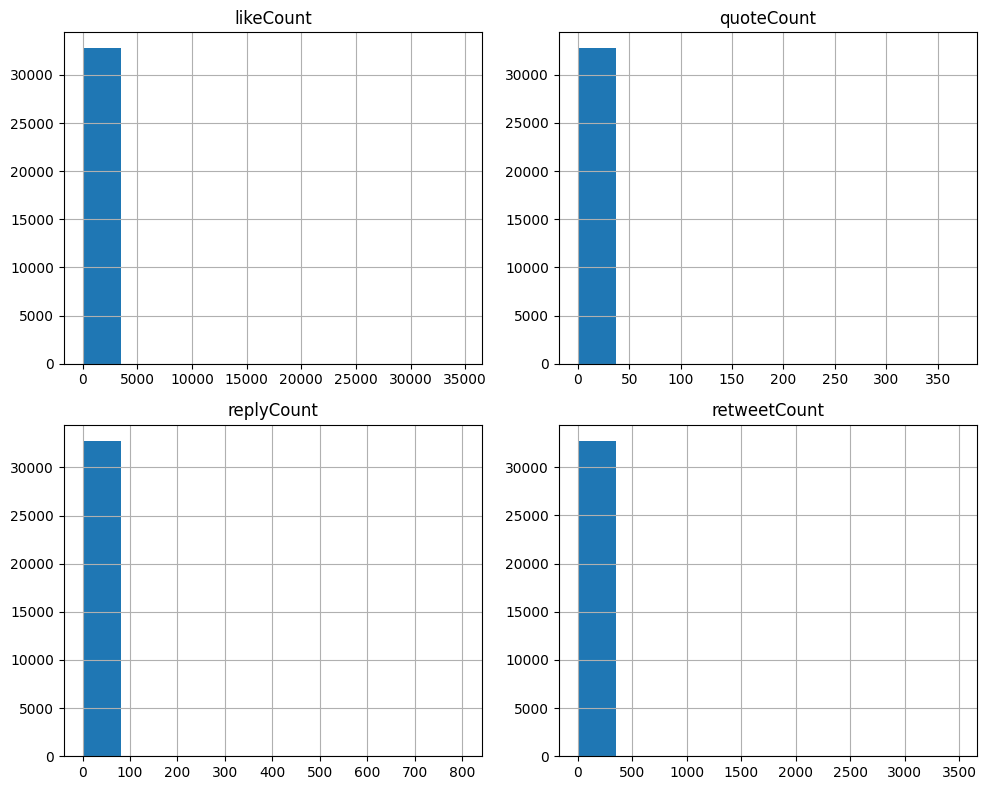

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
df5.hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
#sort table by likeCount
df5 = df5.sort_values('likeCount', ascending=False)
df5

text       Dates  \
389    Random Twitter fascist guy in a suit: Uh, this...  2023-06-29   
19894  what goes through someone's mind when they pai...  2023-06-19   
1203   When your Mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is u dont need much to...  2023-06-26   
26201  Karine Jean-Pierre at today’s press briefing: ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me\ninside the pocket of your ...  2023-06-24   
17567  80s Levi Strauss 550 Vintage Denim Cuffed Cut-...  2023-06-24   
17566  I might be the only person that rip my tag off...  2023-06-24   
17565  Check out this listing I just added to my #Pos...  2023-06-24   
21132  @ACTBrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  
389    14:09:42    34792.0        30.0        31.0        3493.0  
19894  07:13:38    22214.0       370.0       688.0         881.0  
1203   13:30:22    12869.0        66.0        76.0        1418.0  
16349  05:30:57     6357.0        16.0        36.0         175.0  
26201  21:39:39     4258.0        64.0        53.0         980.0  
...         ...        ...         ...         ...           ...  
17568  19:31:58        0.0         0.0         0.0           0.0  
17567  19:40:03        0.0         0.0         0.0           0.0  
17566  19:44:05        0.0         0.0         0.0           0.0  
17565  19:46:07        0.0         0.0         0.0           0.0  
21132  12:51:31        0.0         0.0         0.0           0.0  

[32792 rows x 7 columns]

In [ ]:
# check duplicate by columns
df5.duplicated(subset=['text']).sum()

3708

In [ ]:
#remove duplicate row by text
df6=df5.drop_duplicates('text')
df6

text       Dates  \
389    Random Twitter fascist guy in a suit: Uh, this...  2023-06-29   
19894  what goes through someone's mind when they pai...  2023-06-19   
1203   When your Mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is u dont need much to...  2023-06-26   
26201  Karine Jean-Pierre at today’s press briefing: ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me\ninside the pocket of your ...  2023-06-24   
17567  80s Levi Strauss 550 Vintage Denim Cuffed Cut-...  2023-06-24   
17566  I might be the only person that rip my tag off...  2023-06-24   
17565  Check out this listing I just added to my #Pos...  2023-06-24   
21132  @ACTBrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  
389    14:09:42    34792.0        30.0        31.0        3493.0  
19894  07:13:38    22214.0       370.0       688.0         881.0  
1203   13:30:22    12869.0        66.0        76.0        1418.0  
16349  05:30:57     6357.0        16.0        36.0         175.0  
26201  21:39:39     4258.0        64.0        53.0         980.0  
...         ...        ...         ...         ...           ...  
17568  19:31:58        0.0         0.0         0.0           0.0  
17567  19:40:03        0.0         0.0         0.0           0.0  
17566  19:44:05        0.0         0.0         0.0           0.0  
17565  19:46:07        0.0         0.0         0.0           0.0  
21132  12:51:31        0.0         0.0         0.0           0.0  

[29084 rows x 7 columns]

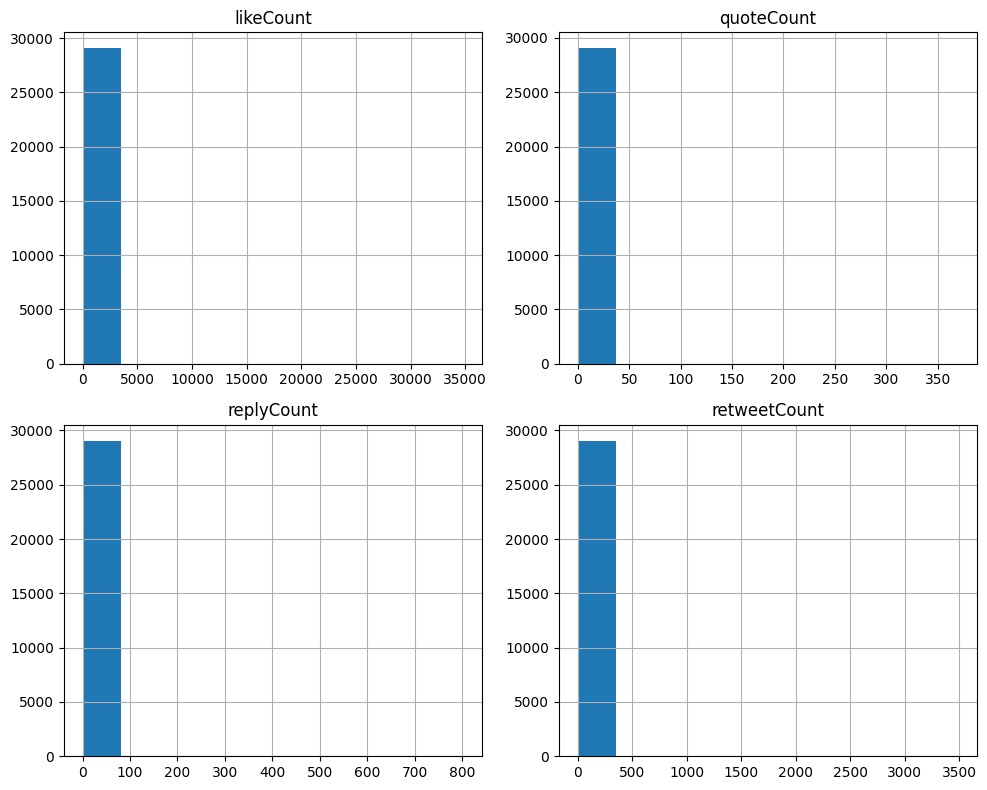

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
df6.hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

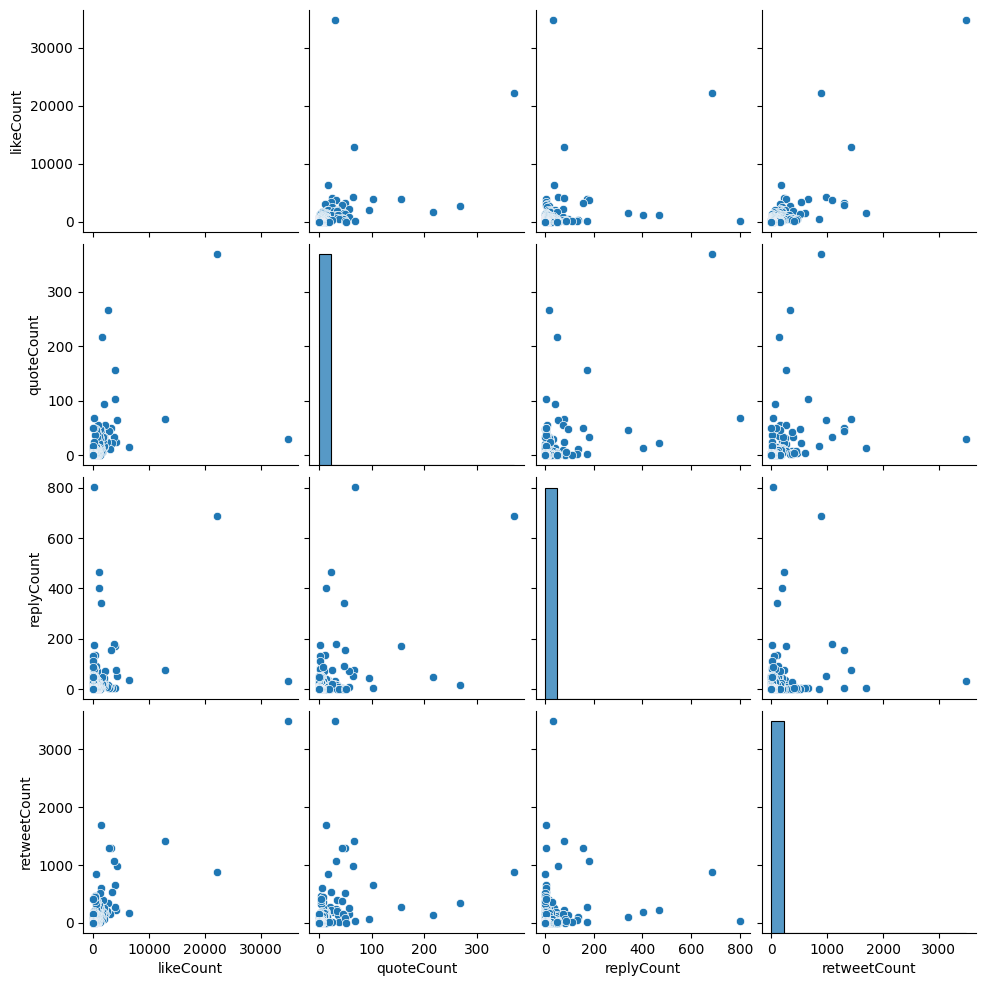

In [ ]:
import seaborn as sns
sns.pairplot(df6)

In [ ]:
#correlation analysis
numeric_columns=df6.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr = df6[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

## 3. Text cleaning & sentiment scoring

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.4 MB/s eta 0:00:00


In [ ]:
#Import library
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd

# data visulization
import seaborn as sns
import matplotlib.pyplot as plt

# text processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# remove emoji
import emoji

# regular expression
import re
import string

# wordcloud
from wordcloud import WordCloud
from collections import Counter

# model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 3.1 Count the number of words, characters, and sentences in the tweets

In [ ]:
df6

NameError: name 'df6' is not defined

In [ ]:
# characters count
df6['char_count'] = df6['text'].apply(len)
# word count
df6['word_count'] = df6['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# sentence count
df6['sent_count'] = df6['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df6

text       Dates  \
389    Random Twitter fascist guy in a suit: Uh, this...  2023-06-29   
19894  what goes through someone's mind when they pai...  2023-06-19   
1203   When your Mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is u dont need much to...  2023-06-26   
26201  Karine Jean-Pierre at today’s press briefing: ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me\ninside the pocket of your ...  2023-06-24   
17567  80s Levi Strauss 550 Vintage Denim Cuffed Cut-...  2023-06-24   
17566  I might be the only person that rip my tag off...  2023-06-24   
17565  Check out this listing I just added to my #Pos...  2023-06-24   
21132  @ACTBrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
26201  21:39:39     4258.0        64.0        53.0         980.0         170   
...         ...        ...         ...         ...           ...         ...   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17567  19:40:03        0.0         0.0         0.0           0.0         265   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   
21132  12:51:31        0.0         0.0         0.0           0.0          88   

       word_count  sent_count  
389            68           1  
19894          60           2  
1203           27           1  
16349          57           2  
26201          31           2  
...           ...         ...  
17568          12           1  
17567          41           1  
17566          17           1  
17565          40           2  
21132          16           1  

[29084 rows x 10 columns]

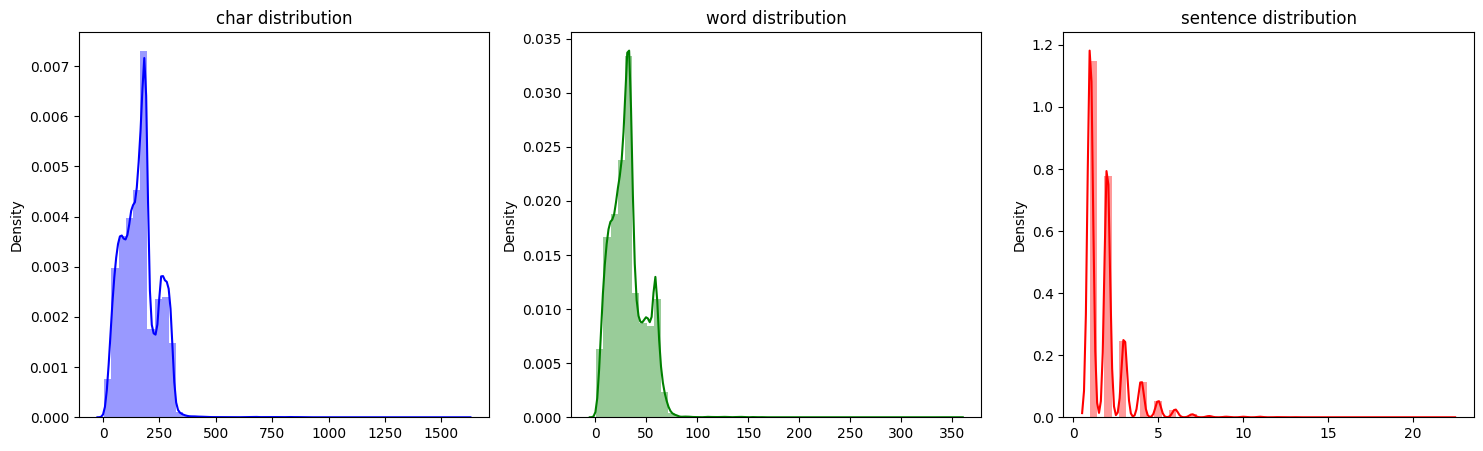

In [ ]:
# dist plot
fig, axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(ax=axes[0],x=df6['char_count'],color='b')
axes[0].set_title('char distribution')

sns.distplot(ax=axes[1],x=df6['word_count'],color='g')
axes[1].set_title('word distribution')

sns.distplot(ax=axes[2],x=df6['sent_count'],color='r')
axes[2].set_title('sentence distribution')
plt.show()

### 3.2 Clean emoji, links, email, and punctuation

In [ ]:
# extract # to new cloumn
df6['hashtags'] = df6['text'].apply(lambda x: re.findall(r'#(\w+)', x))
df6

text       Dates  \
389    Random Twitter fascist guy in a suit: Uh, this...  2023-06-29   
19894  what goes through someone's mind when they pai...  2023-06-19   
1203   When your Mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is u dont need much to...  2023-06-26   
26201  Karine Jean-Pierre at today’s press briefing: ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me\ninside the pocket of your ...  2023-06-24   
17567  80s Levi Strauss 550 Vintage Denim Cuffed Cut-...  2023-06-24   
17566  I might be the only person that rip my tag off...  2023-06-24   
17565  Check out this listing I just added to my #Pos...  2023-06-24   
21132  @ACTBrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
26201  21:39:39     4258.0        64.0        53.0         980.0         170   
...         ...        ...         ...         ...           ...         ...   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17567  19:40:03        0.0         0.0         0.0           0.0         265   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   
21132  12:51:31        0.0         0.0         0.0           0.0          88   

       word_count  sent_count  \
389            68           1   
19894          60           2   
1203           27           1   
16349          57           2   
26201          31           2   
...           ...         ...   
17568          12           1   
17567          41           1   
17566          17           1   
17565          40           2   
21132          16           1   

                                                hashtags  
389                                                   []  
19894                                                 []  
1203                                                  []  
16349                                                 []  
26201                                                 []  
...                                                  ...  
17568                                                 []  
17567  [Levis550CutOffShorts, 80sLevis550Shorts, Vint...  
17566                                                 []  
17565                           [Poshmark, shopmycloset]  
21132                                                 []  

[29084 rows x 11 columns]

In [ ]:
!pip install contractions

In [ ]:
import contractions

target_column = 'text'

# drop data with missing values in the 'content' column
df6 = df6.dropna(subset=[target_column])

# drop duplicate review content
df6 = df6.drop_duplicates(subset=[target_column])

# remove contraction
df6[target_column] = df6[target_column].map(lambda x: contractions.fix(x))

In [ ]:
# Remove overspace
df6[target_column] = df6[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

# Remove non-word characters, so numbers and ___ etc
df6[target_column] = df6[target_column].str.replace("[^A-Za-z]", " ", regex = True)

In [ ]:
# lower words
df6[target_column] = df6[target_column].str.lower()

# space, @
df6[target_column] = df6[target_column].apply(lambda x: re.sub('\n\S*@\S*\s?','',x))

# remove email
df6[target_column] = df6[target_column].apply(lambda x: re.sub('http://\S+|https://\S+','',x))

# remove emoji
df6[target_column] = df6[target_column].apply(lambda x: emoji.replace_emoji(x,replace=''))

# remove links
df6[target_column] = df6[target_column].apply(lambda x: re.sub(r'@\w+', '', x))

# remove punctuation
df6[target_column] = df6[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
#categorise the text by cloth type
def extract_word(text, words):
    pattern = r'\b(' + '|'.join([re.escape(word) for word in words]) + r')\b'
    match = re.search(pattern, text)
    if match:
        return match.group()
    else:
        return None

# Example usage
words_to_extract =['jacket','jeans','sneaker','sweaters','kint','bomber']
df6['extracted_words'] = df6['text'].apply(lambda x: extract_word(x, words_to_extract))

# Display the DataFrame
print("Original DataFrame:")
df6

Original DataFrame:


text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
19894  what goes through someone is mind when they pa...  2023-06-19   
1203   when your mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is you do not need muc...  2023-06-26   
26201  karine jean pierre at today s press briefing  ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17567    s levi strauss     vintage denim cuffed cut ...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   
21132   actbrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
26201  21:39:39     4258.0        64.0        53.0         980.0         170   
...         ...        ...         ...         ...           ...         ...   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17567  19:40:03        0.0         0.0         0.0           0.0         265   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   
21132  12:51:31        0.0         0.0         0.0           0.0          88   

       word_count  sent_count  \
389            68           1   
19894          60           2   
1203           27           1   
16349          57           2   
26201          31           2   
...           ...         ...   
17568          12           1   
17567          41           1   
17566          17           1   
17565          40           2   
21132          16           1   

                                                hashtags extracted_words  
389                                                   []          jacket  
19894                                                 []           jeans  
1203                                                  []          jacket  
16349                                                 []           jeans  
26201                                                 []            None  
...                                                  ...             ...  
17568                                                 []           jeans  
17567  [Levis550CutOffShorts, 80sLevis550Shorts, Vint...            None  
17566                                                 []           jeans  
17565                           [Poshmark, shopmycloset]           jeans  
21132                                                 []            None  

[29084 rows x 12 columns]

In [ ]:
def extract_word(text, words):
    # Modify the regex pattern to capture both singular and plural forms
    pattern = r'\b(' + '|'.join([re.escape(word) + r'(s)?' for word in words]) + r')\b'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    # Replace plural forms and label them correctly
    extracted_words = []
    for match in matches:
        word = match[0].lower()
        if word in ['jeans', 'jean']:
            extracted_words.append('jeans')
        elif word in ['jackets', 'jacket']:
            extracted_words.append('jacket')
        elif word in ['sneakers', 'sneaker']:
            extracted_words.append('sneaker')
        elif word in ['sweaters', 'sweater']:
            extracted_words.append('sweater')
        elif word in ['kints', 'kint']:
            extracted_words.append('kint')
        elif word in ['bombers', 'bomber']:
            extracted_words.append('bomber')
        else:
            extracted_words.append(word)

    return ','.join(extracted_words).lower() if extracted_words else None

# Define the words to extract, including singular and plural forms
words_to_extract = ['jacket','jeans', 'sneaker', 'sweater', 'kint', 'bomber']

# Apply the function to the DataFrame
df6['extracted_words'] = df6['text'].apply(lambda x: extract_word(x, words_to_extract))

# Display the DataFrame
print("Original DataFrame:")
df6

Original DataFrame:


text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
19894  what goes through someone is mind when they pa...  2023-06-19   
1203   when your mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is you do not need muc...  2023-06-26   
26201  karine jean pierre at today s press briefing  ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17567    s levi strauss     vintage denim cuffed cut ...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   
21132   actbrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
26201  21:39:39     4258.0        64.0        53.0         980.0         170   
...         ...        ...         ...         ...           ...         ...   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17567  19:40:03        0.0         0.0         0.0           0.0         265   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   
21132  12:51:31        0.0         0.0         0.0           0.0          88   

       word_count  sent_count  \
389            68           1   
19894          60           2   
1203           27           1   
16349          57           2   
26201          31           2   
...           ...         ...   
17568          12           1   
17567          41           1   
17566          17           1   
17565          40           2   
21132          16           1   

                                                hashtags    extracted_words  
389                                                   []      jacket,jacket  
19894                                                 []              jeans  
1203                                                  []             jacket  
16349                                                 []  jeans,jeans,jeans  
26201                                                 []               None  
...                                                  ...                ...  
17568                                                 []              jeans  
17567  [Levis550CutOffShorts, 80sLevis550Shorts, Vint...               None  
17566                                                 []              jeans  
17565                           [Poshmark, shopmycloset]              jeans  
21132                                                 []               None  

[29084 rows x 12 columns]

In [ ]:
#check null value
df6.isnull().sum()

text                  0
Dates                 0
Time                  0
likeCount             0
quoteCount            0
replyCount            0
retweetCount          0
char_count            0
word_count            0
sent_count            0
hashtags              0
extracted_word    10129
dtype: int64

In [ ]:
# check extracted_word is null row
df6_nu = df6[df6['extracted_words'].isnull()]
df6_nu

text       Dates  \
26201  karine jean pierre at today s press briefing  ...  2023-06-05   
11920  different versions of this audio keep going ar...  2023-06-15   
28679  marjorie taylor greene had a          business...  2023-05-30   
13338    autry sneakers woman two tone medalist low s...  2023-06-29   
4180   mission  impossible ii does not all work but m...  2023-06-25   
...                                                  ...         ...   
17564  i really want this trans pride sweater  but ca...  2023-06-22   
6086   trending men leather jackets are on sale enjoy...  2023-06-22   
17574   gcncdp known to save lives  you mean like chi...  2023-06-24   
17567    s levi strauss     vintage denim cuffed cut ...  2023-06-24   
21132   actbrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
26201  21:39:39     4258.0        64.0        53.0         980.0         170   
11920  09:44:17     4150.0        24.0        77.0         219.0         262   
28679  22:24:41     3184.0        50.0       155.0        1299.0         214   
13338  02:22:57     2956.0        44.0         4.0        1294.0         179   
4180   02:25:55     2160.0        56.0        72.0         155.0         303   
...         ...        ...         ...         ...           ...         ...   
17564  01:32:43        0.0         0.0         1.0           0.0         160   
6086   18:09:09        0.0         0.0         0.0           0.0         302   
17574  18:37:08        0.0         0.0         0.0           0.0         167   
17567  19:40:03        0.0         0.0         0.0           0.0         265   
21132  12:51:31        0.0         0.0         0.0           0.0          88   

       word_count  sent_count  \
26201          31           2   
11920          52           4   
28679          37           1   
13338          32           1   
4180           66           4   
...           ...         ...   
17564          30           3   
6086           54           1   
17574          35           3   
17567          41           1   
21132          16           1   

                                                hashtags extracted_words  
26201                                                 []            None  
11920                                                 []            None  
28679                                                 []            None  
13338                      [블랙핑크리사, LALISA, MONEY, LISA]            None  
4180                                                  []            None  
...                                                  ...             ...  
17564                                                 []            None  
6086   [MomsforLiberty, Zuck, Titan, Debris, Schiff, ...            None  
17574                                                 []            None  
17567  [Levis550CutOffShorts, 80sLevis550Shorts, Vint...            None  
21132                                                 []            None  

[10129 rows x 12 columns]

### 3.3 Sentiment Score Calculation for Tweets

In [ ]:
# first, import the package (suppose we haven't imported it yet) run the analyzer (SentimentIntensityAnalyzer())
import nltk
import numpy as np
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Then create new columns for your dataframe (compound, pos, neu, neg) with empty dictionary
# With for loop, we get the scores for each review and append the scores to the dictionary

Result = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }

for review in df6['text']:
    score = sid.polarity_scores(review)
    Result['pos'].append(score['pos'])
    Result['neu'].append(score['neu'])
    Result['neg'].append(score['neg'])
    Result['compound'].append(score['compound'])

# Once this is done, new columns are created and dictionary is transformed to the dataframe

df6['compound'] = Result['compound']
df6['pos'] = Result['pos']
df6['neu'] = Result['neu']
df6['neg'] = Result['neg']
df6['sentiment'] = np.where(df6['compound']>=0.05, 'Positive',np.where(df6['compound']<=-0.05,'Negative', 'Neutral'))
df6

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
19894  what goes through someone is mind when they pa...  2023-06-19   
1203   when your mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is you do not need muc...  2023-06-26   
26201  karine jean pierre at today s press briefing  ...  2023-06-05   
...                                                  ...         ...   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17567    s levi strauss     vintage denim cuffed cut ...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   
21132   actbrigitte according to his financial forms ...  2023-06-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
26201  21:39:39     4258.0        64.0        53.0         980.0         170   
...         ...        ...         ...         ...           ...         ...   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17567  19:40:03        0.0         0.0         0.0           0.0         265   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   
21132  12:51:31        0.0         0.0         0.0           0.0          88   

       word_count  sent_count  \
389            68           1   
19894          60           2   
1203           27           1   
16349          57           2   
26201          31           2   
...           ...         ...   
17568          12           1   
17567          41           1   
17566          17           1   
17565          40           2   
21132          16           1   

                                                hashtags extracted_words  \
389                                                   []          jacket   
19894                                                 []           jeans   
1203                                                  []          jacket   
16349                                                 []           jeans   
26201                                                 []            None   
...                                                  ...             ...   
17568                                                 []           jeans   
17567  [Levis550CutOffShorts, 80sLevis550Shorts, Vint...            None   
17566                                                 []           jeans   
17565                           [Poshmark, shopmycloset]           jeans   
21132                                                 []            None   

       compound    pos    neu    neg sentiment  
389     -0.6808  0.046  0.824  0.130  Negative  
19894   -0.2732  0.078  0.821  0.102  Negative  
1203     0.0000  0.000  1.000  0.000   Neutral  
16349    0.6908  0.120  0.880  0.000  Positive  
26201   -0.4404  0.000  0.849  0.151  Negative  
...         ...    ...    ...    ...       ...  
17568    0.0000  0.000  1.000  0.000   Neutral  
17567   -0.2732  0.000  0.942  0.058  Negative  
17566   -0.2023  0.137  0.686  0.176  Negative  
17565    0.0000  0.000  1.000  0.000   Neutral  
21132    0.0000  0.000  1.000  0.000   Neutral  

[29084 rows x 17 columns]

In [ ]:
jean_count = df6['extracted_words'].value_counts().get('jeans', 0)
print(jean_count)

5649


## 4. Tweets analysis by sentiment
Following data cleaning, EDA, and sentiment scoring for each tweet, this section will demonstrate external product analysis by product type. This analysis will involve **processing neutral, positive, and negative words**. For each sentiment, we will **create topic word clouds** and **perform text clustering**. This approach will enable entrants to understand market discourse and identify **high-frequency terms** related to similar products in the target market. By aligning entrants' products with these market trends, they can ensure meeting consumer demand. Additionally, text clustering will group similar words together, providing valuable insights into product-related topics.

### 4.1 Analysis for the star product: Men's jacket
As identified in Part 1, Men's jacket is a star product in the BCG Matrix. To gain deeper insights into external discussions surrounding this product, we'll prioritise analysing tweets mentioning the term 'jacket.

#### 4.1.1 Data processing
Excluding all products, but men's jackets for focusing solely on tweets related to it.


In [ ]:
#remove tweets with no extracted_words
df6.dropna(subset=['extracted_words'], inplace=True)
df6

text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
19894  what goes through someone is mind when they pa...  2023-06-19   
1203   when your mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is you do not need muc...  2023-06-26   
11920  different versions of this audio keep going ar...  2023-06-15   
...                                                  ...         ...   
6091   check out this listing i just added to my  pos...  2023-06-22   
6092    ukmtb chat i must say though  their waterproo...  2023-06-22   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
11920  09:44:17     4150.0        24.0        77.0         219.0         262   
...         ...        ...         ...         ...           ...         ...   
6091   18:04:21        0.0         0.0         0.0           0.0         191   
6092   18:03:05        0.0         0.0         0.0           0.0         162   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   

       word_count  sent_count                  hashtags    extracted_words  \
389            68           1                        []      jacket,jacket   
19894          60           2                        []              jeans   
1203           27           1                        []             jacket   
16349          57           2                        []  jeans,jeans,jeans   
11920          52           4                        []             jacket   
...           ...         ...                       ...                ...   
6091           36           1  [Poshmark, shopmycloset]             jacket   
6092           32           1                        []             jacket   
17568          12           1                        []              jeans   
17566          17           1                        []              jeans   
17565          40           2  [Poshmark, shopmycloset]              jeans   

       compound    pos    neu    neg sentiment  
389     -0.6808  0.046  0.824  0.130  Negative  
19894   -0.2732  0.078  0.821  0.102  Negative  
1203     0.0000  0.000  1.000  0.000   Neutral  
16349    0.6908  0.120  0.880  0.000  Positive  
11920    0.4464  0.167  0.756  0.077  Positive  
...         ...    ...    ...    ...       ...  
6091     0.0000  0.000  1.000  0.000   Neutral  
6092     0.4404  0.097  0.903  0.000  Positive  
17568    0.0000  0.000  1.000  0.000   Neutral  
17566   -0.2023  0.137  0.686  0.176  Negative  
17565    0.0000  0.000  1.000  0.000   Neutral  

[24751 rows x 17 columns]

In [ ]:
#keep tweets are labeled jacket
df6_j = df6[df6['extracted_words'].str.contains('jacket')]
df6_j

text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
1203   when your mum is a artist so for your birthday...  2023-06-28   
11920  different versions of this audio keep going ar...  2023-06-15   
11628  the superior ac dc shirt and black leather jac...  2023-06-15   
31278   hot search   taehyung looks stunning in celin...  2023-05-21   
...                                                  ...         ...   
17579   metalhealth   my black jean jacket had a clif...  2023-06-24   
17578   metalhealth   i had a patch on the back and b...  2023-06-24   
6088   that lv leather jacket hov had on is so nasty ...  2023-06-22   
6091   check out this listing i just added to my  pos...  2023-06-22   
6092    ukmtb chat i must say though  their waterproo...  2023-06-22   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
11920  09:44:17     4150.0        24.0        77.0         219.0         262   
11628  17:26:57     3927.0       103.0         2.0         656.0         102   
31278  07:19:53     3814.0        33.0       178.0        1076.0         113   
...         ...        ...         ...         ...           ...         ...   
17579  18:16:16        0.0         0.0         0.0           0.0          79   
17578  18:20:21        0.0         0.0         0.0           0.0         125   
6088   18:06:24        0.0         1.0         0.0           1.0          51   
6091   18:04:21        0.0         0.0         0.0           0.0         191   
6092   18:03:05        0.0         0.0         0.0           0.0         162   

       word_count  sent_count                  hashtags extracted_words  \
389            68           1                        []   jacket,jacket   
1203           27           1                        []          jacket   
11920          52           4                        []          jacket   
11628          16           1                        []          jacket   
31278          21           2                [TAEHYUNG]    jacket,jeans   
...           ...         ...                       ...             ...   
17579          16           1                        []          jacket   
17578          27           1                        []   jacket,jacket   
6088           14           2                        []          jacket   
6091           36           1  [Poshmark, shopmycloset]          jacket   
6092           32           1                        []          jacket   

       compound    pos    neu    neg sentiment  
389     -0.6808  0.046  0.824  0.130  Negative  
1203     0.0000  0.000  1.000  0.000   Neutral  
11920    0.4464  0.167  0.756  0.077  Positive  
11628    0.5423  0.189  0.811  0.000  Positive  
31278    0.3818  0.140  0.860  0.000  Positive  
...         ...    ...    ...    ...       ...  
17579    0.0000  0.000  1.000  0.000   Neutral  
17578    0.0000  0.000  1.000  0.000   Neutral  
6088    -0.6825  0.000  0.661  0.339  Negative  
6091     0.0000  0.000  1.000  0.000   Neutral  
6092     0.4404  0.097  0.903  0.000  Positive  

[13201 rows x 17 columns]

#### 4.1.2 Analysis neutral words

a. Create neutral sentiment word clouds<br/>
b. Finding high-frequency neutral words<br/>
c. Text clustering for neutral words<br/>


##### a. Generate word clouds word cloud for neutral tweets

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Keep only neutral tweets
df6_j_neu = df6_j.drop(df6_j[df6_j['sentiment'] != 'Neutral'].index)
df6_j_neu

text       Dates  \
1203   when your mum is a artist so for your birthday...  2023-06-28   
11107  aim  leon dore x tyrrell winston leather jacke...  2023-06-16   
5631   jimin performing thr airplane pt    choreo in ...  2023-06-23   
4746   i never had a metal patch jacket  how about yo...  2023-06-24   
8265   cotton coach jacket            monogram crepe ...  2023-06-19   
...                                                  ...         ...   
6073   check out this listing i just added to my  pos...  2023-06-22   
6069   check out vtg doncaster women   shade of brown...  2023-06-22   
17579   metalhealth   my black jean jacket had a clif...  2023-06-24   
17578   metalhealth   i had a patch on the back and b...  2023-06-24   
6091   check out this listing i just added to my  pos...  2023-06-22   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
11107  09:33:52     2603.0        24.0         8.0         195.0          78   
5631   11:22:05     1833.0        34.0        17.0         386.0         152   
4746   12:43:46     1511.0        47.0       341.0         104.0         175   
8265   23:16:46     1499.0        13.0         4.0        1688.0         214   
...         ...        ...         ...         ...           ...         ...   
6073   18:26:20        0.0         0.0         0.0           0.0         199   
6069   18:30:32        0.0         0.0         0.0           0.0         130   
17579  18:16:16        0.0         0.0         0.0           0.0          79   
17578  18:20:21        0.0         0.0         0.0           0.0         125   
6091   18:04:21        0.0         0.0         0.0           0.0         191   

       word_count  sent_count  \
1203           27           1   
11107          14           1   
5631           26           2   
4746           36           3   
8265           34           1   
...           ...         ...   
6073           38           1   
6069           20           1   
17579          16           1   
17578          27           1   
6091           36           1   

                                                hashtags extracted_words  \
1203                                                  []          jacket   
11107                                                 []          jacket   
5631                                                  []    jacket,jeans   
4746   [heavymetal, metal, heavy, metalmusic, metalhe...          jacket   
8265   [BAMBAM, BamBamLVMenSS24, LVMenSS24, LouisVuit...  jacket,sneaker   
...                                                  ...             ...   
6073                            [Poshmark, shopmycloset]  sweater,jacket   
6069                                              [eBay]          jacket   
17579                                                 []          jacket   
17578                                                 []   jacket,jacket   
6091                            [Poshmark, shopmycloset]          jacket   

       compound  pos  neu  neg sentiment  
1203        0.0  0.0  1.0  0.0   Neutral  
11107       0.0  0.0  1.0  0.0   Neutral  
5631        0.0  0.0  1.0  0.0   Neutral  
4746        0.0  0.0  1.0  0.0   Neutral  
8265        0.0  0.0  1.0  0.0   Neutral  
...         ...  ...  ...  ...       ...  
6073        0.0  0.0  1.0  0.0   Neutral  
6069        0.0  0.0  1.0  0.0   Neutral  
17579       0.0  0.0  1.0  0.0   Neutral  
17578       0.0  0.0  1.0  0.0   Neutral  
6091        0.0  0.0  1.0  0.0   Neutral  

[5853 rows x 17 columns]

In [ ]:
words = df6_j_neu['text'].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["https", "co", ' add',' list','list','list ','ad','ad ','http','poshmark','shopmycloset','poshmarkapp','closet','ebay','leather','wear','look','http_co','check_list','http_co','check_list','ad_poshmark','jacket','closet','check', 'know', 'also', 'get', 'find', 'think', 'want', 'make', 'need', 'go'] ) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df6_j_neu['cleaned_text'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df6_j_neu['cleaned_text'])

k = 3 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
pocket,size,wool,jean,cotton,coat,lightweight,new,vintage,black,wear,blue,shop,make,go,see,men,red,patch,blazer,line,find,pink,collar,pant,take,front,back,fashion,long,use,small,dress,lady,get,put,silk,day,guy,hair,design,amp,eprolo_starte,time,say,big,link,light,summer,come

Topic#  2
list,add,black,woman,jacket,man,size,crop,faux,motorcycle,shirt,suede,vintage,faux_fur,collar,bomber,brown,wear,blazer,suit,zip,button,hood,women,style,genuine,moto,sweater,long_sleeve,biker,wool_blend,medium,faux_suede,classic,buy,large,sleeve,gray,size_medium,green,line,quilt,find,lightweight,vest,think,color,trim,outfit,military

Topic#  3
cardigan,handmade_craft,knitting_knittingpattern,crafts_sweater,pdf_wool,woollen_crafte,clothes_clothe,ply_doubleknit,baby_etsy,boy_girl,metal,neandercol_vintagesu,full_metal,neandercol_vintagetu,cdj,xjvvj,get,neandercol_vintagef,weza_ypptx,neandercol_vintageth,platoon,film,apocalypse,pick,weza_yqnj,mean,bring,finally,clyg,ladbible_full,home,band,reason,ga

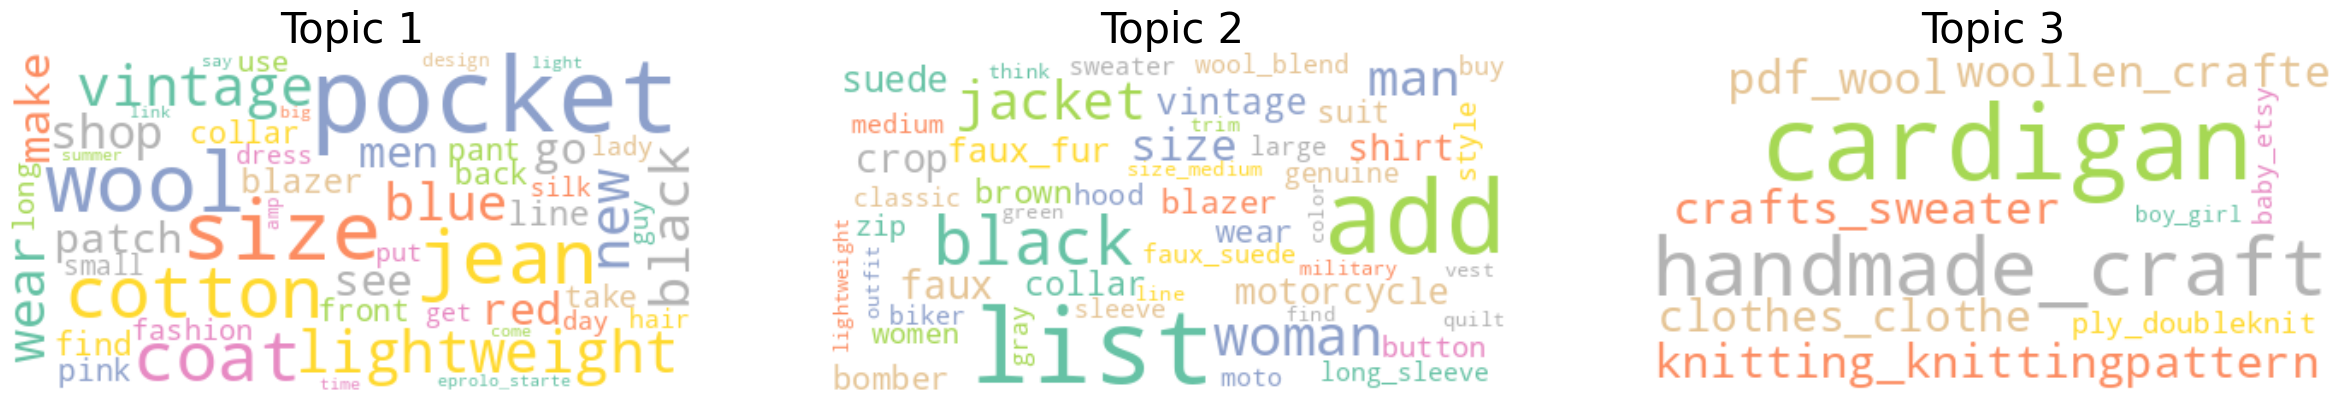

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()
#stop_words = ['http_co','check_list','ad_poshmark','jacket','closet','check','add','leather','list','size','see']

wcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')


fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

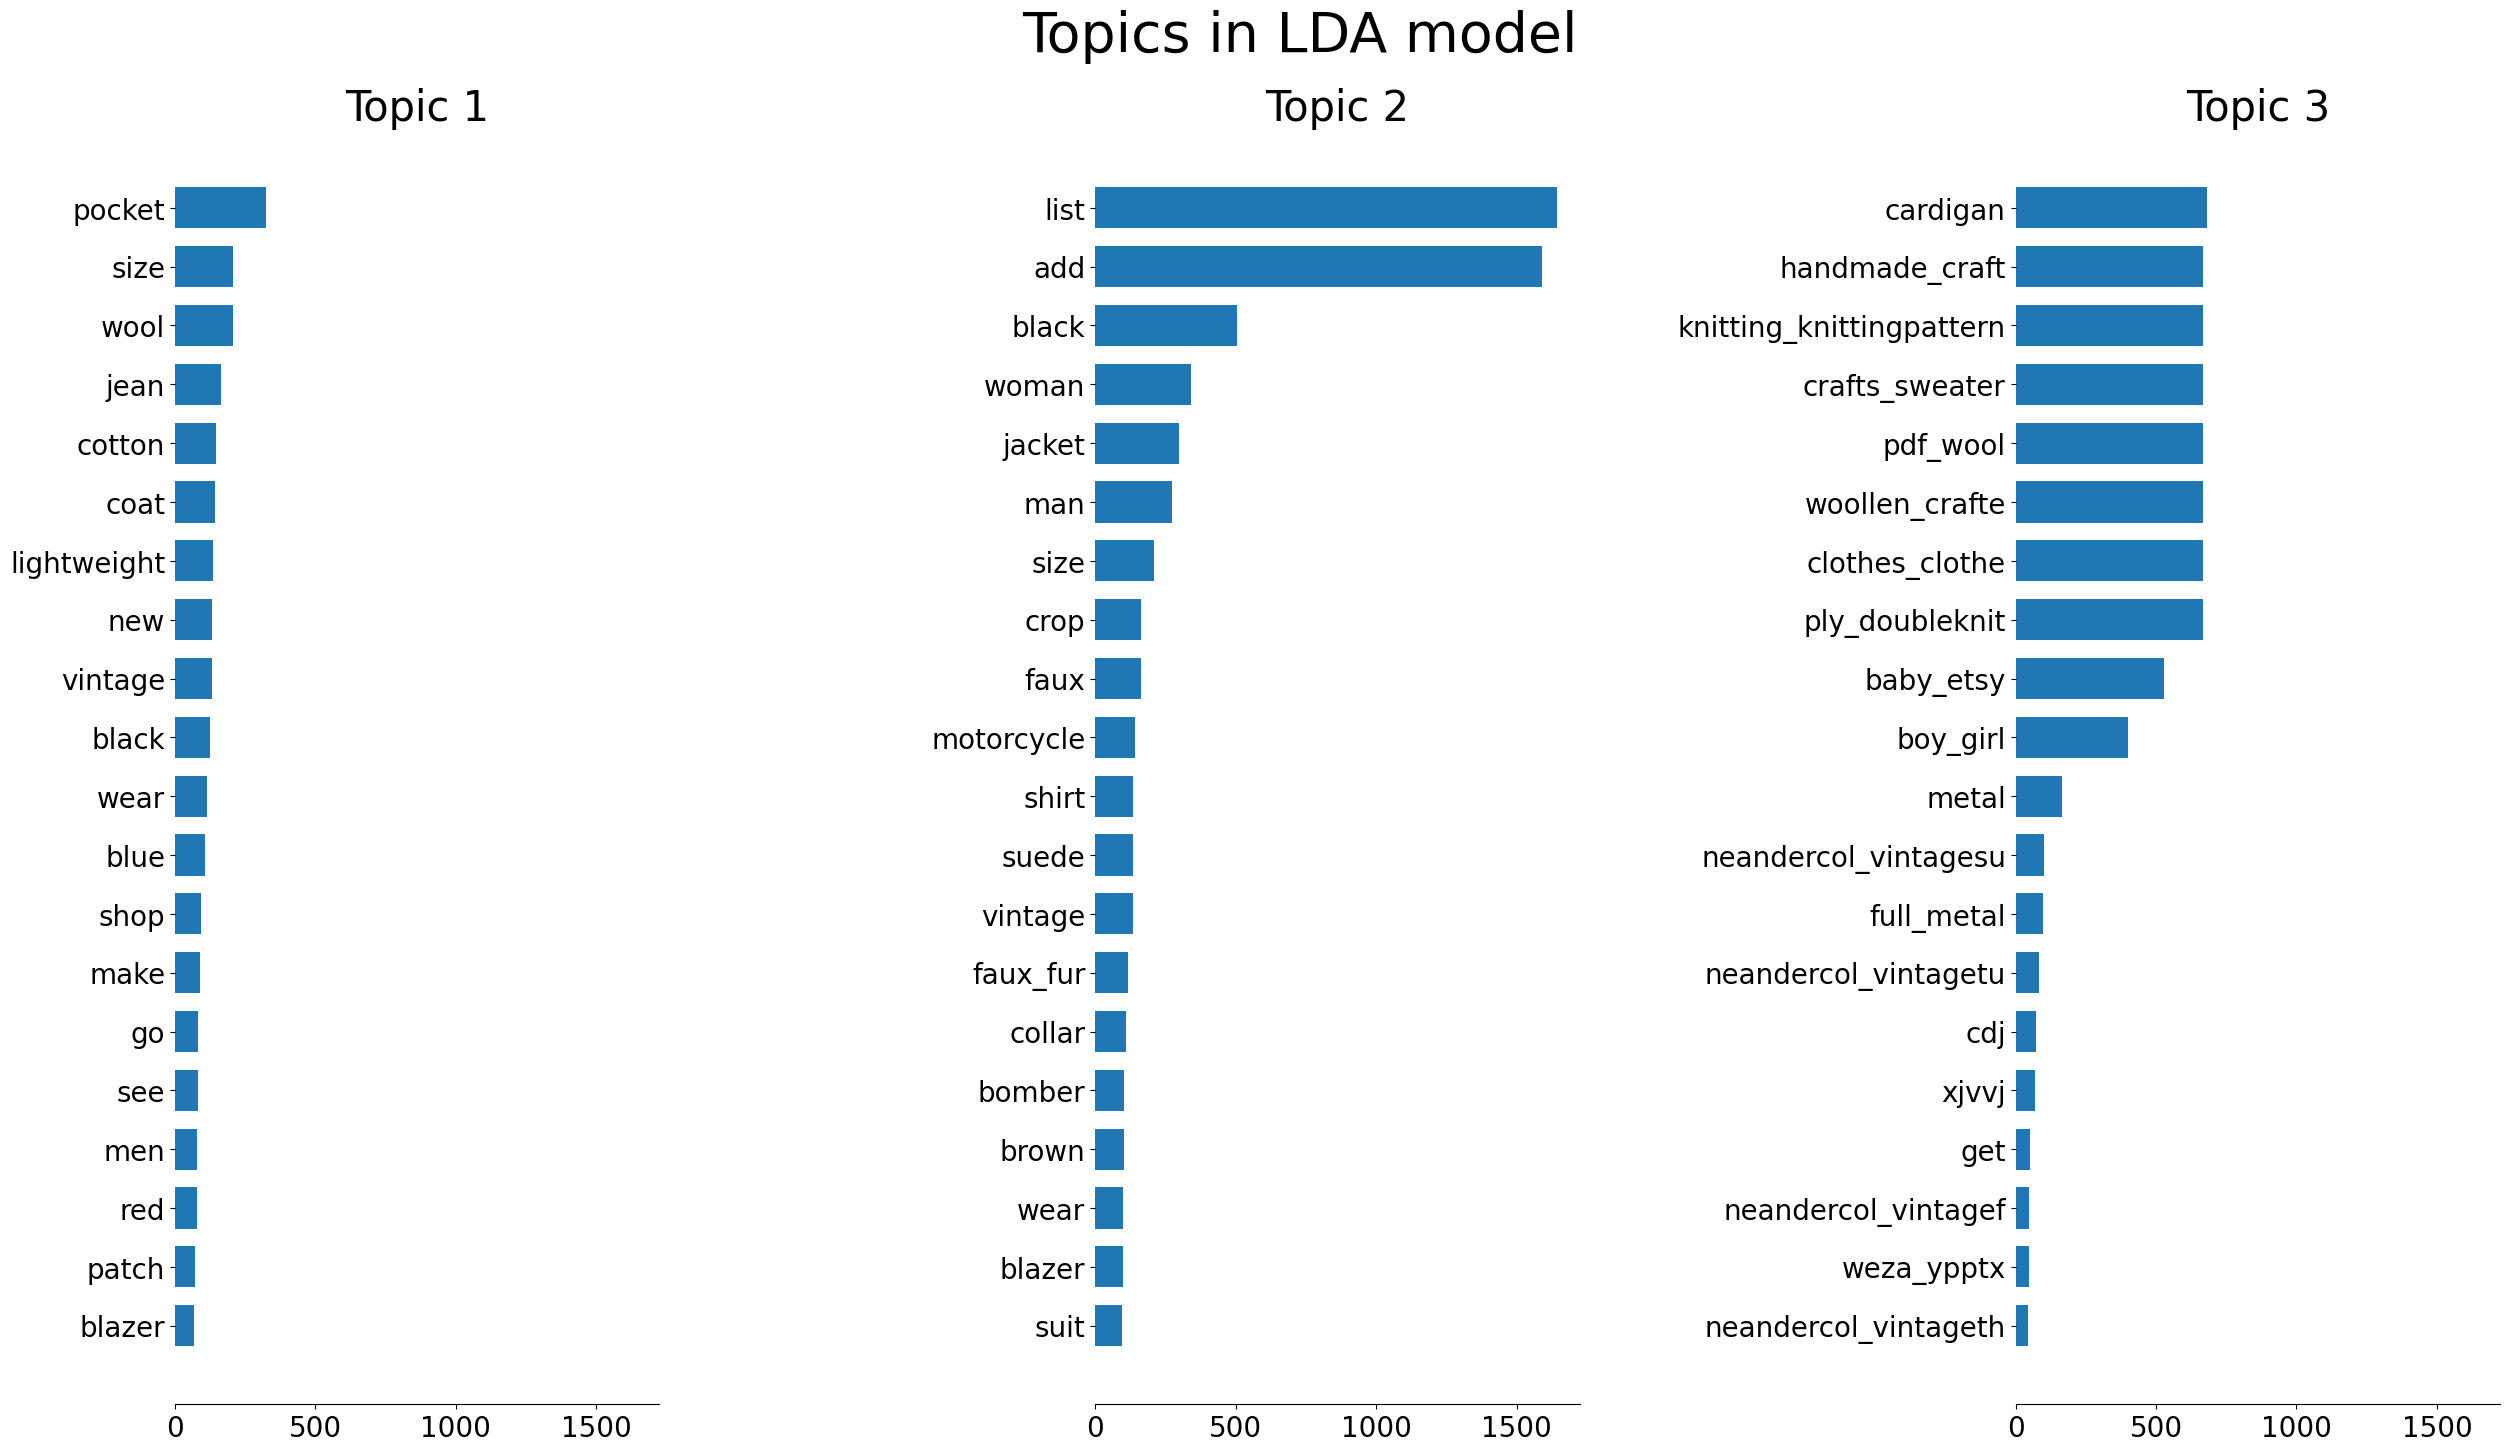

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

##### b. Find  popular keywords in neutral

In [ ]:
# Find the most common words in neutral tweets
neutral = []
for txt in df6_j_neu[df6_j_neu ['sentiment']=='Neutral']['cleaned_text'].tolist():
    for word in txt.split():
        neutral.append(word)

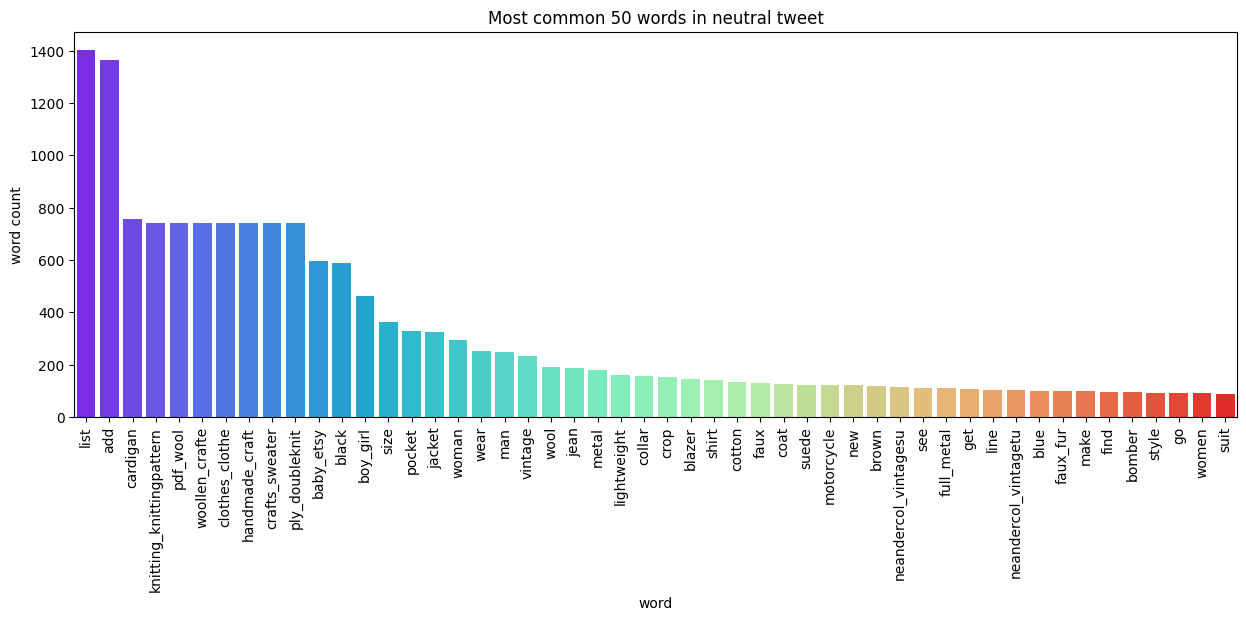

In [ ]:
# plot most 50 common words from neutral tweets
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(neutral).most_common(50))[0],y=pd.DataFrame(Counter(neutral).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in neutral tweet')
plt.xticks(rotation=90)
plt.show()

##### c. Neutral keyword clustering
[Source](https://github.com/MarcusChong123/Text-Clustering-with-Python/blob/master/kmeans_clustering_tutorial2.py)

Run Elbow method to choose cluster number

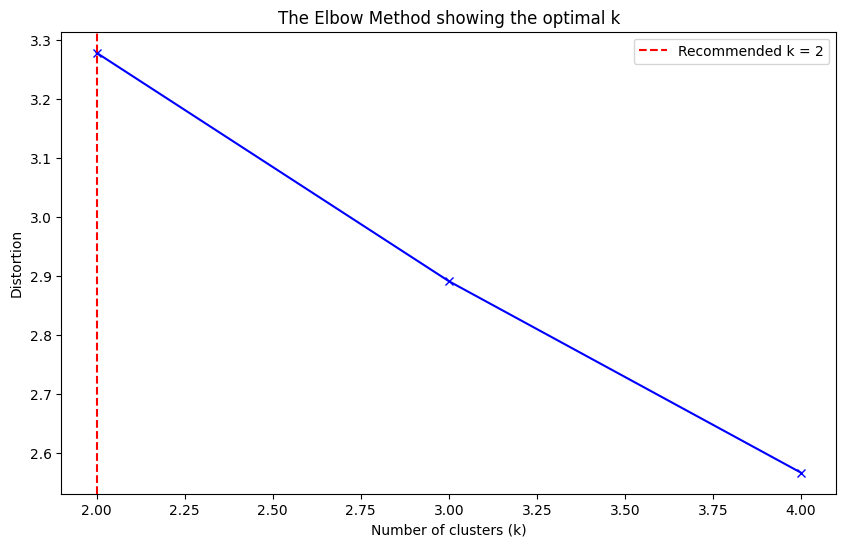

For n_clusters = 2, the average silhouette score is: 0.674219645300312


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import numpy as np

# Step 1: Convert list-like structures to strings
df_encoded = df6_j_neu.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))

# Step 2: Convert object types to numerical using LabelEncoder
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Function to calculate the distortion for each k
def calculate_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(
            sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        )
    return distortions

# Step 4: Define range of k and calculate distortions
k_range = range(2, 5)
distortions = calculate_elbow_method(df_scaled, k_range)

# Step 5: Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Step 6: Find the optimal number of clusters (elbow point)
optimal_k = np.argmin(np.gradient(np.gradient(distortions))) + 2
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Recommended k = {optimal_k}')
plt.legend()
plt.show()

# Step 7: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)

Check cluster quality using silhouette average
print('Average silhouette score:', visualizer.silhouette_score_)

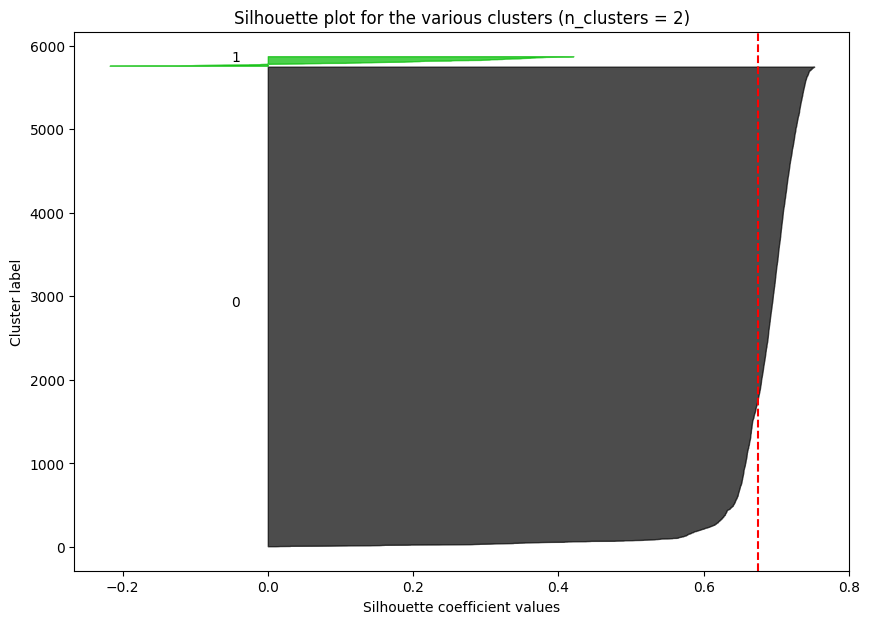

ValueError: y contains previously unseen labels: ['                    leather imported features fashionable motorcycle jacket with waterproof outer leather middle layer cotton inner layer plush  https   t co wpqxq cw a  twittertips  twitterchat  twitterfingers  twitterfunny  twitterads https   t co z n cdpzfq'
 '                cont          shirt  jeans    a leather bomber jacket                 '
 '               modeller  model  scalemodel  scalemodels  modelkit  modelling  scalemodelling  scale  fashion  plasticmodel  diorama  hobby  modeling  modellife  scalemodelsworldinspired sniper scene full metal jacket  https   t co mkcod fmmt'
 ...
 'zipper  crop jacket link    https   t co zoh uecdka https   t co kfapbexnlh'
 'zipper jacket  jaket crop  windbreaker jacket     https   t co zelhl nljk https   t co ywsa z g r'
 'zpinxign girls boys clothes hoodies sweater jacket pullover with hood and pocket shirt age      unsvlfx https   t co  ytqvpqnnb']

In [ ]:
# Step 8: Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'For n_clusters = {optimal_k}, the average silhouette score is: {silhouette_avg}')

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for the various clusters (n_clusters = {optimal_k})")
plt.show()

# Step 9: Convert the numerical columns back to the original object/text format
for column in label_encoders:
    le = label_encoders[column]
    df_encoded[column] = le.inverse_transform(df_encoded[column])

In [ ]:
df_encoded.head()

text       Dates      Time  \
3  check out what i am selling  topshop womens bl...  2023-06-29  23:55:35   
4      the real fly      full metal jacket will work  2023-06-29  23:54:24   
5  check out this listing i just added to my  pos...  2023-06-29  23:54:00   
6   funmovietvfan full metal jacket  https   t co...  2023-06-29  23:50:17   
8  feeling like private pyle in full metal jacket...  2023-06-29  23:44:25   

   likeCount  quoteCount  replyCount  retweetCount  char_count  word_count  \
3        1.0         0.0         0.0           0.0         208          46   
4        0.0         0.0         1.0           0.0          46           8   
5        0.0         0.0         0.0           0.0         161          29   
6        2.0         0.0         0.0           0.0          57           9   
8        0.0         0.0         0.0           0.0         100          21   

   sent_count               hashtags extracted_words  compound    pos   neu  \
3           2                mercari   bomber,jacket    0.0000  0.000  1.00   
4           1                                 jacket    0.0000  0.000  1.00   
5           2  Poshmark,shopmycloset   bomber,jacket    0.0000  0.000  1.00   
6           2                                 jacket    0.0000  0.000  1.00   
8           1                                 jacket    0.0258  0.191  0.67   

     neg sentiment                                       cleaned_text  \
3  0.000   Neutral  sell topshop women blue bomber code zxjre merc...   
4  0.000   Neutral                                      real fly work   
5  0.000   Neutral         list add bomber motorcycle_biker fcuaqsoho   
6  0.000   Neutral                                     metal dtetqtxq   
8  0.139   Neutral                  feel private pyle right hate even   

   cluster  Cluster  
3        0        1  
4        0        1  
5        0        1  
6        0        1  
8        0        0

In [ ]:
#Cluster the words in neutral tweets to identify common themes and word groups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df6_j_neu['cleaned_text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df6_j_neu['cluster'] = model.labels_
df6_j_neu

text       Dates  \
3      check out what i am selling  topshop womens bl...  2023-06-29   
4          the real fly      full metal jacket will work  2023-06-29   
5      check out this listing i just added to my  pos...  2023-06-29   
6       funmovietvfan full metal jacket  https   t co...  2023-06-29   
8      feeling like private pyle in full metal jacket...  2023-06-29   
...                                                  ...         ...   
32670  just in  this unique dinosaur iron sew on patc...  2023-05-16   
32734  in my  etsyshop  https   t co elm   xtp  blue ...  2023-05-16   
32752  v departed to attend celine s fashion pictoria...  2023-05-16   
32766  check out this listing i just added to my  pos...  2023-05-16   
32768   maarva andor sorry mate  you are way out  i h...  2023-05-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
3      23:55:35        1.0         0.0         0.0           0.0         208   
4      23:54:24        0.0         0.0         1.0           0.0          46   
5      23:54:00        0.0         0.0         0.0           0.0         161   
6      23:50:17        2.0         0.0         0.0           0.0          57   
8      23:44:25        0.0         0.0         0.0           0.0         100   
...         ...        ...         ...         ...           ...         ...   
32670  09:34:09        0.0         0.0         0.0           0.0         159   
32734  02:00:42        1.0         0.0         0.0           0.0         253   
32752  01:20:32        0.0         0.0         0.0           0.0         265   
32766  00:31:09        0.0         0.0         0.0           0.0         165   
32768  00:25:38        3.0         0.0         4.0           0.0         294   

       word_count  sent_count  ... extracted_words compound    pos    neu  \
3              46           2  ...   bomber,jacket   0.0000  0.000  1.000   
4               8           1  ...          jacket   0.0000  0.000  1.000   
5              29           2  ...   bomber,jacket   0.0000  0.000  1.000   
6               9           2  ...          jacket   0.0000  0.000  1.000   
8              21           1  ...          jacket   0.0258  0.191  0.670   
...           ...         ...  ...             ...      ...    ...    ...   
32670          28           3  ...    jeans,jacket   0.0000  0.000  1.000   
32734          43           4  ...    jeans,jacket   0.0000  0.000  1.000   
32752          57           3  ...    jeans,jacket   0.0000  0.000  1.000   
32766          29           2  ...          jacket   0.0000  0.000  1.000   
32768          73           3  ...    jeans,jacket   0.0258  0.037  0.907   

         neg  sentiment                                       cleaned_text  \
3      0.000    Neutral  sell topshop women code zxjre mercari_term gnl...   
4      0.000    Neutral                                      real fly work   
5      0.000    Neutral         list add bomber motorcycle_biker fcuaqsoho   
6      0.000    Neutral                                     metal dtetqtxq   
8      0.139    Neutral                  feel private pyle right hate even   
...      ...        ...                                                ...   
32670  0.000    Neutral    unique dinosaur patch shirt bag embroider badge   
32734  0.000    Neutral  baseball patch jean jacket patch backpack appl...   
32752  0.000    Neutral  depart attend celine fashion pictorial dress j...   
32766  0.000    Neutral                         list add heart floral crop   
32768  0.056    Neutral  sorry mate way never perform femininity feel f...   

      cluster  Bow Clus Label  kmedoids_cluster  
3           0               2                 0  
4           0               2                 0  
5           1               1                 0  
6           0               2                 0  
8           0               2                 0  
...       ...             ...               ...  
32670       0 

In [ ]:
#print out 10 feature terms of each cluster
clusters = df6_j_neu.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['cleaned_text','compound','likeCount','replyCount','retweetCount']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 cardigan
 crafts_sweater
 pdf_wool
 ply_doubleknit
 knitting_knittingpattern
 handmade_craft
 woollen_crafte
 clothes_clothe
 baby_etsy
 boy_girl
------------
Cluster 1:
 list
 add
 size
 black
 vintage
 woman
 wool
 lightweight
 blazer
 faux
------------


#### 4.1.3 Analysis positive words
a. Create positive sentiment word clouds<br/>
b. Finding high-frequency positive words<br/>
c. Text clustering for positive words<br/>

##### a. Generate word clouds word cloud for positive tweets

In [ ]:
df6_j_pos = df6_j.drop(df6_j[df6_j['sentiment'] != 'Positive'].index)
df6_j_pos

text       Dates  \
11920  different versions of this audio keep going ar...  2023-06-15   
11628  the superior ac dc shirt and black leather jac...  2023-06-15   
31278   hot search   taehyung looks stunning in celin...  2023-05-21   
6490   nothing can compare to the fact that at first ...  2023-06-22   
32160  louis wore a tommy jeans x aries logo destroye...  2023-05-18   
...                                                  ...         ...   
6084    donutoperator ammo made by companies like drt...  2023-06-22   
6085   women s arc  d denim trucker jacket     cotton...  2023-06-22   
6095    amynemmity yea but you got to admit  takeshit...  2023-06-22   
6086   trending men leather jackets are on sale enjoy...  2023-06-22   
6092    ukmtb chat i must say though  their waterproo...  2023-06-22   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
11920  09:44:17     4150.0        24.0        77.0         219.0         262   
11628  17:26:57     3927.0       103.0         2.0         656.0         102   
31278  07:19:53     3814.0        33.0       178.0        1076.0         113   
6490   04:42:58     3471.0        22.0         3.0         526.0         299   
32160  05:18:35     2728.0       267.0        16.0         341.0         303   
...         ...        ...         ...         ...           ...         ...   
6084   18:14:26        0.0         0.0         0.0           0.0          94   
6085   18:11:55        0.0         0.0         0.0           0.0         295   
6095   18:01:26        0.0         0.0         0.0           0.0          86   
6086   18:09:09        0.0         0.0         0.0           0.0         302   
6092   18:03:05        0.0         0.0         0.0           0.0         162   

       word_count  sent_count  \
11920          52           4   
11628          16           1   
31278          21           2   
6490           58           1   
32160          51           3   
...           ...         ...   
6084           19           3   
6085           50           2   
6095           17           1   
6086           54           1   
6092           32           1   

                                                hashtags extracted_words  \
11920                                                 []          jacket   
11628                                                 []          jacket   
31278                                         [TAEHYUNG]    jacket,jeans   
6490                                                  []          jacket   
32160                                                 []    jeans,jacket   
...                                                  ...             ...   
6084                                                  []          jacket   
6085   [twitter, twitterposts, twitterweek, twitterma...          jacket   
6095                                                  []          jacket   
6086   [MomsforLiberty, Zuck, Titan, Debris, Schiff, ...          jacket   
6092                                                  []          jacket   

       compound    pos    neu    neg sentiment  
11920    0.4464  0.167  0.756  0.077  Positive  
11628    0.5423  0.189  0.811  0.000  Positive  
31278    0.3818  0.140  0.860  0.000  Positive  
6490     0.4215  0.048  0.952  0.000  Positive  
32160    0.2023  0.100  0.837  0.064  Positive  
...         ...    ...    ...    ...       ...  
6084     0.3612  0.161  0.839  0.000  Positive  
6085     0.5574  0.116  0.884  0.000  Positive  
6095     0.7964  0.372  0.628  0.000  Positive  
6086     0.5106  0.093  0.907  0.000  Positive  
6092     0.4404  0.097  0.903  0.000  Positive  

[5215 rows x 17 columns]

In [ ]:
words = df6_j_pos['text'].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["https",'get','woman','say','jacket','see','give','go','dress', "co", "list", 'ad','http','poshmark','shopmycloset','poshmarkapp','closet','ebay','look','http_co','check_list','http_co','check_list','ad_poshmark','jean','closet','check','leather', 'know', 'also', 'get', 'find', 'think', 'want', 'make', 'need','add'] ) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df6_j_pos['cleaned_text'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df6_j_pos['cleaned_text'])

k = 3 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
biker,start,cool,make,get,concealedcarry_corset,chaps_jean,silver_belt,skulls_mcv,motorcycleclub_bik,full_metal,collar,red,perfect,shop,patch,look,brown,wear,pair,short,pull,cute,gloves_bikerlife,play,pretty,kind,thank,favorite,way,sale,silver_moissanite,new,sleeve,go,girl,lot,help,classic,good,button,jacket,design,man,neck,shoe,trusted_outletstore,motorcycle,shirt,art

Topic#  2
black,wear,pocket,add,list,love,jean,jacket,shirt,good,hand,still,pant,top,fit,take,day,time,put,look,back,really,hair,metal,see,much,crop_top,well,boot,long,outfit,crop,old,right,come,suit,show,clothe,big,thing,say,get,film,year,never,give,nice,small,vintage,life

Topic#  3
jacket,man,woman,coat,style,wear,fashion,wool,size,buy,great,pocket,go,lightweight,cotton,black,warm,well,always,lol,keep,piece,guy,casual,suit,summer,make,faux,winter,little,bomber,like,use,color,try,outfit,work,click,amazing,come,shop,order,ever,ready,take,movie,fabric,clothing,tell,good



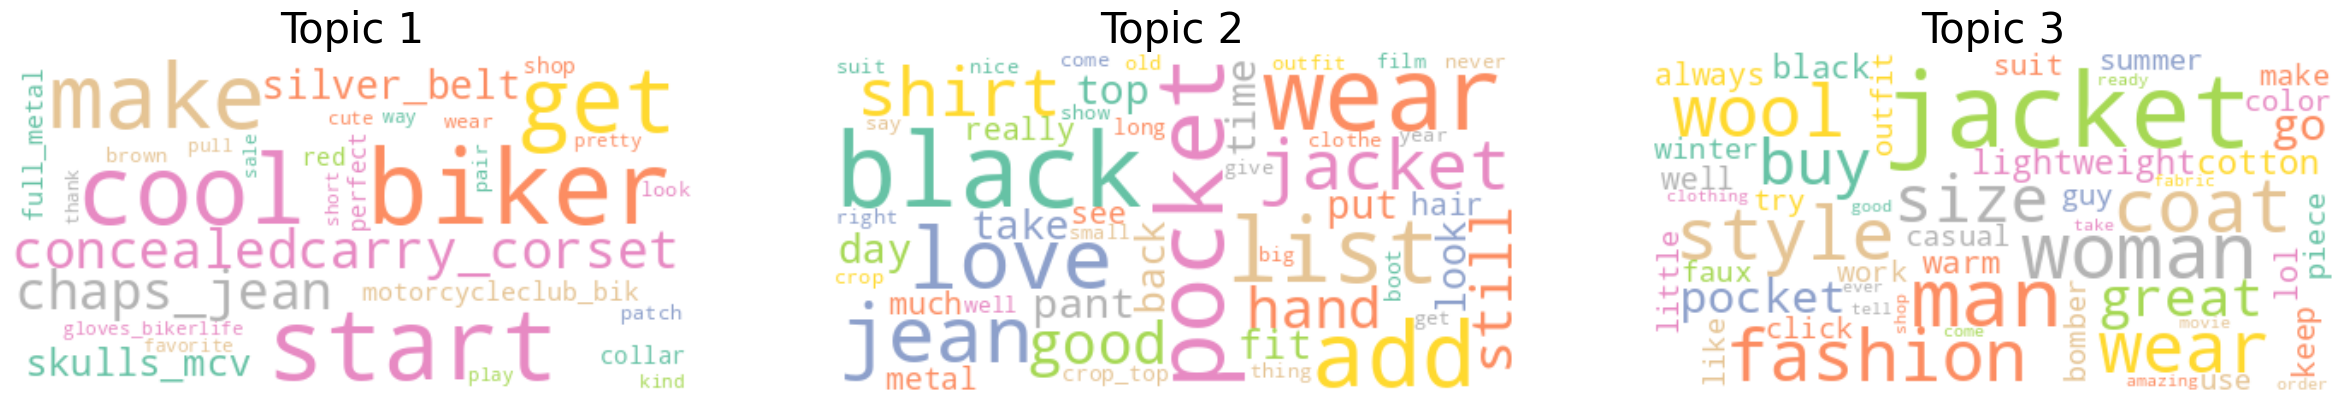

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()
#stop_words = ['http_co','check_list','ad_poshmark','jacket','closet','check','add','leather','jean','love','good','see','wear','day']

wcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')


fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

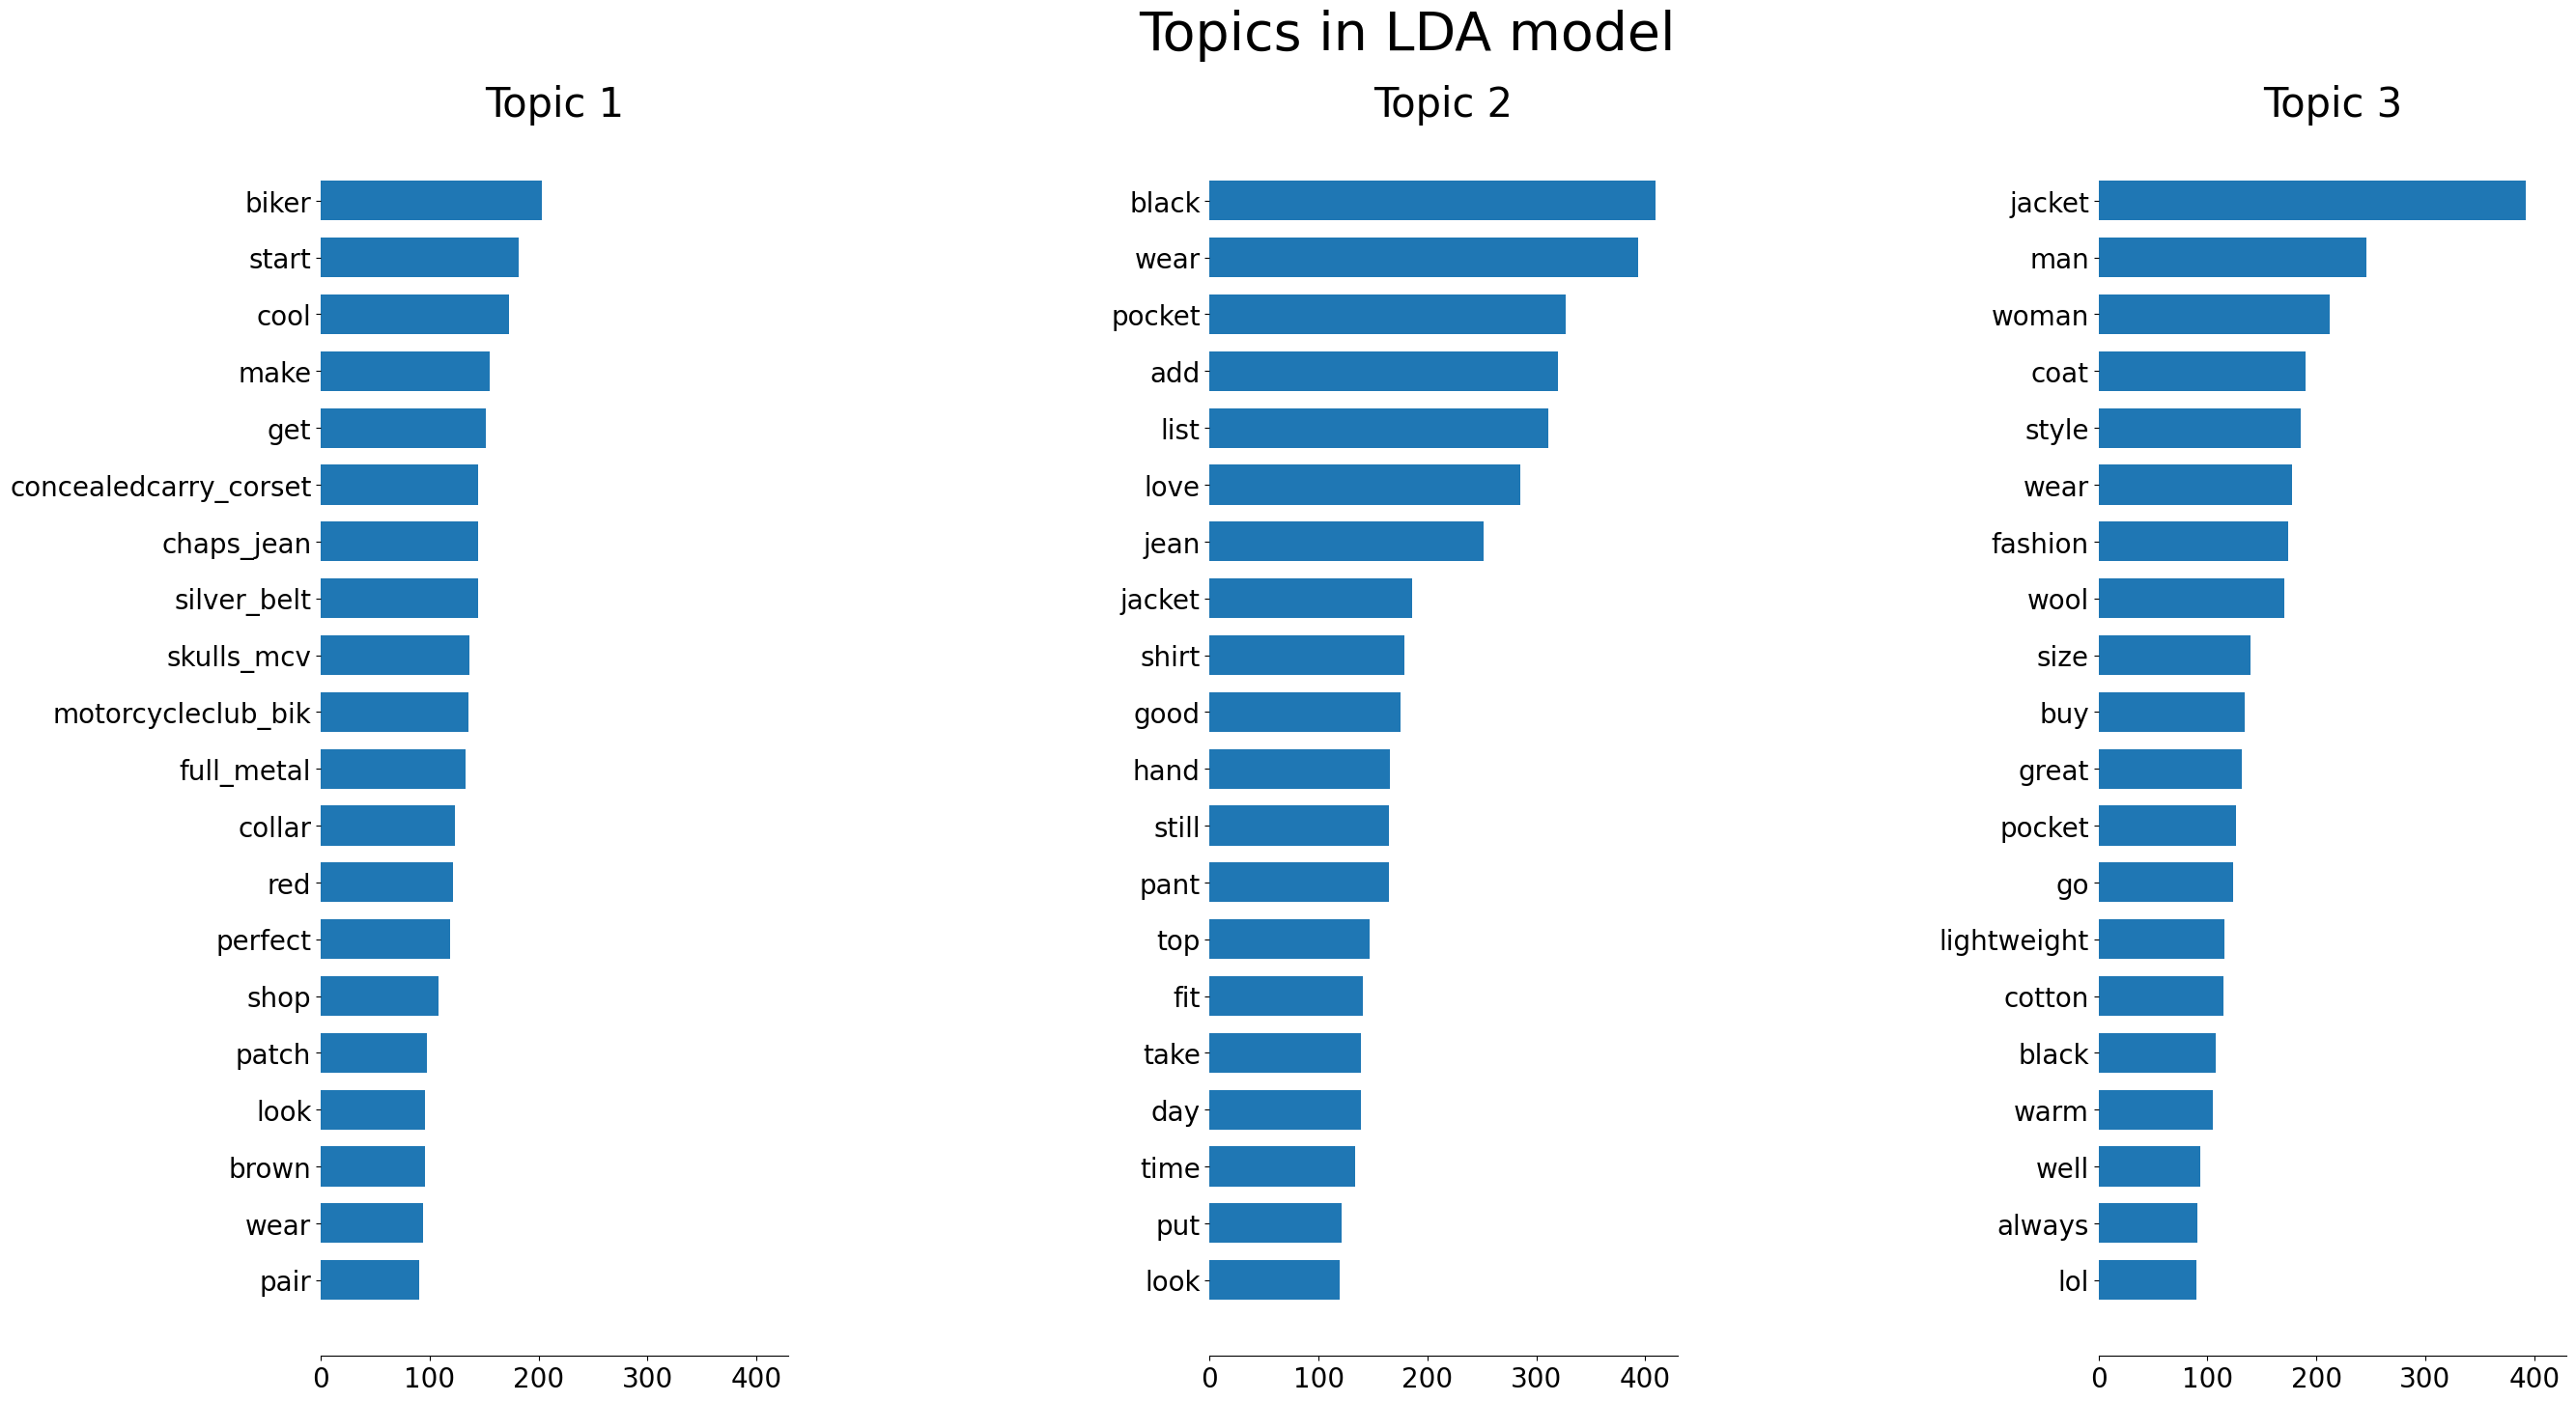

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

##### b. Find  popular keywords in positive

In [ ]:
# Find the most common words in positive tweets
positive = []
for txt in df6_j_pos[df6_j_pos ['sentiment']=='Positive']['cleaned_text'].tolist():
    for word in txt.split():
        positive.append(word)

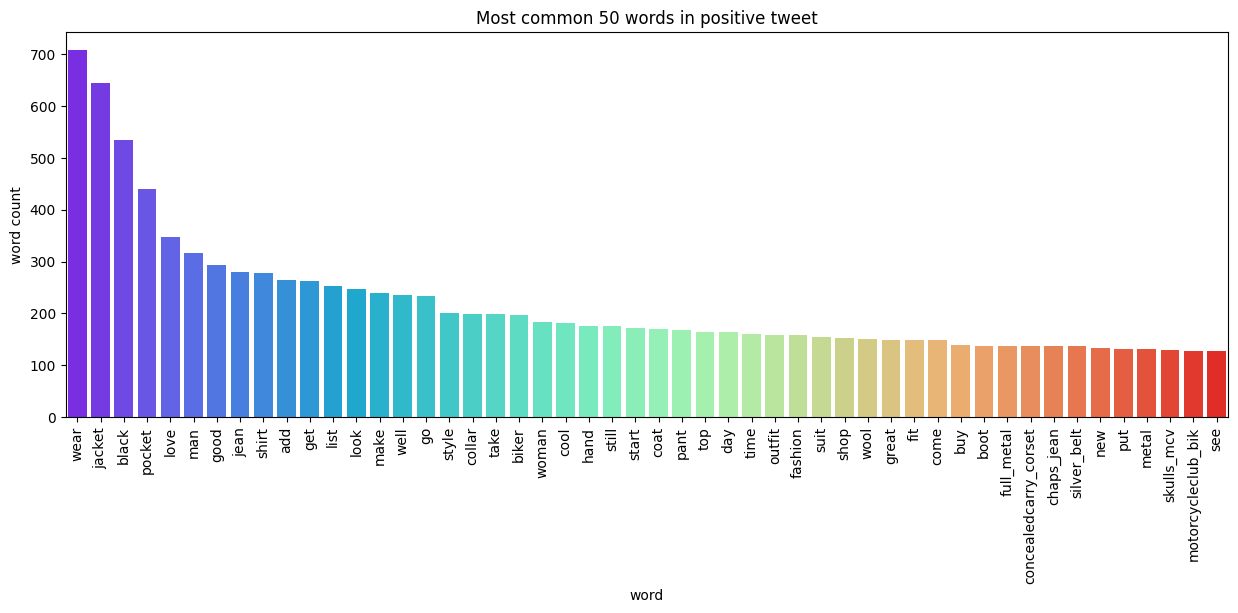

In [ ]:
# plot most 50 common words from positive tweets
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(positive).most_common(50))[0],y=pd.DataFrame(Counter(positive).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in positive tweet')
plt.xticks(rotation=90)
plt.show()

##### c. Positive keyword clustering
[Source](https://github.com/MarcusChong123/Text-Clustering-with-Python/blob/master/kmeans_clustering_tutorial2.py)

Run Elbow method to choose cluster number

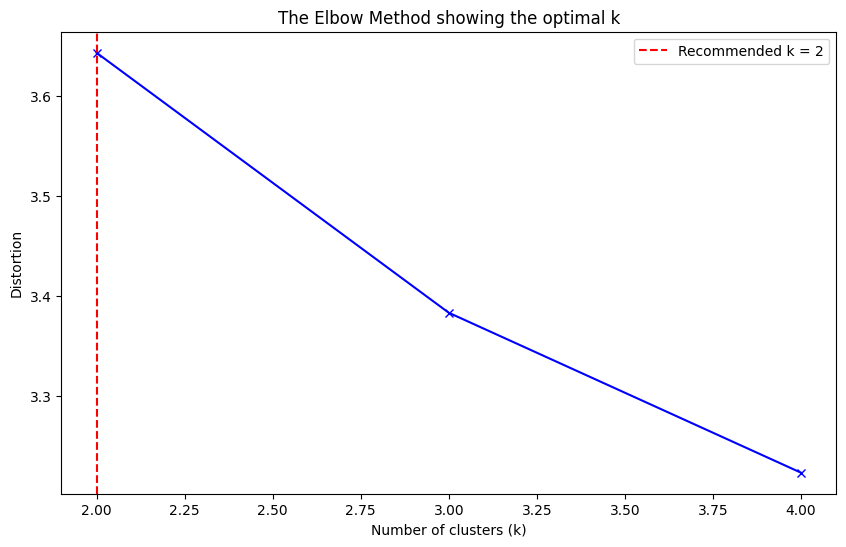

For n_clusters = 2, the average silhouette score is: 0.8666297398733143


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import numpy as np

# Step 1: Convert list-like structures to strings
df_encoded = df6_j_pos.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))

# Step 2: Convert object types to numerical using LabelEncoder
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Function to calculate the distortion for each k
def calculate_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(
            sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        )
    return distortions

# Step 4: Define range of k and calculate distortions
k_range = range(2, 5)
distortions = calculate_elbow_method(df_scaled, k_range)

# Step 5: Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Step 6: Find the optimal number of clusters (elbow point)
optimal_k = np.argmin(np.gradient(np.gradient(distortions))) + 2
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Recommended k = {optimal_k}')
plt.legend()
plt.show()

# Step 7: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


Check cluster quality using silhouette average
print('Average silhouette score:', visualizer.silhouette_score_)

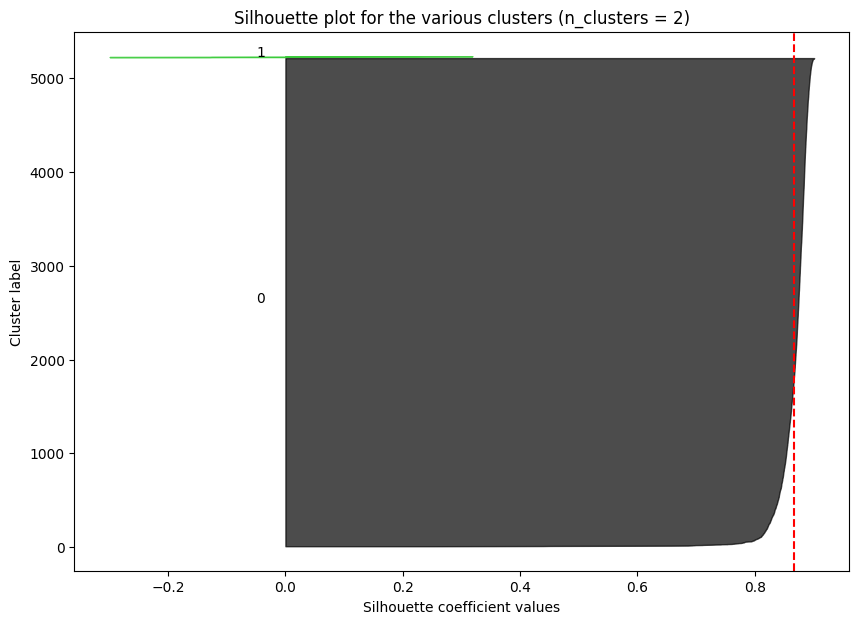

In [ ]:
# Step 8: Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'For n_clusters = {optimal_k}, the average silhouette score is: {silhouette_avg}')

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for the various clusters (n_clusters = {optimal_k})")
plt.show()

# Step 9: Convert the numerical columns back to the original object/text format
for column in label_encoders:
    le = label_encoders[column]
    df_encoded[column] = le.inverse_transform(df_encoded[column])

In [ ]:
#Cluster the words in positive tweets to identify common themes and word groups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df6_j_pos['cleaned_text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df6_j_pos['cluster'] = model.labels_
df6_j_pos

text       Dates  \
0      i thought i posted it already but here is rave...  2023-06-29   
1      i do not believe for a second that all the peo...  2023-06-29   
2       gonefishkin as long as it is not leather jack...  2023-06-29   
7      men do not lay their jacket on the floor for w...  2023-06-29   
15         i want a new leather jacket and a diesel belt  2023-06-29   
...                                                  ...         ...   
32695   graciescomet  dyl an black jeans and a black ...  2023-05-16   
32722  everything on sale    high rise skinny   start...  2023-05-16   
32735  excited to share the latest addition to my  et...  2023-05-16   
32736  excited to share the latest addition to my  et...  2023-05-16   
32758   confessedsins  it is  a long story  one i wou...  2023-05-16   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
0      23:59:38       13.0         0.0         2.0           6.0         292   
1      23:59:03       10.0         0.0         0.0           0.0         203   
2      23:56:20        3.0         0.0         0.0           0.0          86   
7      23:44:58        1.0         0.0         1.0           0.0          88   
15     23:36:02        0.0         0.0         0.0           0.0          45   
...         ...        ...         ...         ...           ...         ...   
32695  06:04:59        0.0         0.0         0.0           0.0         151   
32722  03:00:16        0.0         0.0         0.0           0.0         296   
32735  01:55:12        0.0         0.0         0.0           0.0         293   
32736  01:53:41        0.0         0.0         0.0           0.0         293   
32758  00:55:55        0.0         0.0         1.0           0.0         287   

       word_count  sent_count  \
0              59           4   
1              46           3   
2              21           1   
7              20           1   
15             10           1   
...           ...         ...   
32695          35           3   
32722          61           3   
32735          52           1   
32736          52           1   
32758          73           6   

                                                hashtags  \
0                                [oc, originalcharacter]   
1                                                     []   
2                                                     []   
7                                                     []   
15                                                    []   
...                                                  ...   
32695                                                 []   
32722  [OUTLETSTORE, concealedcarry, corset, motorcyc...   
32735  [etsy, button, organiccotton, toddlerdenimjack...   
32736  [etsy, button, organiccotton, toddlerdenimjack...   
32758                                                 []   

            extracted_words  compound    pos    neu   neg sentiment  \
0                    jacket    0.8047  0.166  0.785  0.05  Positive   
1                    jacket    0.6996  0.153  0.847  0.00  Positive   
2            jacket,sneaker    0.2023  0.107  0.893  0.00  Positive   
7                    jacket    0.3612  0.122  0.878  0.00  Positive   
15                   jacket    0.0772  0.178  0.822  0.00  Positive   
...                     ...       ...    ...    ...   ...       ...   
32695          jeans,jacket    0.7096  0.223  0.777  0.00  Positive   
32722          jacket,jeans    0.4215  0.072  0.928  0.00  Positive   
32735  jacket,jacket,jacket    0.5574  0.106  0.894  0.00  Positive   
32736  jacket,jacket,jacket    0.8316  0.188  0.812  0.00  Positive   
32758          jacket,jeans    0.4232  0.095  0.905  0.00  Positive   

                                            cleaned_text  cluster  
0      thought post already raven new outfit compare ...        1  
1      believe second people drag frank selling use v...        1  
2                                      long sneaker

In [ ]:
#print out 10 feature terms of each cluster
clusters = df6_j_pos.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['cleaned_text','pos','likeCount','replyCount','retweetCount']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 concealedcarry_corset
 silver_belt
 chaps_jean
 skulls_mcv
 biker
 motorcycleclub_bik
 start
 gloves_bikerlife
 silver_moissanite
 trusted_outletstore
------------
Cluster 1:
 wear
 jacket
 black
 love
 pocket
 list
 add
 good
 jean
 man
------------


#### 4.1.4 Analysis negative words
a. Create negative sentiment word clouds<br/>
b. Finding high-frequency negative words<br/>
c. Text clustering for negative words<br/>

##### a. Generate word clouds word cloud for negative tweets

In [ ]:
df6_j_neg = df6_j.drop(df6_j[df6_j['sentiment'] != 'Negative'].index)
df6_j_neg

text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
7631   she bought me my first ever set of pyjamas  no...  2023-06-20   
3295    zhaolusi  yue  puke into the  jacket  pocket ...  2023-06-26   
4228   there is no way taylor does not know about swi...  2023-06-25   
30373  the reason why  dress sneakers  are bad is bec...  2023-05-24   
...                                                  ...         ...   
6012   height      gorl dark brown hair with white st...  2023-06-22   
6105    cnn fancy stuff  but logistically  it is not ...  2023-06-22   
6077   nothing errods the    s in your pocket  as muc...  2023-06-22   
6100   no matter where you are always have style   ou...  2023-06-22   
6088   that lv leather jacket hov had on is so nasty ...  2023-06-22   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
7631   17:33:18     1940.0        95.0        42.0          65.0         119   
3295   06:28:11      887.0        56.0         7.0         259.0         156   
4228   00:58:00      808.0         3.0        11.0          15.0         136   
30373  18:08:05      552.0        13.0        39.0          29.0         291   
...         ...        ...         ...         ...           ...         ...   
6012   19:49:47        0.0         0.0         0.0           0.0         271   
6105   17:48:37        0.0         0.0         0.0           0.0         281   
6077   18:23:10        0.0         0.0         0.0           0.0         254   
6100   18:00:00        0.0         0.0         0.0           0.0         145   
6088   18:06:24        0.0         1.0         0.0           1.0          51   

       word_count  sent_count                             hashtags  \
389            68           1                                   []   
7631           23           3                                   []   
3295           33           2  [ZhaoLusi, ChenZheyuan, HiddenLove]   
4228           31           1                                   []   
30373          56           4                                   []   
...           ...         ...                                  ...   
6012           60           3                                   []   
6105           50           2                                   []   
6077           54           3                                   []   
6100           30           2             [style, fashion, jacket]   
6088           14           2                                   []   

            extracted_words  compound    pos    neu    neg sentiment  
389           jacket,jacket   -0.6808  0.046  0.824  0.130  Negative  
7631                 jacket   -0.2960  0.000  0.896  0.104  Negative  
3295                 jacket   -0.5267  0.000  0.871  0.129  Negative  
4228                 jacket   -0.2960  0.000  0.925  0.075  Negative  
30373  sneaker,jacket,jeans   -0.2565  0.087  0.789  0.124  Negative  
...                     ...       ...    ...    ...    ...       ...  
6012                 jacket   -0.7184  0.000  0.875  0.125  Negative  
6105                 jacket   -0.1901  0.117  0.753  0.131  Negative  
6077                 jacket   -0.7050  0.031  0.857  0.112  Negative  
6100          jacket,jacket   -0.2732  0.043  0.870  0.087  Negative  
6088                 jacket   -0.6825  0.000  0.661  0.339  Negative  

[2133 rows x 17 columns]

In [ ]:
words = df6_j_neg['text'].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['poshmark_closet','jacket','leather','leather_jacket','pocket','miss','list','add','look','get','wear','people','know','time','right','go','put','see','take','still','check','dress','jean','jacket','wear','pant','boot','co','https','say','fuck','pair','cut','suit','outfit','ask','actually','also','buy','get','think','find','jacket','go','need','thing','watch','see','hate','back','make','shit','dead','give','wear','add','bad','jacket','list','really','poshmark_closet','make'] ) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df6_j_neg['cleaned_text'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df6_j_neg['cleaned_text'])

k = 6 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=6,
                          random_state=10)

Topic#  1
jacket,get,black,wear,metal,use,boot,always,even,make,amp,life,white,hair,show,kind,real,coat,color,feel,good,many,pant,first,zip,thing,buy,red,want,never,bitch,yellow,cool,wrong,punk,break,collar,world,money,much,hot,stupid,dog,fucking,yet,one,vest,see,stuff,die

Topic#  2
miss,boy,style,jacket,bomber,size,motorcycle,find,different,fake,sell,sneaker,possible,throw,product,soon,pink,lose,pocket,use,die,home,yellow_pant,way,print,day,collar,old,chest,remember,leave,play,vintage,send,trend,insane,coat,baby,post,military,guess,crop_top,skirt,wall,loose,white_pant,tough,colour,steal,street

Topic#  3
add,list,poshmark_closet,hot,gun,black,old,block_sport,go,probably,man,small,light,new,walk,already,lightweight,wear,death,bullet,ass,literally,price_link,code,hood,jean,damage,feel,shoulder,look,shock,tattoo,away,month,arm,rain,measure_success,hair,today,want,night,lie,crop,glance,get,hour,fix,cool,shopmycloset_poshmarkapp,build

Topic#  4
guy,want,look,work,come,big,wear,red,think,

IndexError: index 3 is out of bounds for axis 0 with size 3

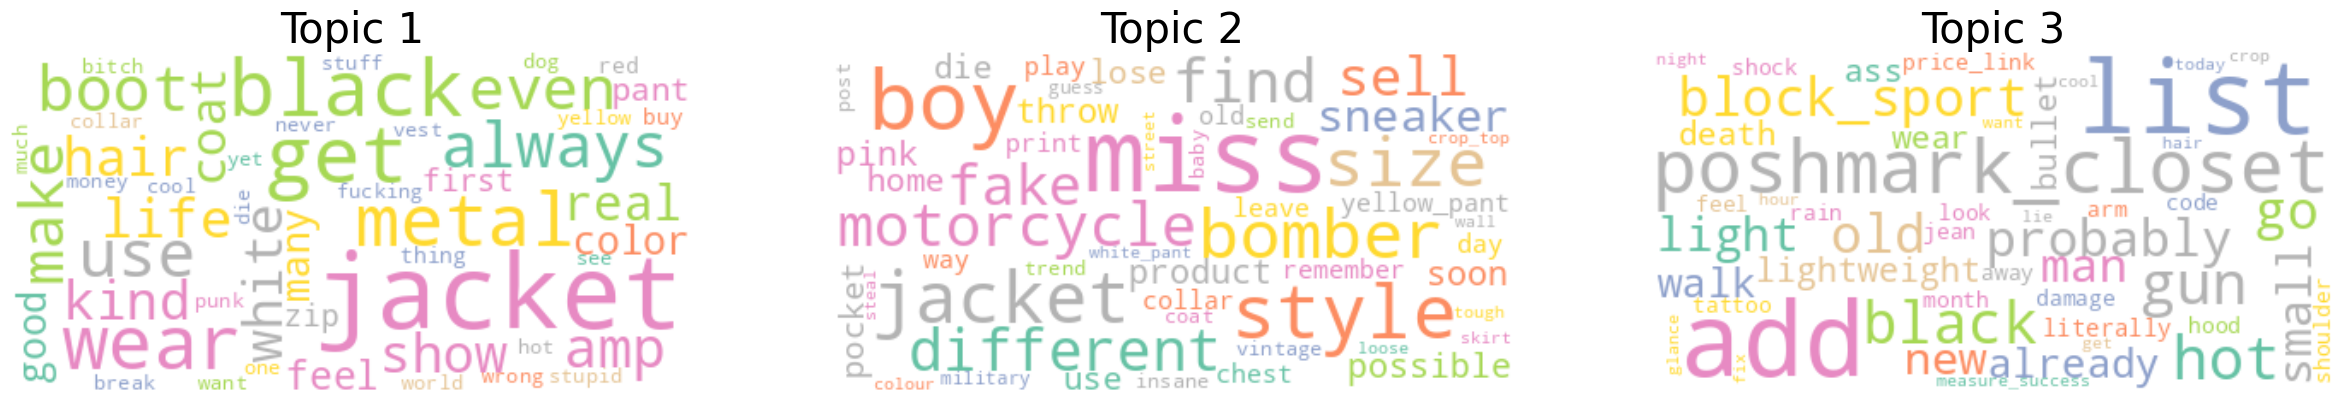

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()
stop_words = ['poshmark_closet','jacket','leather','leather_jacket','pocket','miss','list','add','look','get','wear','people','know','time','right','go','put','see','take','still','check','dress','jean','jacket','wear','pant','boot','co','https','say','fuck','pair','cut','suit','outfit','ask','actually','also','buy','get','think','find','jacket','go','need','thing','watch','see','hate','back','make','shit','dead','give','wear','add','bad','jacket','list','really','poshmark_closet','make']

wcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')


fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")



IndexError: index 3 is out of bounds for axis 0 with size 3

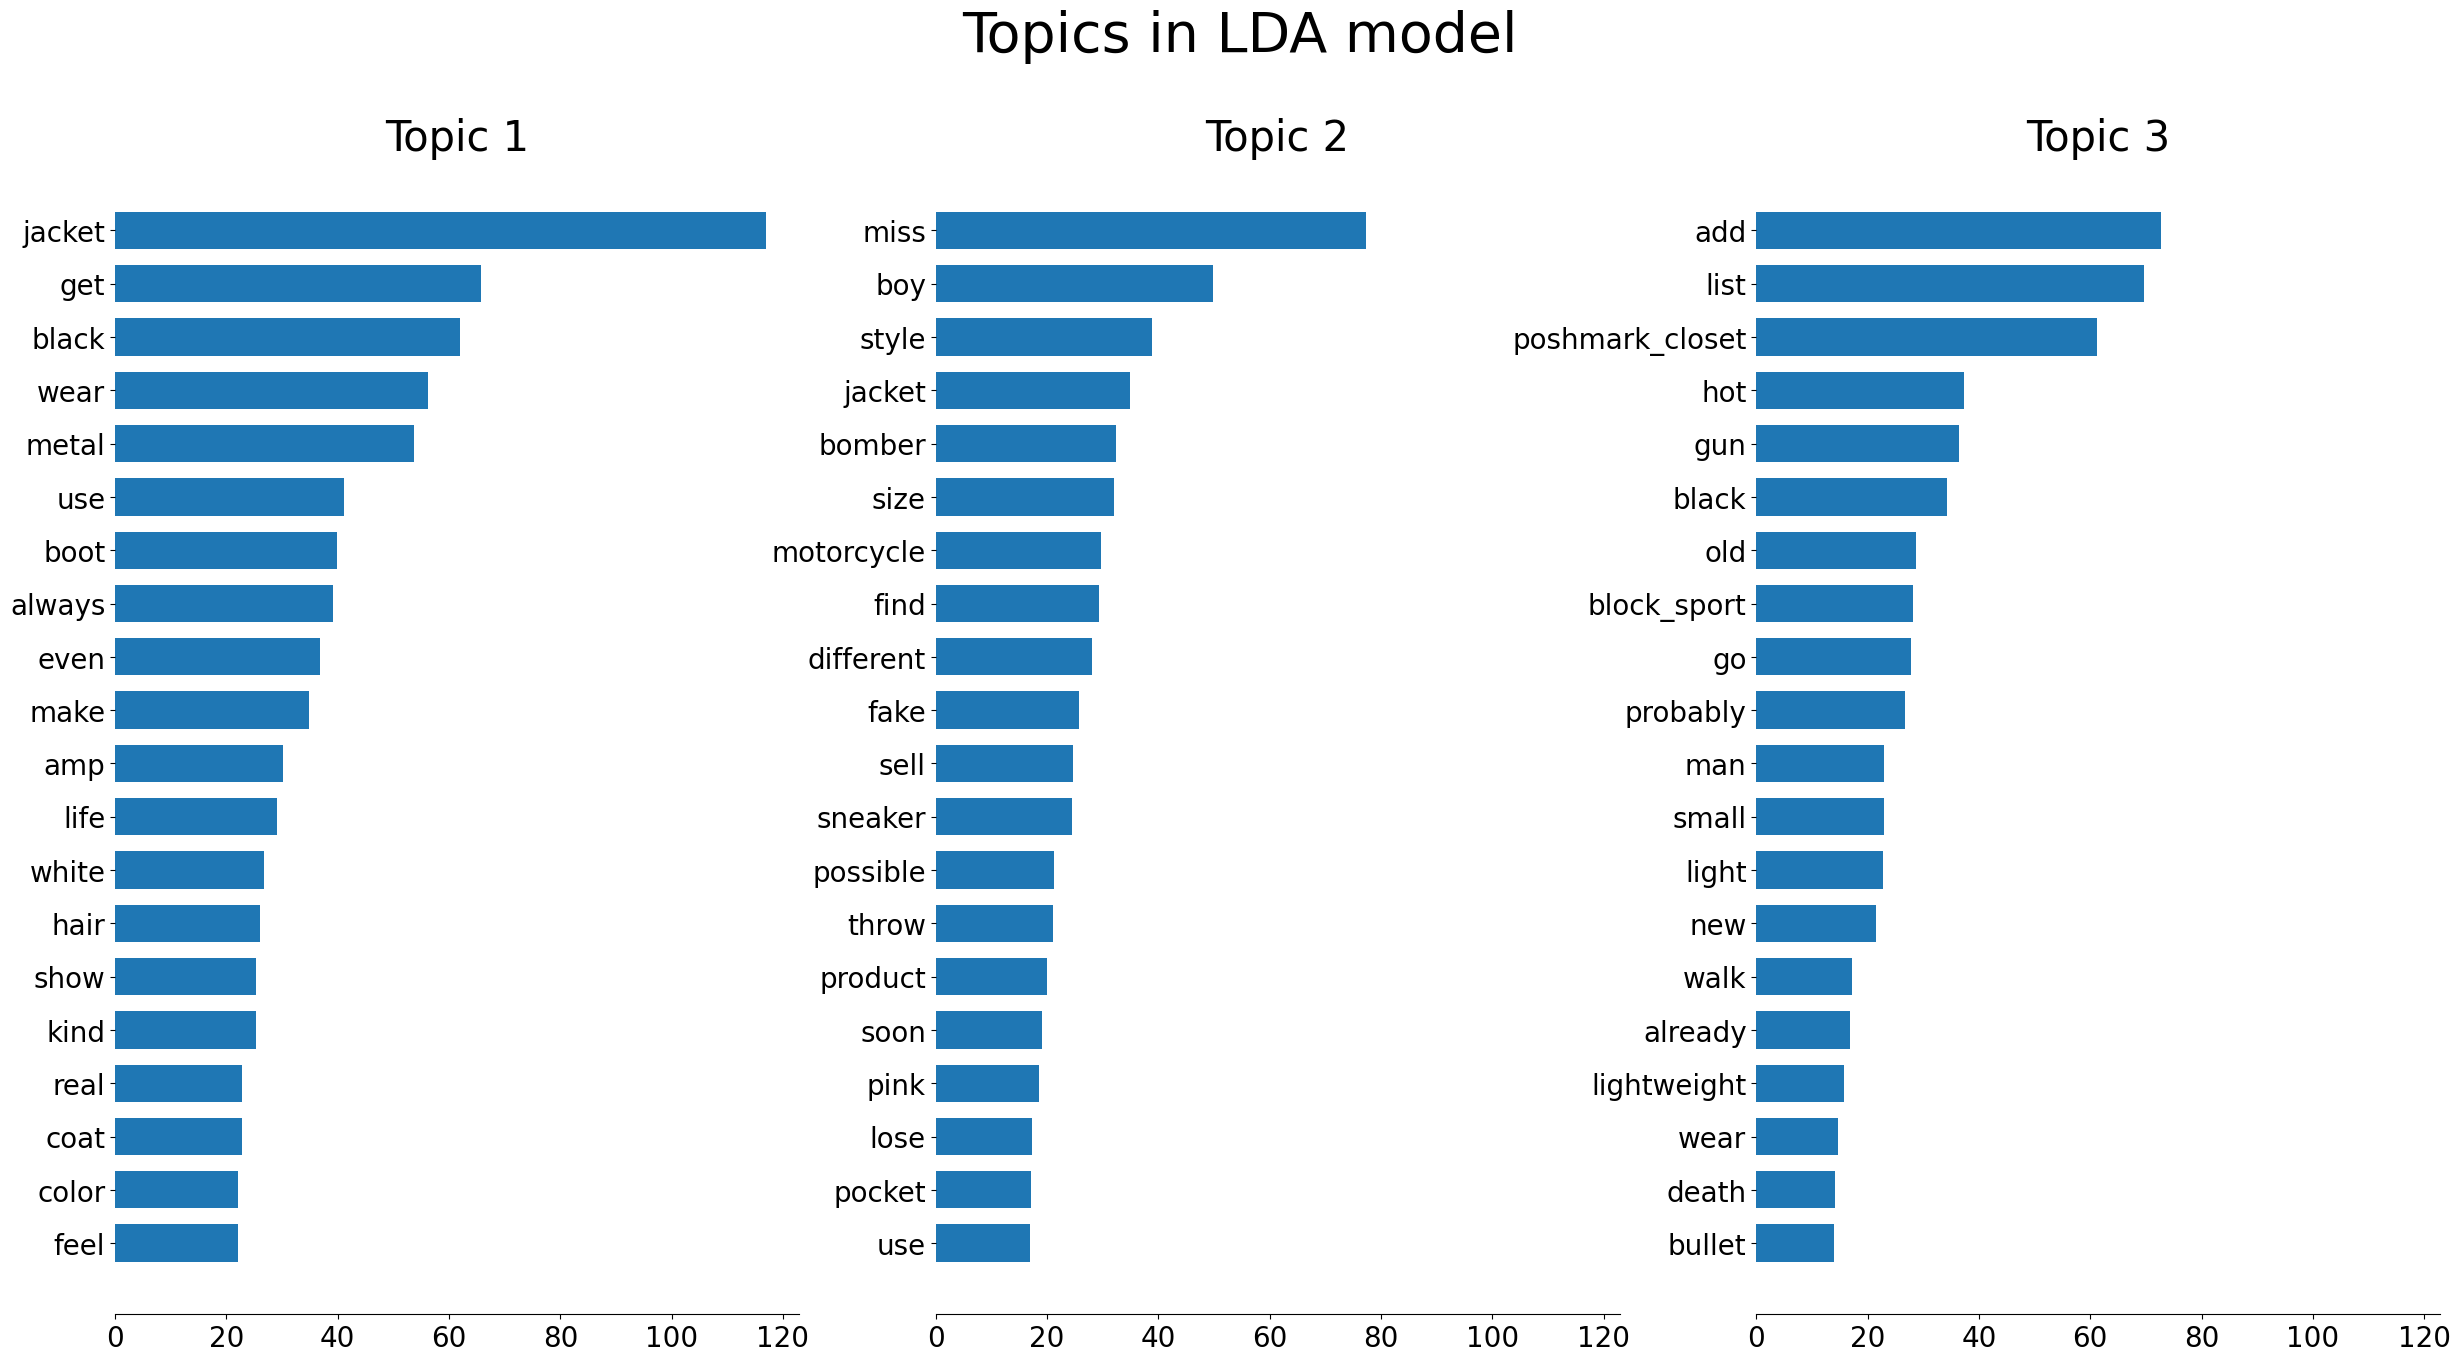

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

##### b. Find  popular keywords in negative

In [ ]:
# Find the most common words in negative tweets
negative = []
for txt in df6_j_neg[df6_j_neg ['sentiment']=='Negative']['cleaned_text'].tolist():
    for word in txt.split():
        negative.append(word)

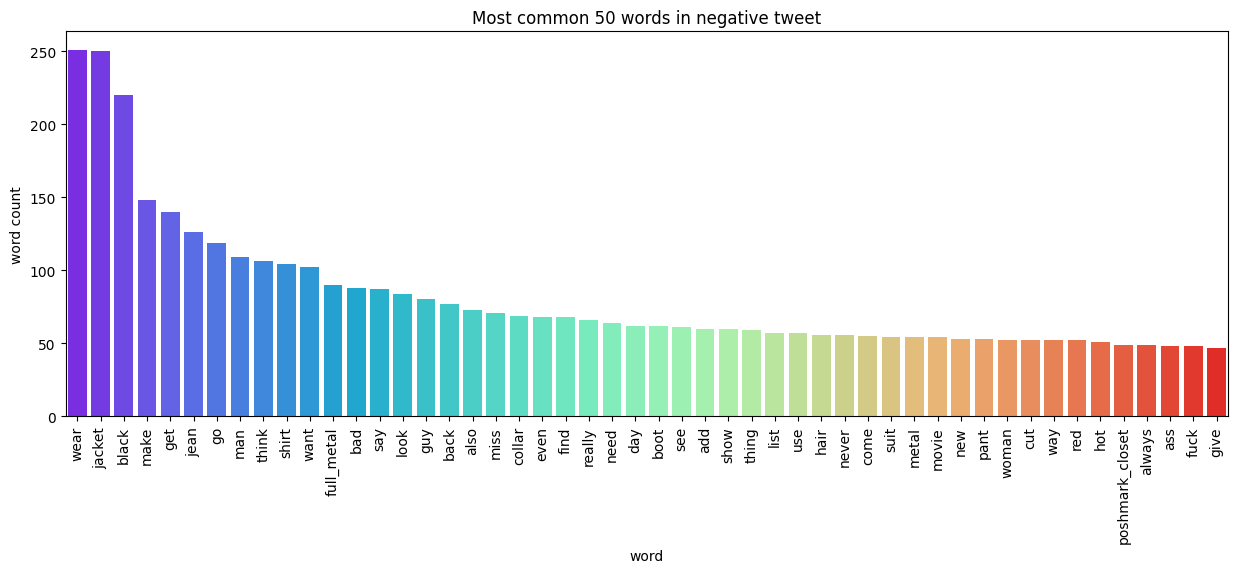

In [ ]:
# plot most 50 common words from negative tweets
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(negative).most_common(50))[0],y=pd.DataFrame(Counter(negative).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in negative tweet')
plt.xticks(rotation=90)
plt.show()

##### c. Negative keyword clustering
[Source](https://github.com/MarcusChong123/Text-Clustering-with-Python/blob/master/kmeans_clustering_tutorial2.py)

Run Elbow method to choose cluster number

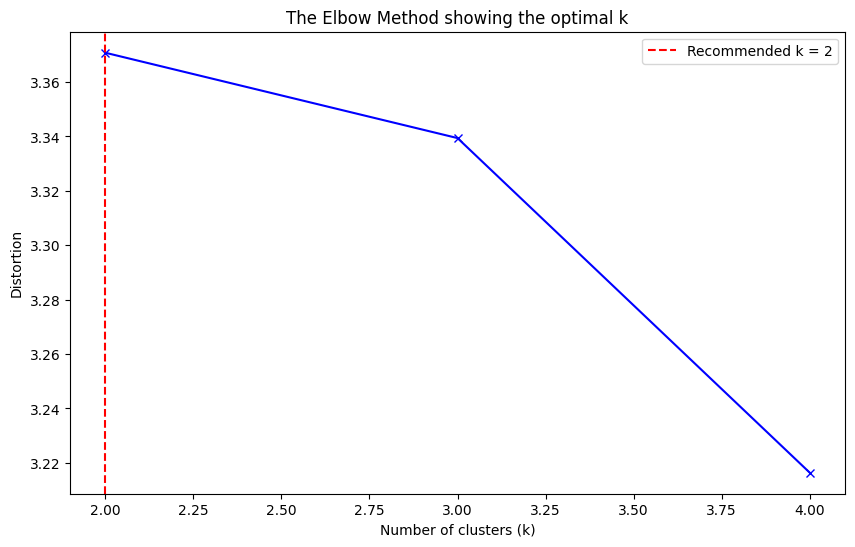

For n_clusters = 2, the average silhouette score is: 0.1369283423571685


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import numpy as np

# Step 1: Convert list-like structures to strings
df_encoded = df6_j_neg.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))

# Step 2: Convert object types to numerical using LabelEncoder
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Function to calculate the distortion for each k
def calculate_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(
            sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        )
    return distortions

# Step 4: Define range of k and calculate distortions
k_range = range(2, 5)
distortions = calculate_elbow_method(df_scaled, k_range)

# Step 5: Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Step 6: Find the optimal number of clusters (elbow point)
optimal_k = np.argmin(np.gradient(np.gradient(distortions))) + 2
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Recommended k = {optimal_k}')
plt.legend()
plt.show()

# Step 7: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


Check cluster quality using silhouette average
print('Average silhouette score:', visualizer.silhouette_score_)

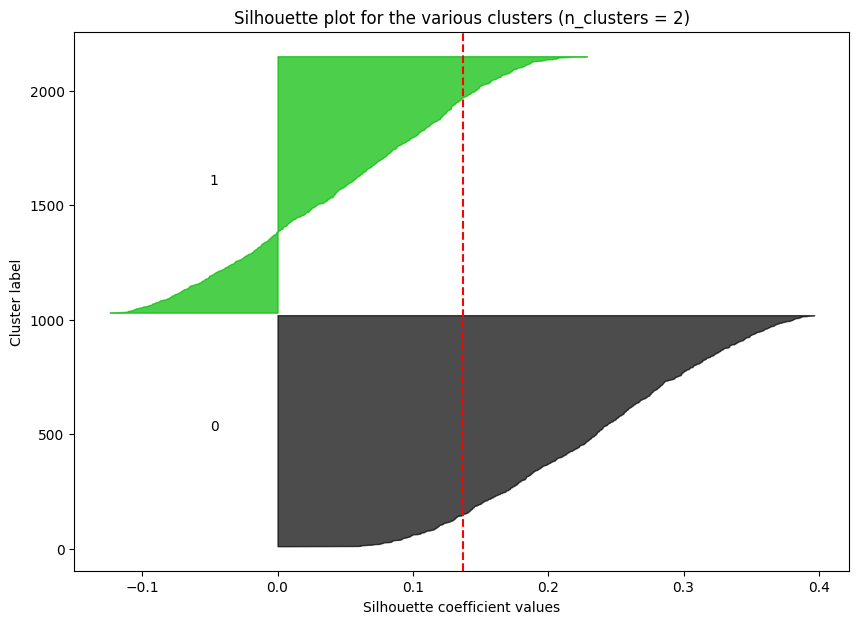

In [ ]:
# Step 8: Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'For n_clusters = {optimal_k}, the average silhouette score is: {silhouette_avg}')

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for the various clusters (n_clusters = {optimal_k})")
plt.show()

# Step 9: Convert the numerical columns back to the original object/text format
for column in label_encoders:
    le = label_encoders[column]
    df_encoded[column] = le.inverse_transform(df_encoded[column])

In [ ]:
#Cluster the words in neutral tweets to identify common themes and word groups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df6_j_neg['cleaned_text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df6_j_neg['cluster'] = model.labels_
df6_j_neg

text       Dates  \
11      agentp   her voice makes me want to rip my ow...  2023-06-29   
24     top gun usaaf tom cruise pete maverick flight ...  2023-06-29   
26      suburbanpolly  cpc hq  pierrepoilievre he for...  2023-06-29   
50     we are starting max payne    in cosplay today ...  2023-06-29   
51      nowplaying monsters       bish  fake metal ja...  2023-06-29   
...                                                  ...         ...   
32607   danishacarter  denim tears x virgil abloh jea...  2023-05-16   
32643  nah but san s whole outfit makes so much sense...  2023-05-16   
32649  nirvana tshirt black skinny jeans leather jack...  2023-05-16   
32703  i bought my baby brother an ice cream jean jac...  2023-05-16   
32790  this would be fire with a crimped half up half...  2023-05-15   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
11     23:43:32        3.0         0.0         0.0           0.0         209   
24     20:16:55        0.0         0.0         0.0           0.0         153   
26     19:33:08        3.0         0.0         0.0           0.0          97   
50     23:11:19        1.0         0.0         0.0           0.0         182   
51     23:10:59        0.0         0.0         0.0           0.0          75   
...         ...        ...         ...         ...           ...         ...   
32607  14:16:12        0.0         0.0         0.0           0.0         169   
32643  12:00:04        1.0         0.0         1.0           0.0         166   
32649  11:16:15        8.0         1.0         0.0           0.0         126   
32703  05:25:41        0.0         0.0         0.0           0.0         219   
32790  22:59:48        1.0         0.0         1.0           0.0         231   

       word_count  sent_count      hashtags       extracted_words  compound  \
11             48           3            []                jacket   -0.1779   
24             27           1            []  bomber,jacket,jacket   -0.1531   
26             15           1            []         bomber,jacket   -0.2732   
50             37           3            []                jacket   -0.2732   
51             14           1  [Nowplaying]                jacket   -0.4767   
...           ...         ...           ...                   ...       ...   
32607          31           1            []          jeans,jacket   -0.2263   
32643          36           1            []          jacket,jeans   -0.4588   
32649          20           1            []          jeans,jacket   -0.6742   
32703          51           1            []                jacket   -0.6590   
32790          50           1            []         jacket,jacket   -0.7096   

         pos    neu    neg sentiment  \
11     0.072  0.862  0.065  Negative   
24     0.069  0.840  0.092  Negative   
26     0.000  0.851  0.149  Negative   
50     0.067  0.836  0.097  Negative   
51     0.000  0.744  0.256  Negative   
...      ...    ...    ...       ...   
32607  0.000  0.921  0.079  Negative   
32643  0.000  0.886  0.114  Negative   
32649  0.000  0.774  0.226  Negative   
32703  0.051  0.790  0.160  Negative   
32790  0.000  0.869  0.131  Negative   

                                            cleaned_text  cluster  
11     agentp voice make want rip ear ill fitting sui...        1  
24     top gun usaaf pete maverick flight bomber air ...        1  
26                                 suburbanpolly manning        1  
50     start payne cosplay today come watch sweat ass...        1  
51             nowplaying monster bish_fake metal rlrcti        1  
...                                                  ...      ...  
32607    virgil spray paint coat gucci loafer balenciaga        1  
32643  whole outfit make much sense wear shoe boy get...        1  
32649                     converse ohhhh ass play tumblr        1  
32703  buy open cheese hella hard get trueeey moment ...        1  
32790  fire crimp half crimp ponytail wit jean d

In [ ]:
#print out 10 feature terms of each cluster

clusters = df6_j_neg.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['cleaned_text','neg','likeCount','replyCount','retweetCount']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 literally
 sweatpant
 wear
 dominatrix
 boring
 pick
 betray
 crazyyyy
 mifffydoll
 watch
------------
Cluster 1:
 wear
 jacket
 black
 make
 jean
 full_metal
 want
 bad
 man
 metal
------------


### 4.2 Analysis for the cash cow product: Men's jeans
As identified in Part 1, Men's jeans is a cash cow product in the BCG Matrix. To gain deeper insights into external discussions surrounding this product, we'll prioritise analysing tweets mentioning the term 'jeans.

#### 4.2.1 Data processing
Excluding all products, but men's jeans for focusing solely on tweets related to it.

In [ ]:
df6.dropna(subset=['extracted_words'], inplace=True)
df6

text       Dates  \
389    random twitter fascist guy in a suit  uh  this...  2023-06-29   
19894  what goes through someone is mind when they pa...  2023-06-19   
1203   when your mum is a artist so for your birthday...  2023-06-28   
16349  the thing about fashion is you do not need muc...  2023-06-26   
11628  the superior ac dc shirt and black leather jac...  2023-06-15   
...                                                  ...         ...   
6091   check out this listing i just added to my  pos...  2023-06-22   
6092    ukmtb chat i must say though  their waterproo...  2023-06-22   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
389    14:09:42    34792.0        30.0        31.0        3493.0         282   
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
1203   13:30:22    12869.0        66.0        76.0        1418.0         142   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
11628  17:26:57     3927.0       103.0         2.0         656.0         102   
...         ...        ...         ...         ...           ...         ...   
6091   18:04:21        0.0         0.0         0.0           0.0         191   
6092   18:03:05        0.0         0.0         0.0           0.0         162   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   

       word_count  sent_count                  hashtags extracted_words  \
389            68           1                        []          jacket   
19894          60           2                        []           jeans   
1203           27           1                        []          jacket   
16349          57           2                        []           jeans   
11628          16           1                        []          jacket   
...           ...         ...                       ...             ...   
6091           36           1  [Poshmark, shopmycloset]          jacket   
6092           32           1                        []          jacket   
17568          12           1                        []           jeans   
17566          17           1                        []           jeans   
17565          40           2  [Poshmark, shopmycloset]           jeans   

       compound    pos    neu    neg sentiment  
389     -0.6808  0.046  0.824  0.130  Negative  
19894   -0.2732  0.078  0.821  0.102  Negative  
1203     0.0000  0.000  1.000  0.000   Neutral  
16349    0.6908  0.120  0.880  0.000  Positive  
11628    0.5423  0.189  0.811  0.000  Positive  
...         ...    ...    ...    ...       ...  
6091     0.0000  0.000  1.000  0.000   Neutral  
6092     0.4404  0.097  0.903  0.000  Positive  
17568    0.0000  0.000  1.000  0.000   Neutral  
17566   -0.2023  0.137  0.686  0.176  Negative  
17565    0.0000  0.000  1.000  0.000   Neutral  

[18955 rows x 17 columns]

In [ ]:
#keep tweets are labeled jacket
df6_jean = df6[df6['extracted_words'].str.contains('jeans')]
df6_jean

text       Dates  \
19894  what goes through someone is mind when they pa...  2023-06-19   
16349  the thing about fashion is you do not need muc...  2023-06-26   
32339  what is something over priced and basic    i w...  2023-05-17   
29856  he actually matched the shirt well  with basic...  2023-05-26   
32160  louis wore a tommy jeans x aries logo destroye...  2023-05-18   
...                                                  ...         ...   
17577  the material    it looks like made out of leat...  2023-06-24   
17571   madscientistff your mom sews patches for the ...  2023-06-24   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
32339  14:46:07     3917.0       156.0       170.0         266.0          78   
29856  09:36:58     3030.0        12.0         7.0         154.0          77   
32160  05:18:35     2728.0       267.0        16.0         341.0         303   
...         ...        ...         ...         ...           ...         ...   
17577  18:23:18        0.0         0.0         0.0           0.0         119   
17571  18:55:43        0.0         0.0         0.0           0.0         293   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17566  19:44:05        0.0         0.0         0.0           0.0          77   
17565  19:46:07        0.0         0.0         0.0           0.0         189   

       word_count  sent_count                  hashtags extracted_words  \
19894          60           2                        []           jeans   
16349          57           2                        []           jeans   
32339          19           1                        []           jeans   
29856          14           1                        []           jeans   
32160          51           3                        []           jeans   
...           ...         ...                       ...             ...   
17577          26           3                        []           jeans   
17571          58           3                        []           jeans   
17568          12           1                        []           jeans   
17566          17           1                        []           jeans   
17565          40           2  [Poshmark, shopmycloset]           jeans   

       compound    pos    neu    neg sentiment  
19894   -0.2732  0.078  0.821  0.102  Negative  
16349    0.6908  0.120  0.880  0.000  Positive  
32339    0.0000  0.000  1.000  0.000   Neutral  
29856    0.2732  0.149  0.851  0.000  Positive  
32160    0.2023  0.100  0.837  0.064  Positive  
...         ...    ...    ...    ...       ...  
17577    0.3612  0.122  0.878  0.000  Positive  
17571    0.0000  0.000  1.000  0.000   Neutral  
17568    0.0000  0.000  1.000  0.000   Neutral  
17566   -0.2023  0.137  0.686  0.176  Negative  
17565    0.0000  0.000  1.000  0.000   Neutral  

[6708 rows x 17 columns]

#### 4.2.2 Analysis nuetral words
a. Create neutral sentiment word clouds<br/>
b. Finding high-frequency neutral words<br/>
c. Text clustering for neutral words<br/>

##### a. Generate word clouds word cloud for neutral tweets

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df6_jean_neu = df6_jean.drop(df6_jean[df6_jean['sentiment'] != 'Neutral'].index)
df6_jean_neu

text       Dates  \
32339  what is something over priced and basic    i w...  2023-05-17   
31698  it is not that a sport coat cannot be made fro...  2023-05-19   
31300  taehyung in black skinny and leather jeans    ...  2023-05-21   
22666  few people know  but the tiny pocket on jeans ...  2023-06-13   
31619    foot something with the skinny jeans https  ...  2023-05-20   
...                                                  ...         ...   
17616  check out topshop boutique women s jeans size ...  2023-06-24   
17615  check out wrangler men s jeans waist   in insi...  2023-06-24   
17571   madscientistff your mom sews patches for the ...  2023-06-24   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
32339  14:46:07     3917.0       156.0       170.0         266.0          78   
31698  19:02:56     1316.0         1.0         9.0           5.0         257   
31300  04:42:13      949.0         3.0         2.0         136.0          71   
22666  11:11:00      879.0         4.0         4.0         103.0         148   
31619  01:08:14      860.0         4.0         8.0         106.0          62   
...         ...        ...         ...         ...           ...         ...   
17616  16:58:52        0.0         0.0         0.0           0.0         131   
17615  16:59:29        0.0         0.0         0.0           0.0         133   
17571  18:55:43        0.0         0.0         0.0           0.0         293   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17565  19:46:07        0.0         0.0         0.0           0.0         189   

       word_count  sent_count                  hashtags extracted_words  \
32339          19           1                        []           jeans   
31698          66           2                        []           jeans   
31300          11           1                        []           jeans   
22666          31           1                        []           jeans   
31619          10           1                        []           jeans   
...           ...         ...                       ...             ...   
17616          24           1                    [eBay]           jeans   
17615          24           1                    [eBay]           jeans   
17571          58           3                        []           jeans   
17568          12           1                        []           jeans   
17565          40           2  [Poshmark, shopmycloset]           jeans   

       compound  pos  neu  neg sentiment  
32339       0.0  0.0  1.0  0.0   Neutral  
31698       0.0  0.0  1.0  0.0   Neutral  
31300       0.0  0.0  1.0  0.0   Neutral  
22666       0.0  0.0  1.0  0.0   Neutral  
31619       0.0  0.0  1.0  0.0   Neutral  
...         ...  ...  ...  ...       ...  
17616       0.0  0.0  1.0  0.0   Neutral  
17615       0.0  0.0  1.0  0.0   Neutral  
17571       0.0  0.0  1.0  0.0   Neutral  
17568       0.0  0.0  1.0  0.0   Neutral  
17565       0.0  0.0  1.0  0.0   Neutral  

[2371 rows x 17 columns]

In [ ]:
words = df6_jean_neu['text'].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['jeans','jean','add','women','check','shopmycloset_poshmarkapp','shopmycloset_poshmarkapp','poshmark_closet','get','List','list','add','poshmark_closet','https','co','shopmycloset_poshmarkapp','ebay_uk','say','go','put','get','dress','make','leave','want','also','come','leave','want','skinny','leather'] ) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df6_jean_neu['cleaned_text'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df6_jean_neu['cleaned_text'])

k = 3 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
list,add,poshmark_closet,size,pocket,shopmycloset_poshmarkapp,cotton,blue,stretch,women,man,black,vintage,high_rise,dark_wash,pant,men,short,crop,ankle,cotton_blend,embroider,bootcut,new,mankind,ebay_uk,wide_leg,lightweight,high_waist,slim,organic_cotton,find,sz,cotton_spandex,waist,classic,wrangl,gym_wear,mom,mid_rise,front_pocket,levi,wash,poshmark,ebay,flare,calvin_klein,boyfriend,light_wash,front

Topic#  2
pocket,rip,jacket,black,basic,keep,boot,inside,get,wear,need,new,belt,shirt,blue,see,find,think,pant,long,go,phone,tight,know,buy,back,even,back_pocket,short,wash,never,say,year,last,brown,tag,purple,wool,day,summer,white,hair,outfit,trouser,hold,clothe,cotton,call,use,change

Topic#  3
patch,wear,pocket,rip,pair,pant,cotton,shirt,fashion,make,jacket,big,girl,work,old,look,cargo,little,man,back_pocket,style,guess,crop,start,fade,still,leg,boy,kid,black,embroider,bag,right,way,shoe,use,take,jackets_sweatshirt,denim_bag,thigh,small,try,patch_applicae,mini_patche,actually

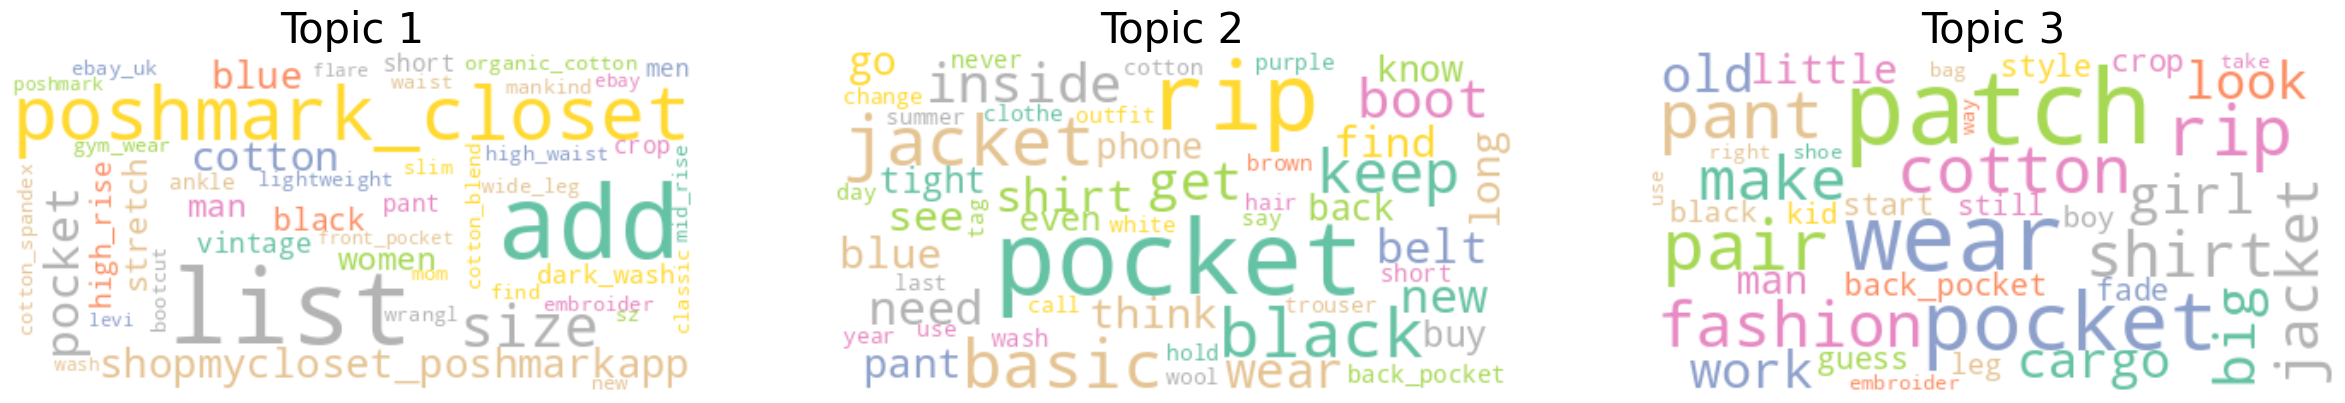

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()


wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')


fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

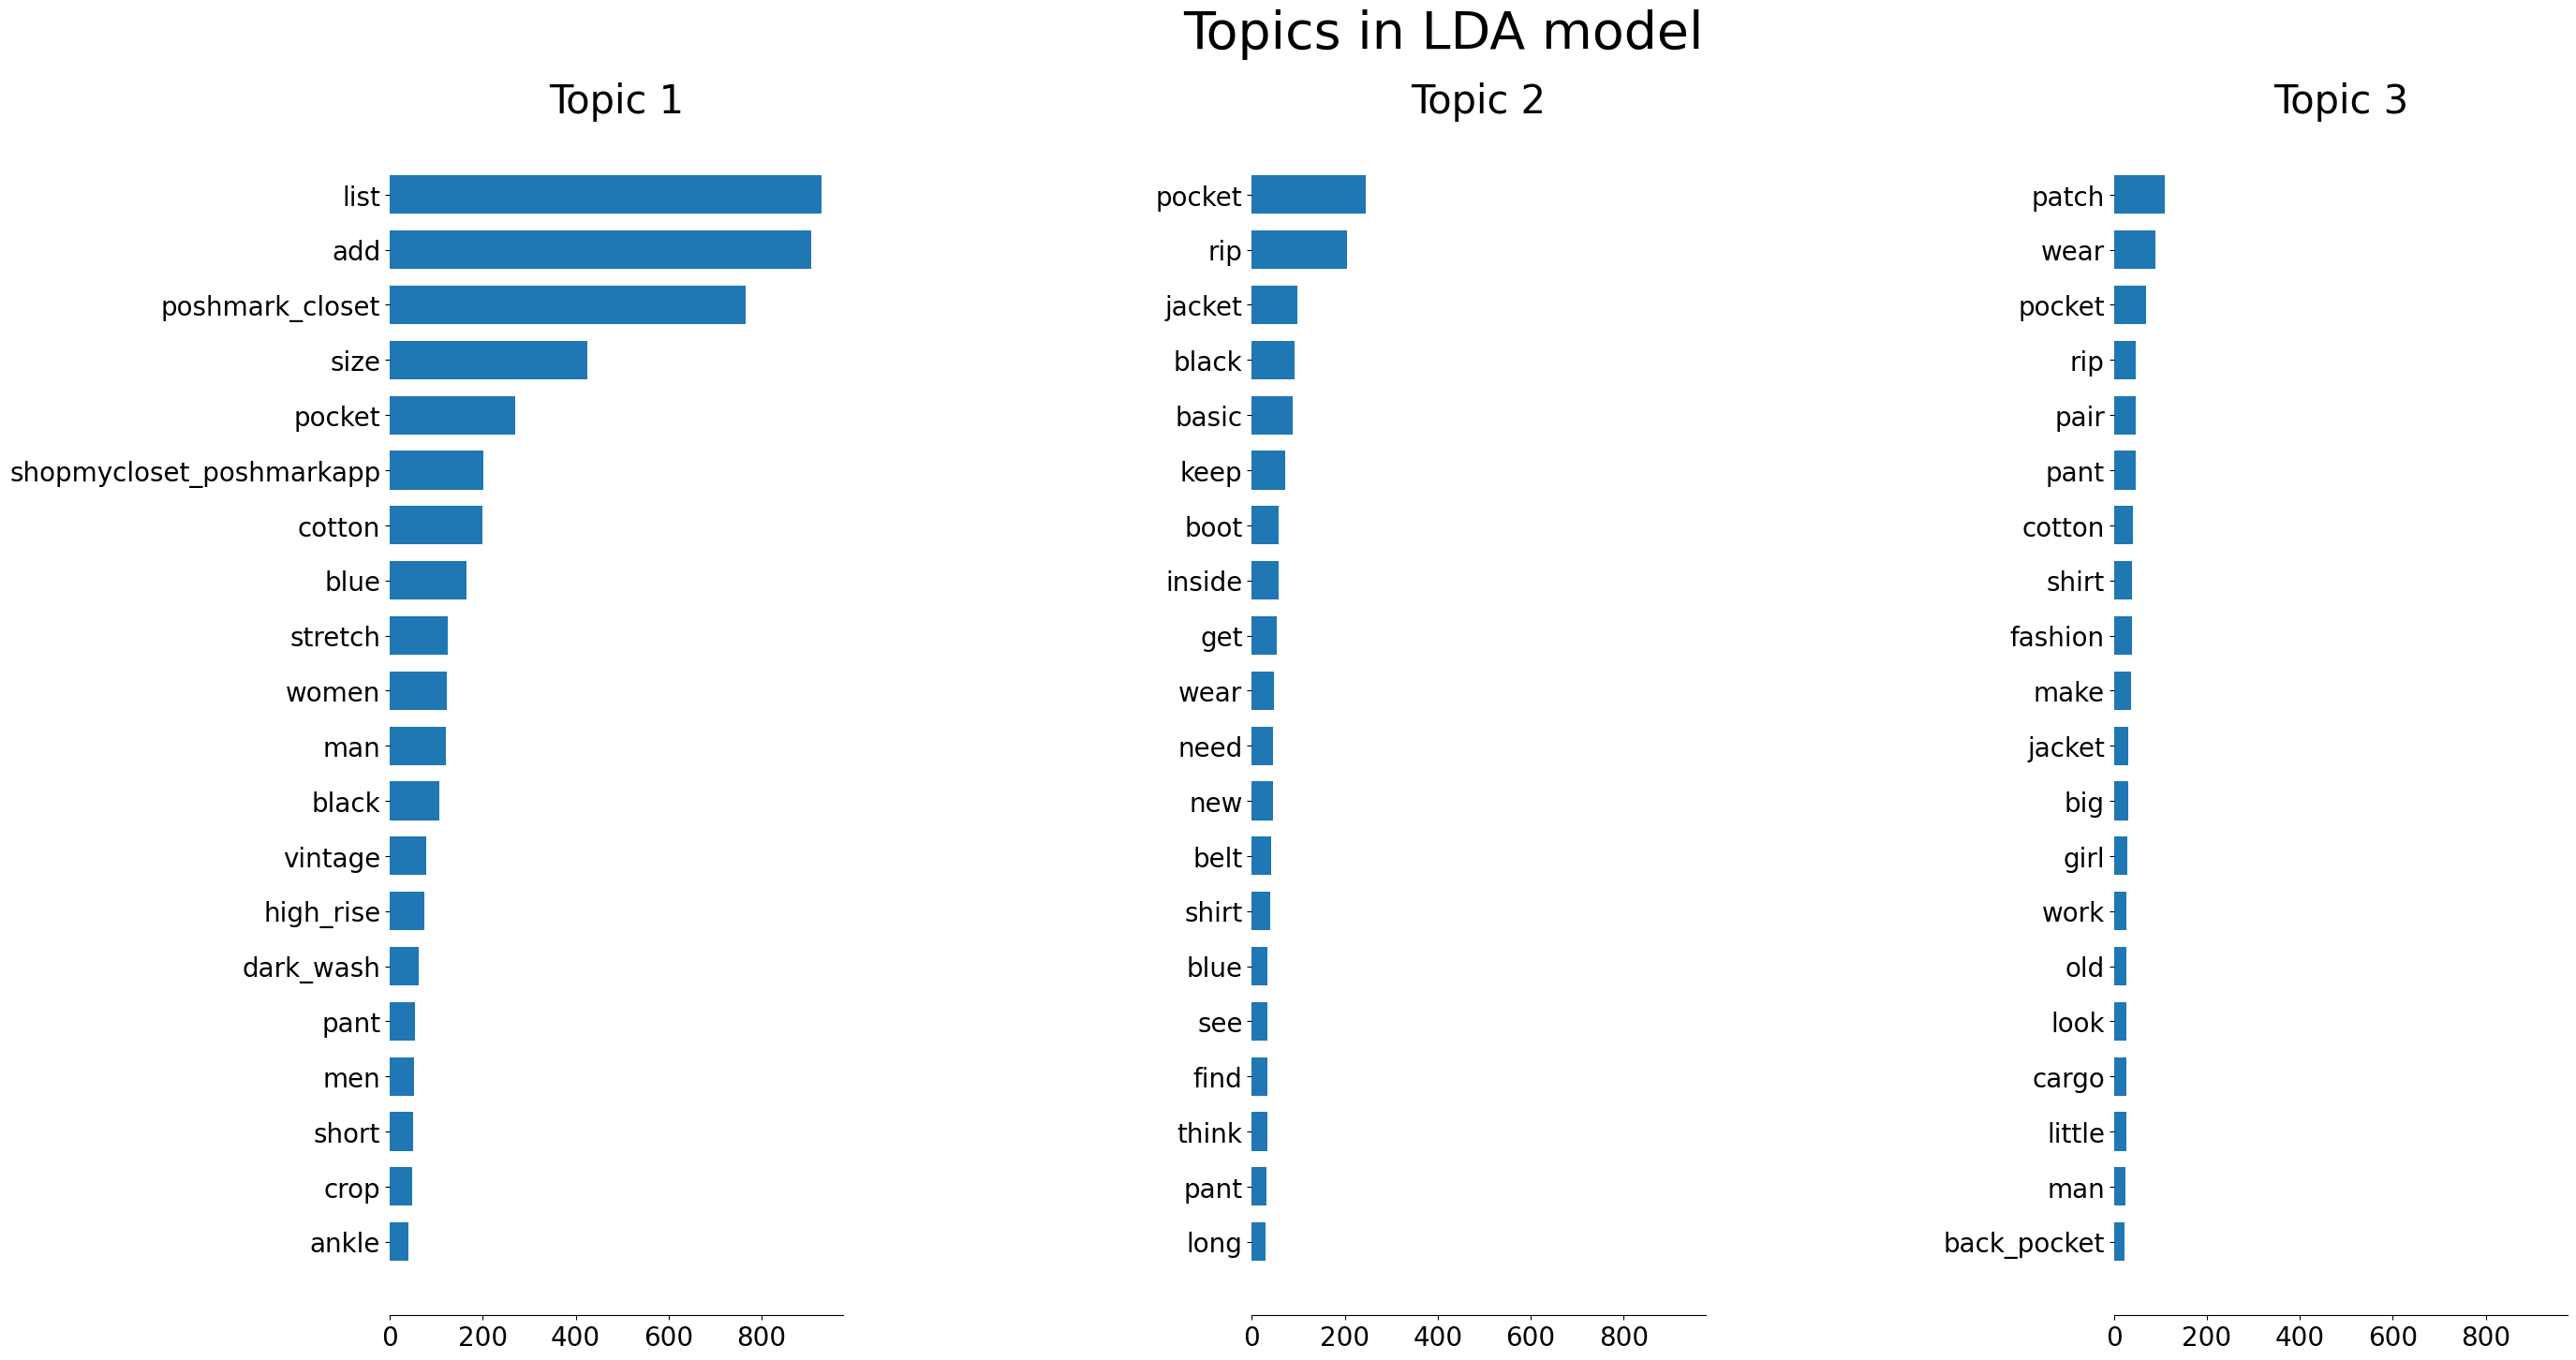

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

##### b. Find  popular keywords in neutral

In [ ]:
# Find the most common words in neutral tweets
neutral = []
for txt in df6_jean_neu[df6_jean_neu ['sentiment']=='Neutral']['cleaned_text'].tolist():
    for word in txt.split():
        neutral.append(word)

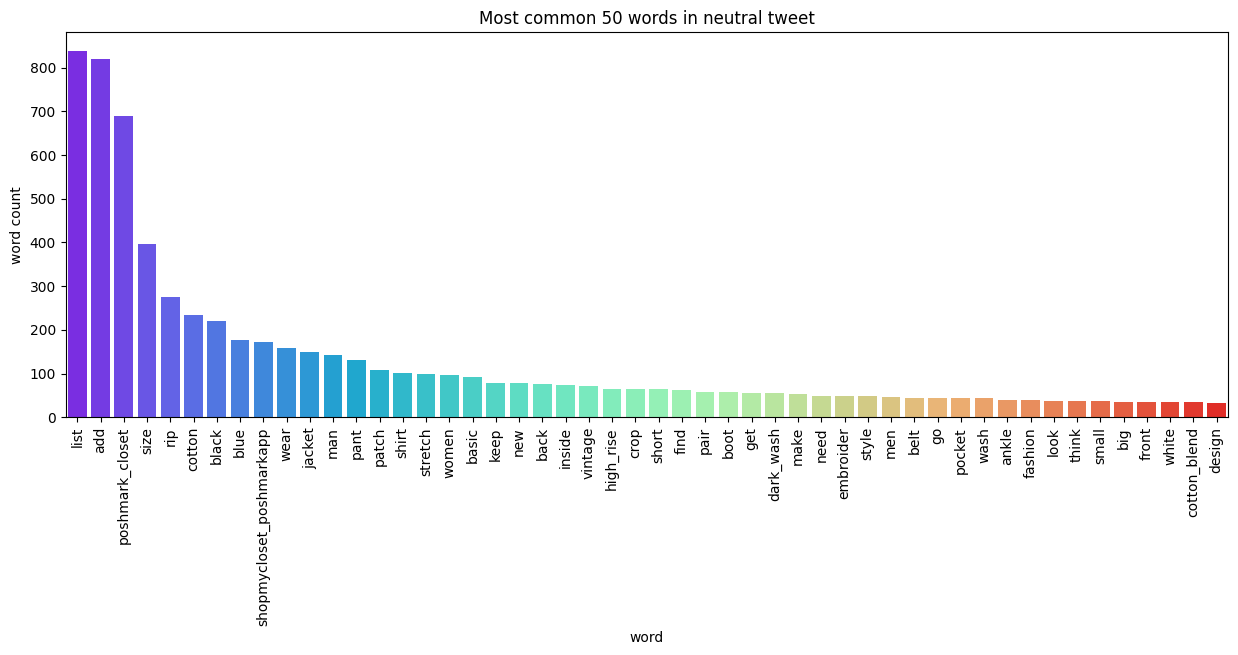

In [ ]:
# plot most 50 common words from neutral tweets
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(neutral).most_common(50))[0],y=pd.DataFrame(Counter(neutral).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in neutral tweet')
plt.xticks(rotation=90)
plt.show()

##### c. Neutral keyword clustering
[Source](https://github.com/MarcusChong123/Text-Clustering-with-Python/blob/master/kmeans_clustering_tutorial2.py)

Run Elbow method to choose cluster number

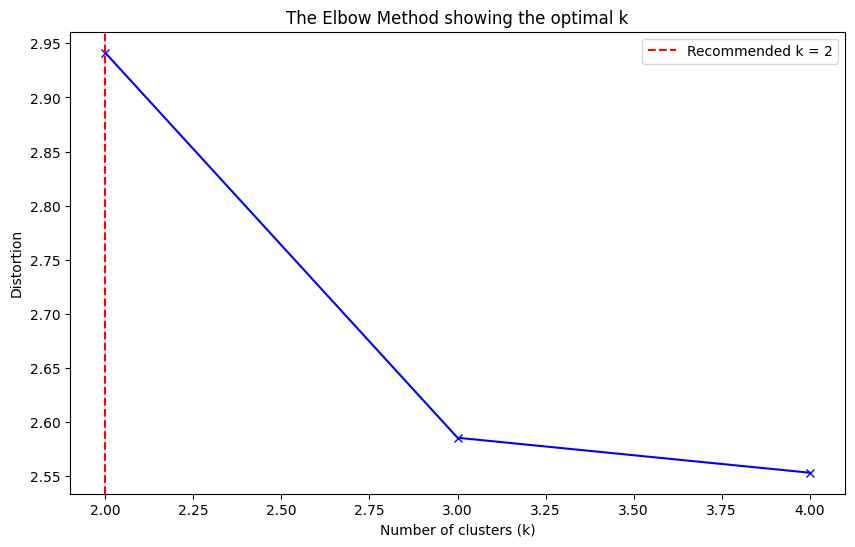

For n_clusters = 2, the average silhouette score is: 0.6619636100209187


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import numpy as np

# Step 1: Convert list-like structures to strings
df_encoded = df6_jean_neu.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))

# Step 2: Convert object types to numerical using LabelEncoder
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Function to calculate the distortion for each k
def calculate_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(
            sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        )
    return distortions

# Step 4: Define range of k and calculate distortions
k_range = range(2, 5)
distortions = calculate_elbow_method(df_scaled, k_range)

# Step 5: Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Step 6: Find the optimal number of clusters (elbow point)
optimal_k = np.argmin(np.gradient(np.gradient(distortions))) + 2
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Recommended k = {optimal_k}')
plt.legend()
plt.show()

# Step 7: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


Check cluster quality using silhouette average
print('Average silhouette score:', visualizer.silhouette_score_)

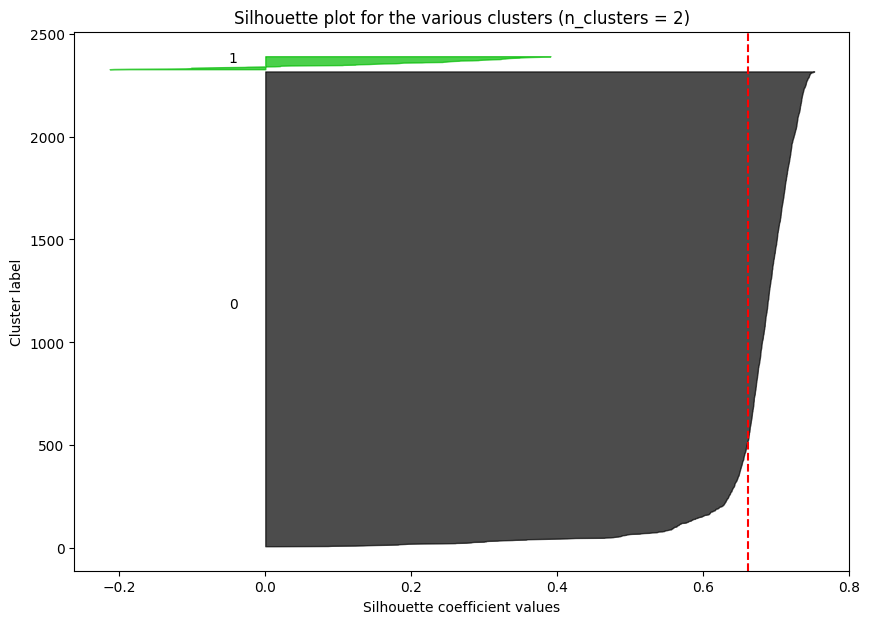

In [ ]:
# Step 8: Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'For n_clusters = {optimal_k}, the average silhouette score is: {silhouette_avg}')

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for the various clusters (n_clusters = {optimal_k})")
plt.show()

# Step 9: Convert the numerical columns back to the original object/text format
for column in label_encoders:
    le = label_encoders[column]
    df_encoded[column] = le.inverse_transform(df_encoded[column])

In [ ]:
#Cluster the words in neutral tweets to identify common themes and word groups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df6_jean_neu['cleaned_text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df6_jean_neu['cluster'] = model.labels_
df6_jean_neu

text       Dates  \
32339  what is something over priced and basic    i w...  2023-05-17   
31698  it is not that a sport coat cannot be made fro...  2023-05-19   
31300  taehyung in black skinny and leather jeans    ...  2023-05-21   
22666  few people know  but the tiny pocket on jeans ...  2023-06-13   
31619    foot something with the skinny jeans https  ...  2023-05-20   
...                                                  ...         ...   
17616  check out topshop boutique women s jeans size ...  2023-06-24   
17615  check out wrangler men s jeans waist   in insi...  2023-06-24   
17571   madscientistff your mom sews patches for the ...  2023-06-24   
17568  so you can keep me inside the pocket of your r...  2023-06-24   
17565  check out this listing i just added to my  pos...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
32339  14:46:07     3917.0       156.0       170.0         266.0          78   
31698  19:02:56     1316.0         1.0         9.0           5.0         257   
31300  04:42:13      949.0         3.0         2.0         136.0          71   
22666  11:11:00      879.0         4.0         4.0         103.0         148   
31619  01:08:14      860.0         4.0         8.0         106.0          62   
...         ...        ...         ...         ...           ...         ...   
17616  16:58:52        0.0         0.0         0.0           0.0         131   
17615  16:59:29        0.0         0.0         0.0           0.0         133   
17571  18:55:43        0.0         0.0         0.0           0.0         293   
17568  19:31:58        0.0         0.0         0.0           0.0          57   
17565  19:46:07        0.0         0.0         0.0           0.0         189   

       word_count  sent_count                  hashtags extracted_words  \
32339          19           1                        []           jeans   
31698          66           2                        []           jeans   
31300          11           1                        []           jeans   
22666          31           1                        []           jeans   
31619          10           1                        []           jeans   
...           ...         ...                       ...             ...   
17616          24           1                    [eBay]           jeans   
17615          24           1                    [eBay]           jeans   
17571          58           3                        []           jeans   
17568          12           1                        []           jeans   
17565          40           2  [Poshmark, shopmycloset]           jeans   

       compound  pos  neu  neg sentiment  \
32339       0.0  0.0  1.0  0.0   Neutral   
31698       0.0  0.0  1.0  0.0   Neutral   
31300       0.0  0.0  1.0  0.0   Neutral   
22666       0.0  0.0  1.0  0.0   Neutral   
31619       0.0  0.0  1.0  0.0   Neutral   
...         ...  ...  ...  ...       ...   
17616       0.0  0.0  1.0  0.0   Neutral   
17615       0.0  0.0  1.0  0.0   Neutral   
17571       0.0  0.0  1.0  0.0   Neutral   
17568       0.0  0.0  1.0  0.0   Neutral   
17565       0.0  0.0  1.0  0.0   Neutral   

                                            cleaned_text  cluster  
32339                      price basic first skim purple        0  
31698  sport coat make smooth fabric flap pocket many...        0  
31300                                       black ciskfp        0  
22666  people tiny small photo faramir big front boro...        0  
31619                                        foot qieyvv        0  
...                                                  ...      ...  
17616  size blue_denim paint cotton designer nko ebay_uk        0  
17615                 wrangl man waist noiy shee ebay_uk        0  
17571  madscientistff mom sew patch knee pant mom nev...        0  
17568                                    keep inside rip        1  
17565         list add poshmark_closet black sho

In [ ]:
#print out 10 feature terms of each cluster
clusters = df6_jean_neu.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['cleaned_text','compound','likeCount','replyCount','retweetCount']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 list
 add
 poshmark_closet
 size
 black
 cotton
 blue
 shopmycloset_poshmarkapp
 man
 jacket
------------
Cluster 1:
 rip
 inside
 hold
 pair
 eyes_meet
 close
 closer_till
 today
 need
 wxclyzqpcz
------------


#### 4.2.3 Analysis positive words
a. Create positive sentiment word clouds<br/>
b. Finding high-frequency positive words<br/>
c. Text clustering for positive words<br/>

##### a. Generate word clouds word cloud for positive tweets

In [ ]:
df6_jean_pos = df6_jean.drop(df6_jean[df6_jean['sentiment'] != 'Positive'].index)
df6_jean_pos

text       Dates  \
16349  the thing about fashion is you do not need muc...  2023-06-26   
29856  he actually matched the shirt well  with basic...  2023-05-26   
32160  louis wore a tommy jeans x aries logo destroye...  2023-05-18   
25959   jeno on  ferragamo instagram post  ecru shirt...  2023-06-06   
17747  rachel sennott wearing the dion lee fw   leath...  2023-06-24   
...                                                  ...         ...   
17610  check out this listing i just added to my  pos...  2023-06-24   
17617  check out colin s bigman men s jeans size w   ...  2023-06-24   
17583  check out this listing i just added to my  pos...  2023-06-24   
17580  check out this listing i just added to my  pos...  2023-06-24   
17577  the material    it looks like made out of leat...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
29856  09:36:58     3030.0        12.0         7.0         154.0          77   
32160  05:18:35     2728.0       267.0        16.0         341.0         303   
25959  12:05:11     1155.0         6.0         2.0         314.0         305   
17747  10:28:08      795.0         5.0         2.0          21.0         178   
...         ...        ...         ...         ...           ...         ...   
17610  17:16:03        0.0         0.0         0.0           0.0         174   
17617  16:58:29        0.0         0.0         0.0           0.0         127   
17583  17:51:01        0.0         0.0         0.0           0.0         192   
17580  18:05:27        0.0         0.0         0.0           0.0         190   
17577  18:23:18        0.0         0.0         0.0           0.0         119   

       word_count  sent_count                               hashtags  \
16349          57           2                                     []   
29856          14           1                                     []   
32160          51           3                                     []   
25959          57           3  [JENO, FERRAGAMOPF23, JENOxFERRAGAMO]   
17747          37           1                                     []   
...           ...         ...                                    ...   
17610          30           1               [Poshmark, shopmycloset]   
17617          28           1                                 [eBay]   
17583          33           1               [Poshmark, shopmycloset]   
17580          35           2               [Poshmark, shopmycloset]   
17577          26           3                                     []   

      extracted_words  compound    pos    neu    neg sentiment  
16349           jeans    0.6908  0.120  0.880  0.000  Positive  
29856           jeans    0.2732  0.149  0.851  0.000  Positive  
32160           jeans    0.2023  0.100  0.837  0.064  Positive  
25959           jeans    0.5719  0.108  0.892  0.000  Positive  
17747           jeans    0.2023  0.053  0.947  0.000  Positive  
...               ...       ...    ...    ...    ...       ...  
17610           jeans    0.2263  0.073  0.927  0.000  Positive  
17617           jeans    0.6124  0.227  0.773  0.000  Positive  
17583           jeans    0.6369  0.144  0.856  0.000  Positive  
17580           jeans    0.4215  0.094  0.906  0.000  Positive  
17577           jeans    0.3612  0.122  0.878  0.000  Positive  

[2983 rows x 17 columns]

In [ ]:
words = df6_jean_pos['text'].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['jean','https','Jean','check','add','list','poshmark_closet','woman','https','ebay_uk','co','poshmark_closet','pocket','shopmycloset_poshmarkapp','new','wear','get','go','make','leather','look','fit','love','good','pair','want','see','keep','know','women']) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df6_jean_pos['cleaned_text'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df6_jean_pos['cleaned_text'])

k = 3 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
jean,rip,patch,pant,phone,ripped_jean,jacket,say,day,ever,hold,hand,try,cute,use,favorite,never,old,go,come,back,look,make,also,time,red,heart,cool,clothe,year,think,happy,sneaker,boy,color,thing,buy,girl,stuff,pretty,work,fit,outfit,let,see,fun,cut,teach,front,eye

Topic#  2
jean,add,list,poshmark_closet,size,man,cotton,shopmycloset_poshmarkapp,blue,belt,men,black,stretch,straight,ebay_uk,casual,pant,slim,vintage,dark_wash,rip,skinny,classic,women,pocket,wash,style,high_rise,regular,cotton_comfort,miss,comfort,leg,relaxed,watch,crop,girl,waist,buckle,levi,designer,short,original,high_waist,solid,sure,sz,brand,ankle,detail

Topic#  3
jean,shirt,black,wear,basic,jacket,top,dress,boot,get,well,need,cotton,back,fashion,short,shoe,put,buy,make,style,long,go,find,think,people,way,big,right,thing,blue,look,outfit,clothe,take,man,even,little,time,pull,pant,summer,nice,tight,great,also,casual,feel,still,guy



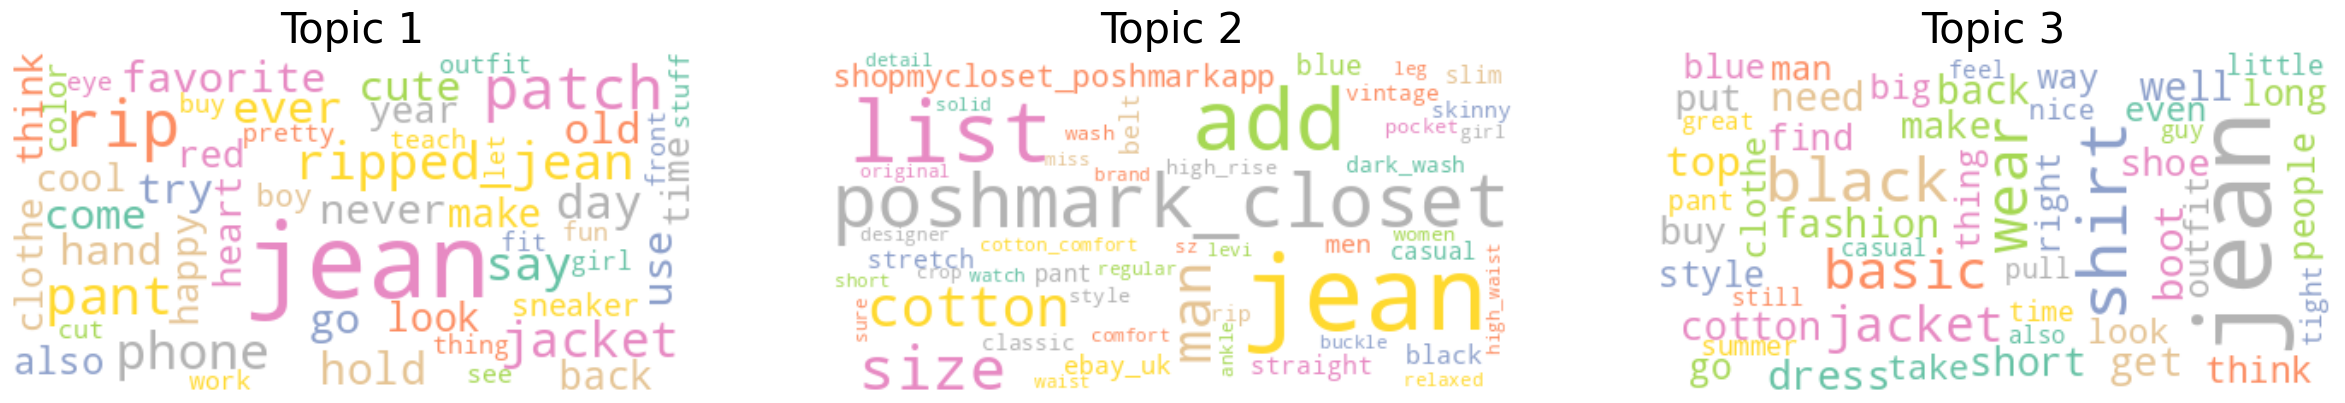

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()
#stop_words = ['http_co','check_list','ad_poshmark','jacket','closet','check','add','leather','jean','start','buy']

wcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')


fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")


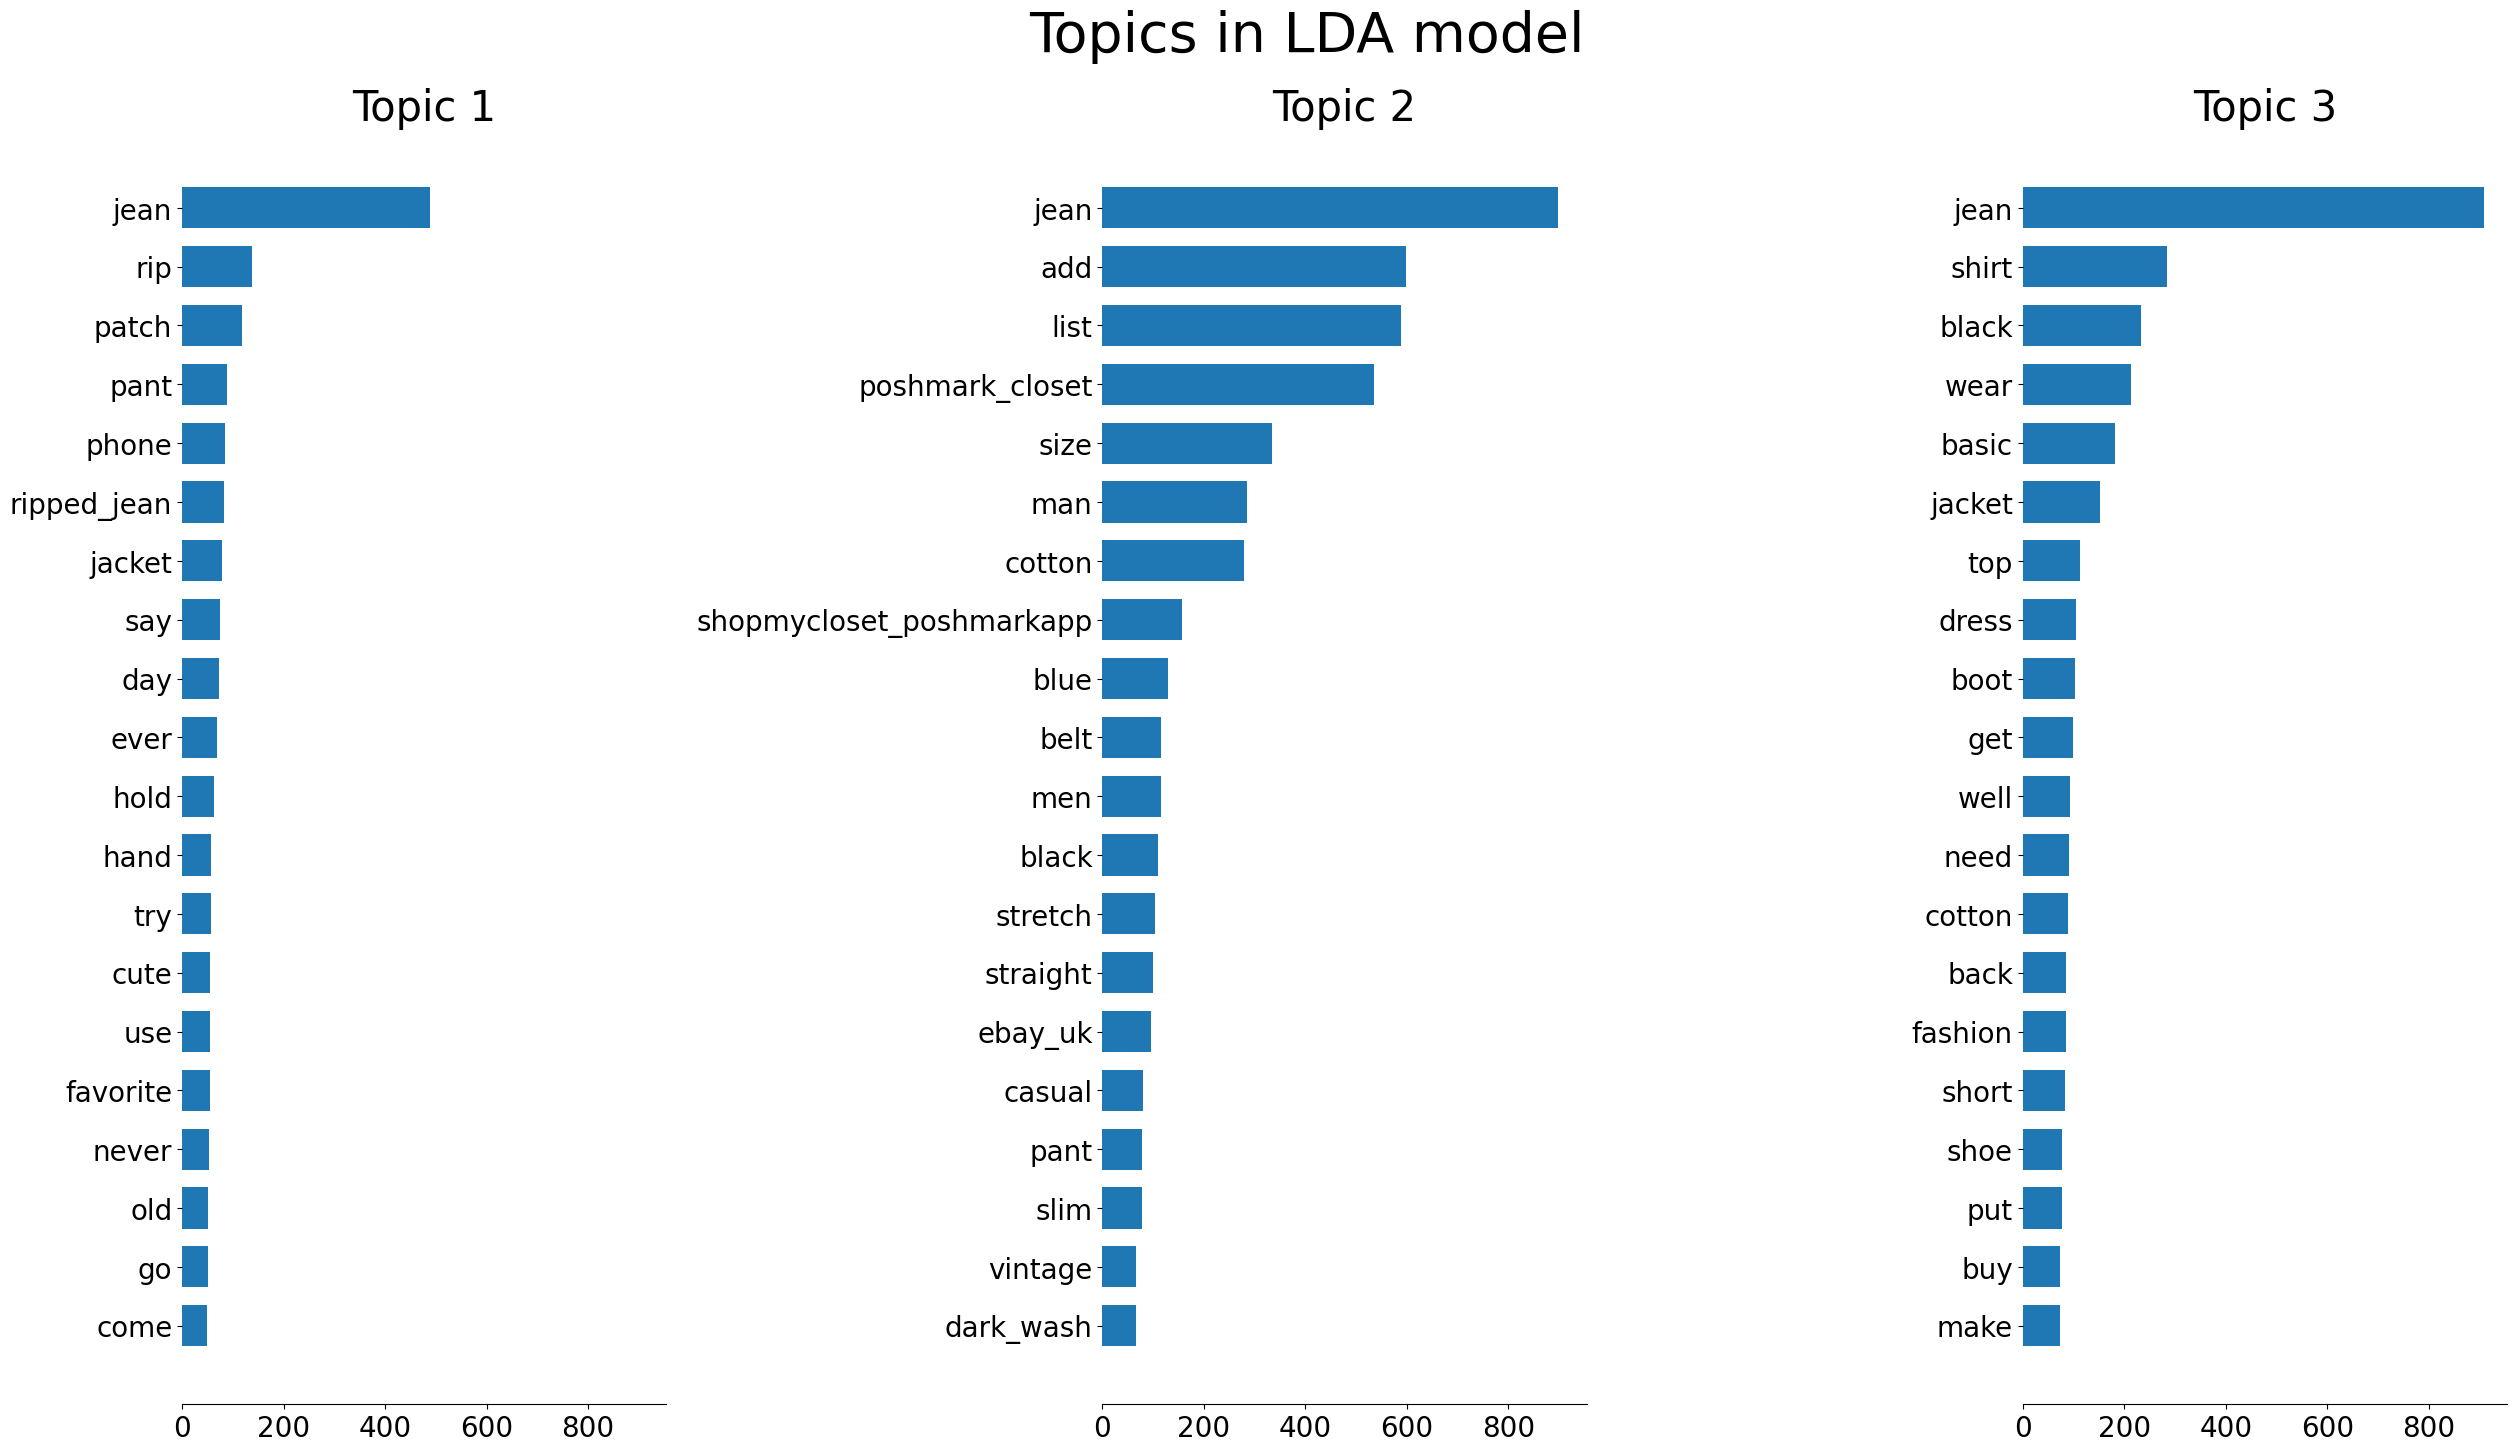

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

##### b. Find  popular keywords in neutral

In [ ]:
# Find the most common words in positive tweets
positive = []
for txt in df6_jean_pos[df6_jean_pos ['sentiment']=='Positive']['cleaned_text'].tolist():
    for word in txt.split():
        positive.append(word)

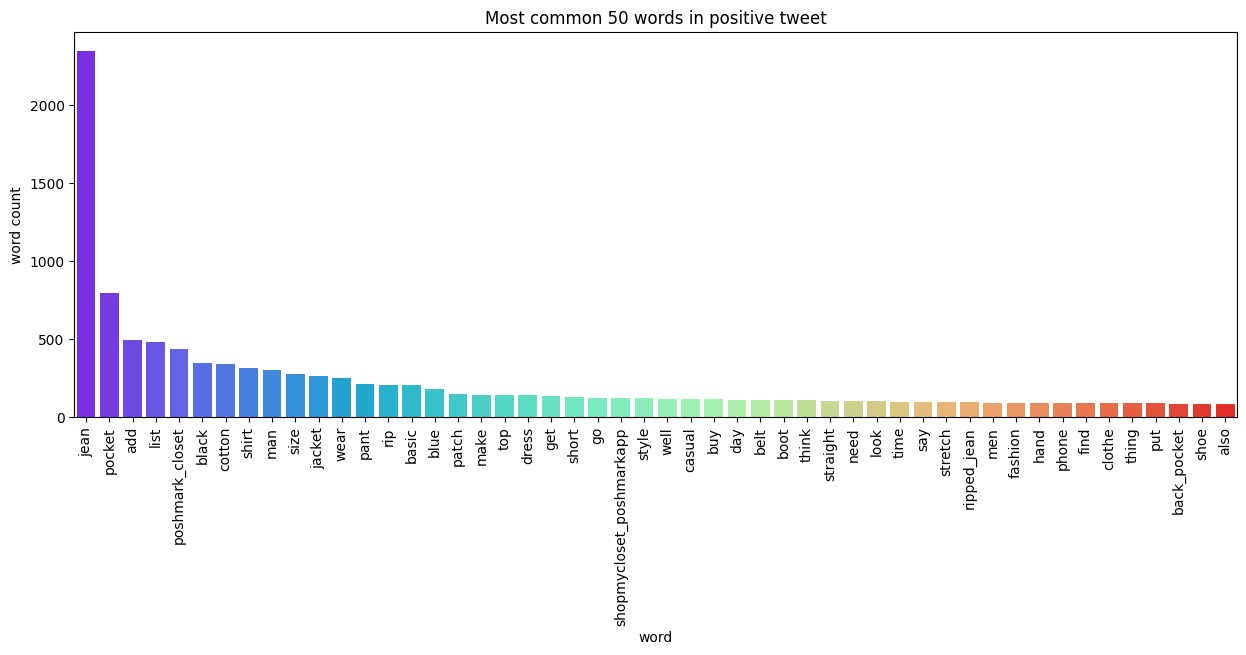

In [ ]:
# plot most 50 common words from positive tweets
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(positive).most_common(50))[0],y=pd.DataFrame(Counter(positive).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in positive tweet')
plt.xticks(rotation=90)
plt.show()

##### c. Positive keyword clustering
[Source](https://github.com/MarcusChong123/Text-Clustering-with-Python/blob/master/kmeans_clustering_tutorial2.py)

Run Elbow method to choose cluster number

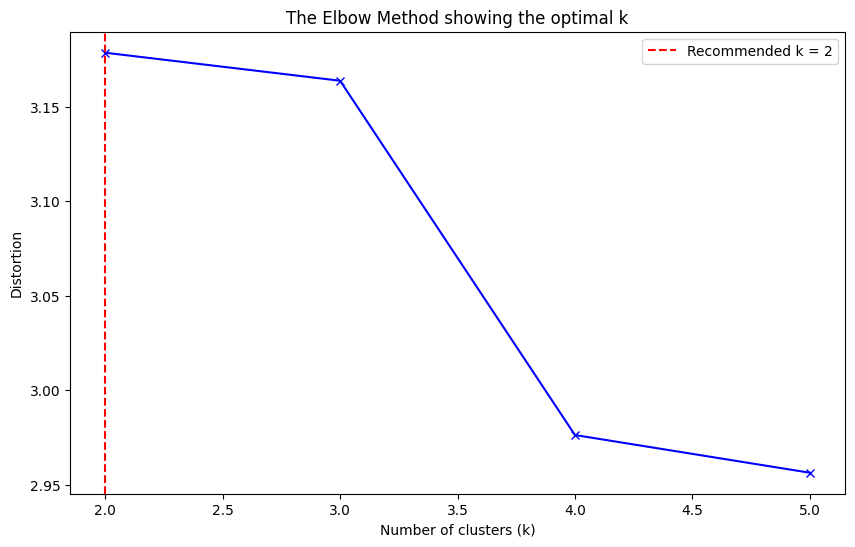

For n_clusters = 2, the average silhouette score is: 0.16043134153806746


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import numpy as np

# Step 1: Convert list-like structures to strings
df_encoded = df6_jean_pos.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))

# Step 2: Convert object types to numerical using LabelEncoder
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Function to calculate the distortion for each k
def calculate_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(
            sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        )
    return distortions

# Step 4: Define range of k and calculate distortions
k_range = range(2, 6)
distortions = calculate_elbow_method(df_scaled, k_range)

# Step 5: Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Step 6: Find the optimal number of clusters (elbow point)
optimal_k = np.argmin(np.gradient(np.gradient(distortions))) + 2
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Recommended k = {optimal_k}')
plt.legend()
plt.show()

# Step 7: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


Check cluster quality using silhouette average
print('Average silhouette score:', visualizer.silhouette_score_)

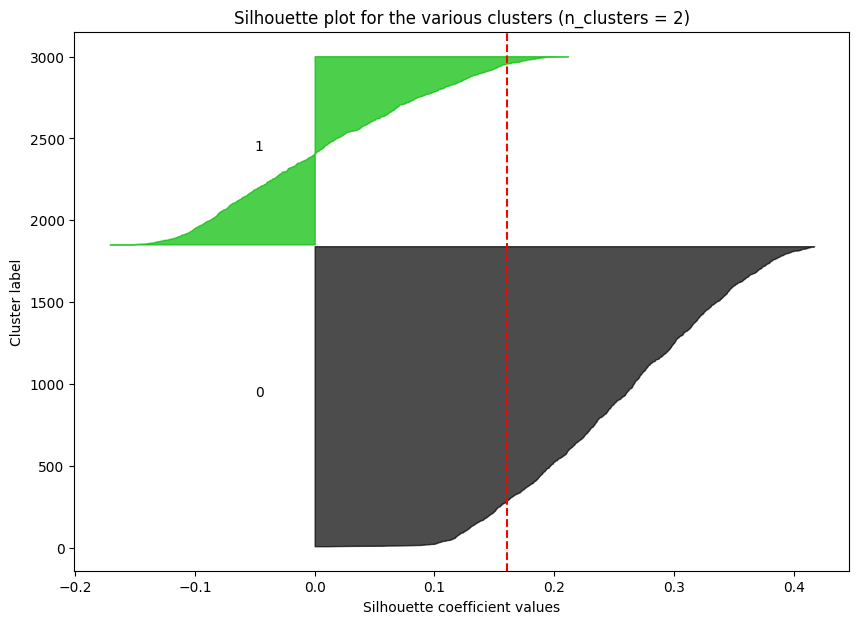

In [ ]:
# Step 8: Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'For n_clusters = {optimal_k}, the average silhouette score is: {silhouette_avg}')

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for the various clusters (n_clusters = {optimal_k})")
plt.show()

# Step 9: Convert the numerical columns back to the original object/text format
for column in label_encoders:
    le = label_encoders[column]
    df_encoded[column] = le.inverse_transform(df_encoded[column])

In [ ]:
#Cluster the words in positive tweets to identify common themes and word groups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df6_jean_pos['cleaned_text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df6_jean_pos['cluster'] = model.labels_
df6_jean_pos

text       Dates  \
16349  the thing about fashion is you do not need muc...  2023-06-26   
29856  he actually matched the shirt well  with basic...  2023-05-26   
32160  louis wore a tommy jeans x aries logo destroye...  2023-05-18   
25959   jeno on  ferragamo instagram post  ecru shirt...  2023-06-06   
17747  rachel sennott wearing the dion lee fw   leath...  2023-06-24   
...                                                  ...         ...   
17610  check out this listing i just added to my  pos...  2023-06-24   
17617  check out colin s bigman men s jeans size w   ...  2023-06-24   
17583  check out this listing i just added to my  pos...  2023-06-24   
17580  check out this listing i just added to my  pos...  2023-06-24   
17577  the material    it looks like made out of leat...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
16349  05:30:57     6357.0        16.0        36.0         175.0         280   
29856  09:36:58     3030.0        12.0         7.0         154.0          77   
32160  05:18:35     2728.0       267.0        16.0         341.0         303   
25959  12:05:11     1155.0         6.0         2.0         314.0         305   
17747  10:28:08      795.0         5.0         2.0          21.0         178   
...         ...        ...         ...         ...           ...         ...   
17610  17:16:03        0.0         0.0         0.0           0.0         174   
17617  16:58:29        0.0         0.0         0.0           0.0         127   
17583  17:51:01        0.0         0.0         0.0           0.0         192   
17580  18:05:27        0.0         0.0         0.0           0.0         190   
17577  18:23:18        0.0         0.0         0.0           0.0         119   

       word_count  sent_count                               hashtags  \
16349          57           2                                     []   
29856          14           1                                     []   
32160          51           3                                     []   
25959          57           3  [JENO, FERRAGAMOPF23, JENOxFERRAGAMO]   
17747          37           1                                     []   
...           ...         ...                                    ...   
17610          30           1               [Poshmark, shopmycloset]   
17617          28           1                                 [eBay]   
17583          33           1               [Poshmark, shopmycloset]   
17580          35           2               [Poshmark, shopmycloset]   
17577          26           3                                     []   

      extracted_words  compound    pos    neu    neg sentiment  \
16349           jeans    0.6908  0.120  0.880  0.000  Positive   
29856           jeans    0.2732  0.149  0.851  0.000  Positive   
32160           jeans    0.2023  0.100  0.837  0.064  Positive   
25959           jeans    0.5719  0.108  0.892  0.000  Positive   
17747           jeans    0.2023  0.053  0.947  0.000  Positive   
...               ...       ...    ...    ...    ...       ...   
17610           jeans    0.2263  0.073  0.927  0.000  Positive   
17617           jeans    0.6124  0.227  0.773  0.000  Positive   
17583           jeans    0.6369  0.144  0.856  0.000  Positive   
17580           jeans    0.4215  0.094  0.906  0.000  Positive   
17577           jeans    0.3612  0.122  0.878  0.000  Positive   

                                            cleaned_text  cluster  
16349  thing fashion need much wardrobe need jean oz ...        1  
29856               actually match shirt well basic jean        1  
32160  wear arie destroy jacket wash recently reimagi...        1  
25959  ecru shirt age pair matching five_pocket regul...        1  
17747  wear dion jean big scrunchie hair stand show p...        1  
...                                                  ...      ...  
17610  list add poshmark_closet vintage ikeda jean ca...        0  
17617  man jean size blu

In [ ]:
#print out 10 feature terms of each cluster

clusters = df6_jean_pos.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['cleaned_text','pos','likeCount','replyCount','retweetCount']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 list
 add
 poshmark_closet
 shopmycloset_poshmarkapp
 jean
 size
 cotton
 man
 pocket
 men
------------
Cluster 1:
 jean
 pocket
 black
 rip
 shirt
 jacket
 wear
 cotton
 basic
 man
------------


#### 4.2.4 Analysis negative words
a. Create negative sentiment word clouds<br/>
b. Finding high-frequency negative words<br/>
c. Text clustering for negative words<br/>

##### a. Generate word clouds word cloud for negative tweets

In [ ]:
df6_jean_neg = df6_jean.drop(df6_jean[df6_jean['sentiment'] != 'Negative'].index)
df6_jean_neg

text       Dates  \
19894  what goes through someone is mind when they pa...  2023-06-19   
29464           raw dogging leather jeans is insane       2023-05-27   
22498   criminalplaza no hate to her at all but it is...  2023-06-13   
28504  yoongi watches the curve of jimin s spine  the...  2023-05-31   
28939  you all i am actually crying   this look is ev...  2023-05-29   
...                                                  ...         ...   
17822  my ass said rip my out these jeans i been gett...  2023-06-24   
17806  check out this listing i just added to my  pos...  2023-06-24   
17471  stop acting like the clipsewasn t wearing xxxl...  2023-06-24   
17536  my copper ring keeps getting caught on my dist...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
29464  20:54:06     2035.0        15.0        34.0         249.0          40   
22498  19:10:58      782.0        14.0        18.0           6.0         105   
28504  17:19:51      758.0         9.0         1.0           3.0         271   
28939  23:55:14      711.0        34.0         0.0         203.0         190   
...         ...        ...         ...         ...           ...         ...   
17822  01:06:39        0.0         0.0         0.0           0.0          64   
17806  02:31:24        0.0         0.0         0.0           0.0         175   
17471  22:28:13        0.0         0.0         0.0           0.0         182   
17536  20:41:32        0.0         0.0         0.0           0.0         136   
17566  19:44:05        0.0         0.0         0.0           0.0          77   

       word_count  sent_count                  hashtags extracted_words  \
19894          60           2                        []           jeans   
29464           7           1                        []           jeans   
22498          28           1                        []           jeans   
28504          59           3                        []           jeans   
28939          42           1                        []           jeans   
...           ...         ...                       ...             ...   
17822          15           1                        []           jeans   
17806          33           2  [Poshmark, shopmycloset]           jeans   
17471          41           1                        []           jeans   
17536          30           2                        []           jeans   
17566          17           1                        []           jeans   

       compound    pos    neu    neg sentiment  
19894   -0.2732  0.078  0.821  0.102  Negative  
29464   -0.4019  0.000  0.649  0.351  Negative  
22498   -0.1901  0.087  0.755  0.157  Negative  
28504   -0.3182  0.040  0.896  0.064  Negative  
28939   -0.4767  0.000  0.914  0.086  Negative  
...         ...    ...    ...    ...       ...  
17822   -0.5423  0.000  0.759  0.241  Negative  
17806   -0.4215  0.000  0.903  0.097  Negative  
17471   -0.4767  0.067  0.755  0.178  Negative  
17536   -0.5574  0.099  0.663  0.238  Negative  
17566   -0.2023  0.137  0.686  0.176  Negative  

[1354 rows x 17 columns]

In [ ]:
words = df6_jean_neg['text'].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["https", "co", "list", 'ad','http','poshmark','shopmycloset','poshmarkapp','closet','ebay','wear','look','http_co','check_list','http_co','check_list','ad_poshmark','jacket','closet','check','add','leather', 'know', 'also', 'get', 'find', 'think', 'want', 'make', 'need', 'go','add','jean','add','see','never','list','wear','pocket'] ) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df6_jean_neg['cleaned_text'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df6_jean_neg['cleaned_text'])

k = 3 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          random_state=10)

Topic#  1
jean,list,add,size,black,cotton,distress,blue,distressed,man,woman,shirt,say,women,wash,boot,shoe,stretch,hair,skinny,wear,pant,go,long,crop,big,thing,basic,light,leave,belt,vintage,rip,people,still,cut,white,steal,make,mean,straight,men,probably,flare,style,tee,work,well,remember,ask

Topic#  2
jean,cotton,pant,shirt,fashion,woman,ever,come,miss,call,kid,hat,find,pair,say,much,even,jacket,fabric,fit,sz,cut_man,hot,color,insane,hate,zip,price,want,year,today,size,wear,style,white,key,stretchy,start,really,school,home,nice,blue,make,eat,cargo,become,do,change,amp

Topic#  3
jean,rip,wear,patch,get,go,back,basic,put,pair,ass,stop_using,urge_levi,phone,new,use,right,pocket,buy,shit,dress,old,tight,bad,always,work,time,guy,short,clothe,take,fit,way,see,pant,really,stop,hole,look,day,front,try,good,still,thigh,shirt,feel,damn,man,make



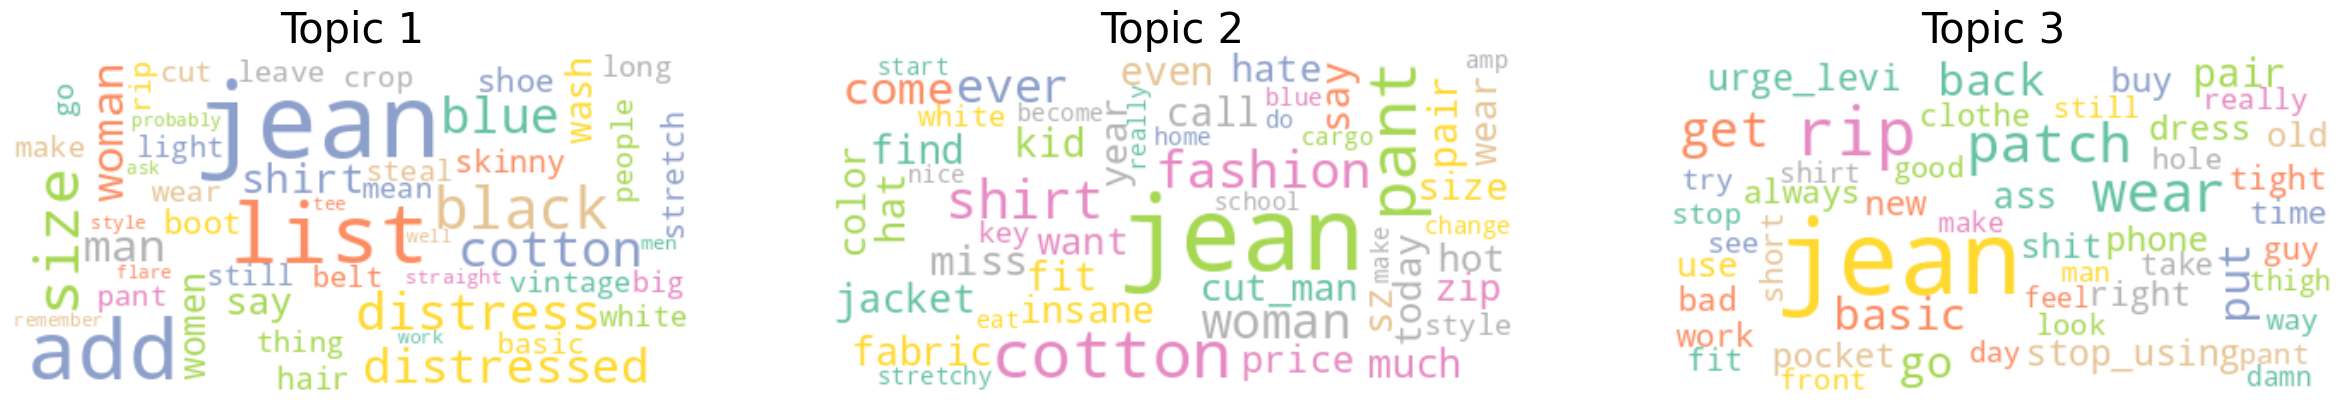

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()
stop_words = []

wcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')


fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

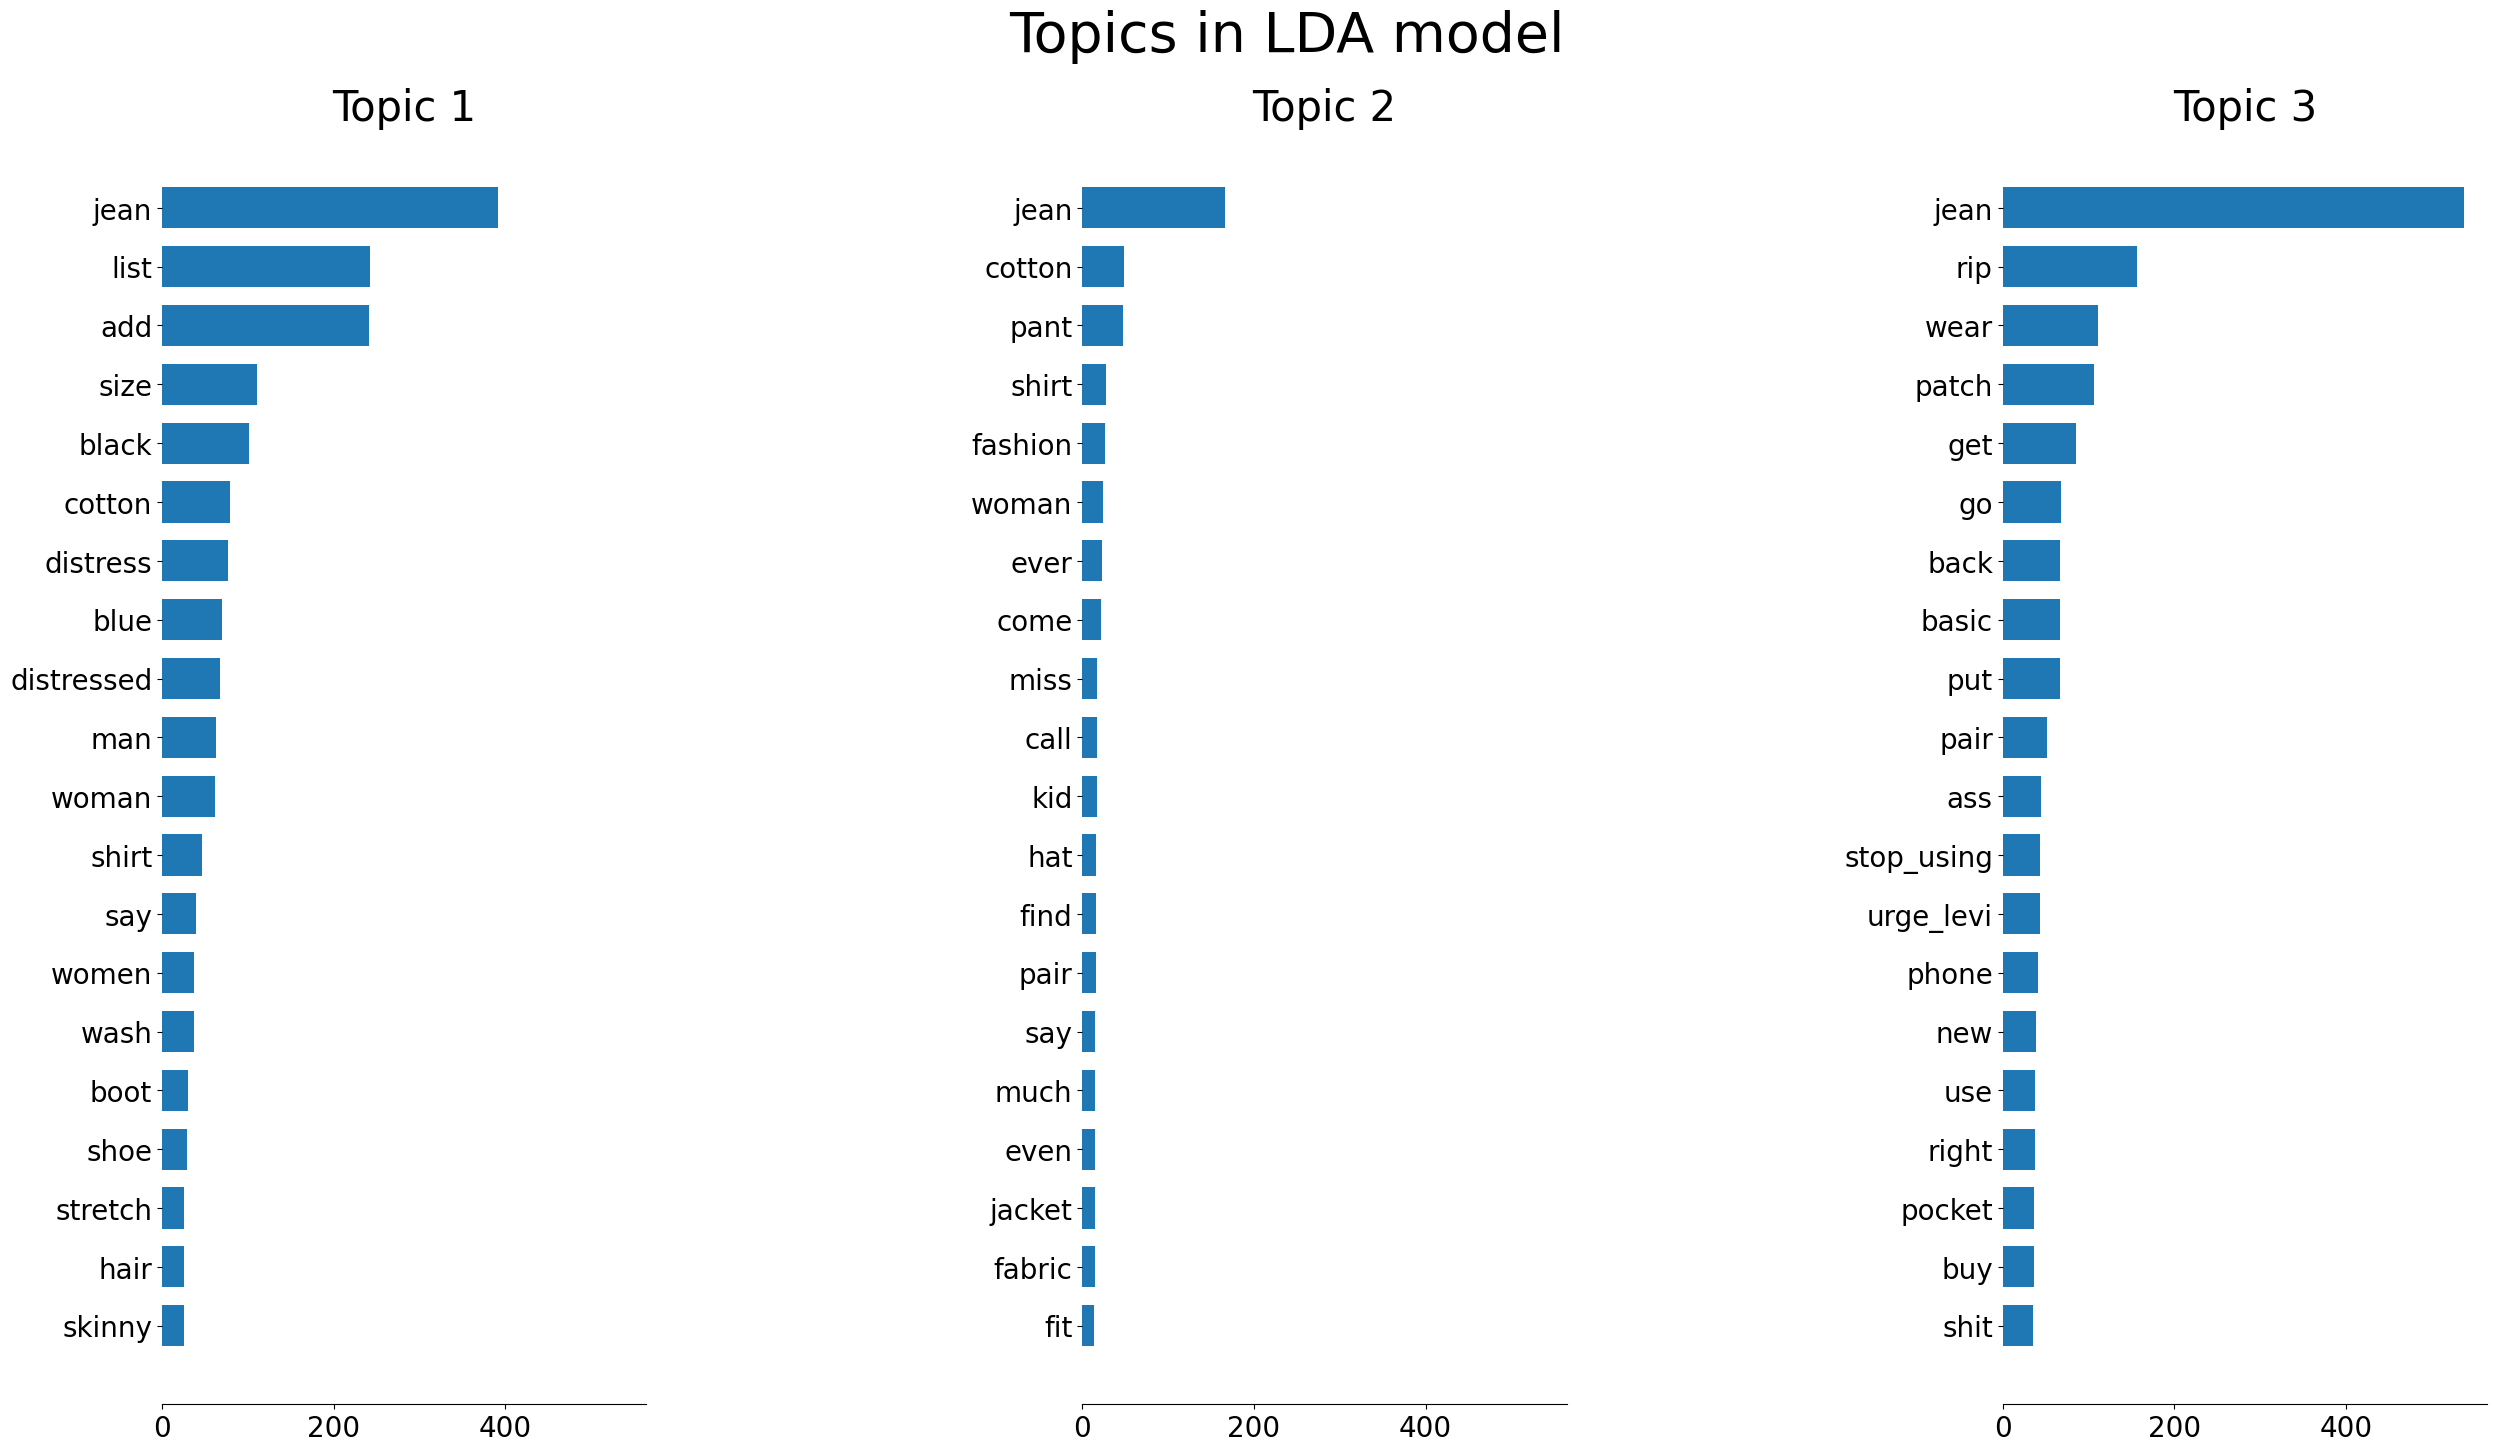

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

##### b. Find  popular keywords in negative

In [ ]:
# Find the most common words in negative tweets
negative = []
for txt in df6_jean_neg[df6_jean_neg ['sentiment']=='Negative']['cleaned_text'].tolist():
    for word in txt.split():
        negative.append(word)

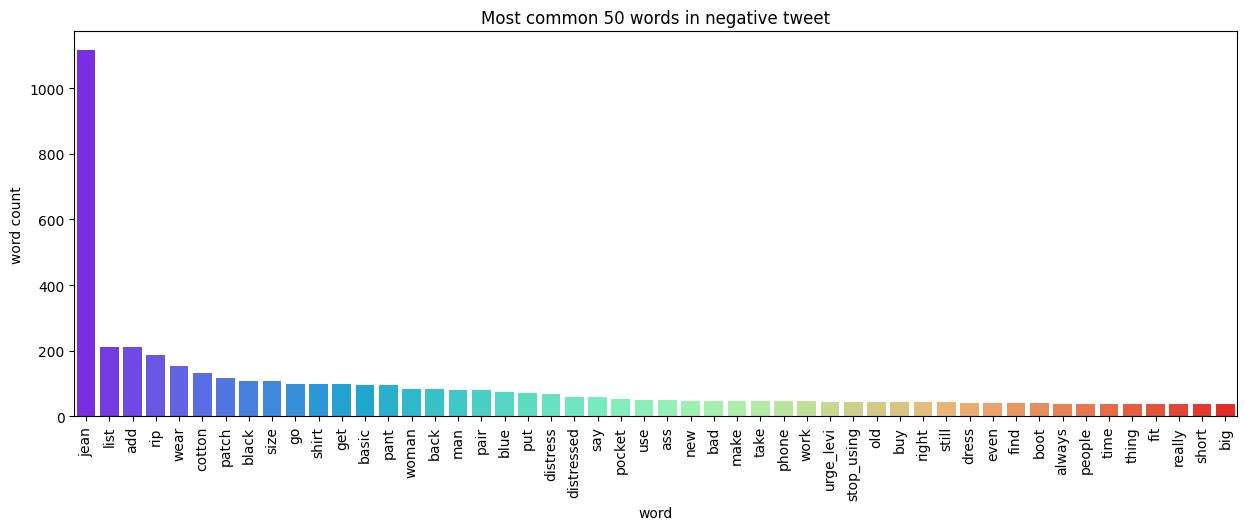

In [ ]:
# plot most 50 common words from negative tweets
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(negative).most_common(50))[0],y=pd.DataFrame(Counter(negative).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in negative tweet')
plt.xticks(rotation=90)
plt.show()

##### c. Negative keyword clustering
[Source](https://github.com/MarcusChong123/Text-Clustering-with-Python/blob/master/kmeans_clustering_tutorial2.py)

Run Elbow method to choose cluster number

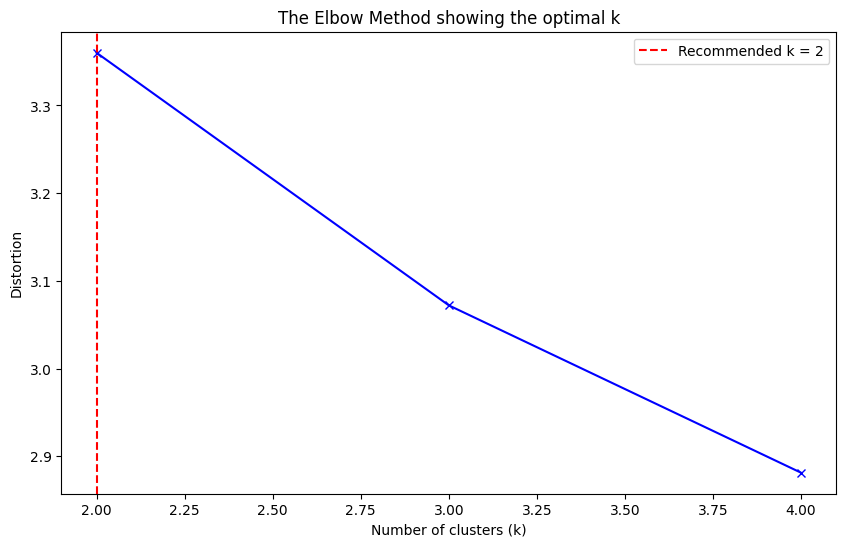

For n_clusters = 2, the average silhouette score is: 0.931964727379353


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import numpy as np

# Step 1: Convert list-like structures to strings
df_encoded = df6_jean_neg.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))

# Step 2: Convert object types to numerical using LabelEncoder
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Function to calculate the distortion for each k
def calculate_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(
            sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        )
    return distortions

# Step 4: Define range of k and calculate distortions
k_range = range(2, 5)
distortions = calculate_elbow_method(df_scaled, k_range)

# Step 5: Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Step 6: Find the optimal number of clusters (elbow point)
optimal_k = np.argmin(np.gradient(np.gradient(distortions))) + 2
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Recommended k = {optimal_k}')
plt.legend()
plt.show()

# Step 7: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


Check cluster quality using silhouette average
print('Average silhouette score:', visualizer.silhouette_score_)

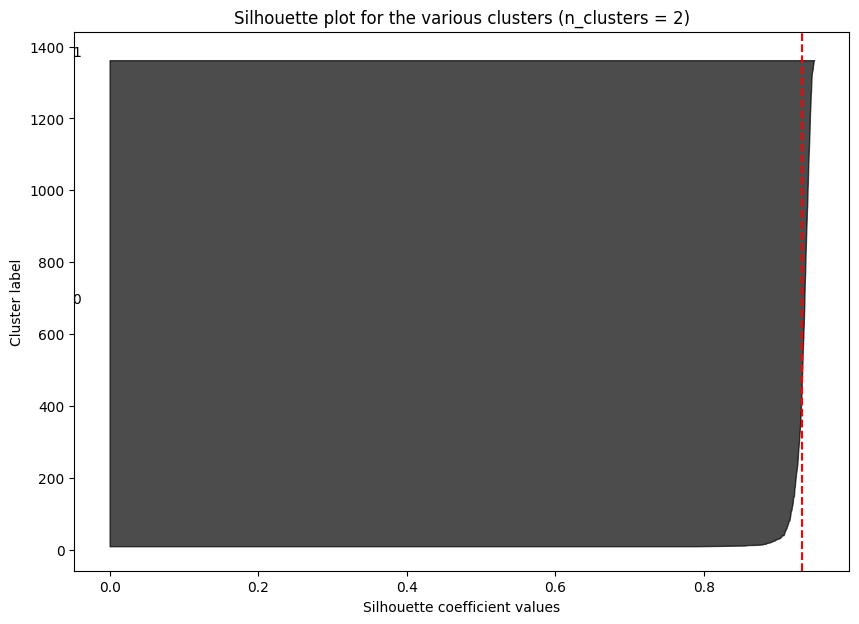

In [ ]:
# Step 8: Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'For n_clusters = {optimal_k}, the average silhouette score is: {silhouette_avg}')

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for the various clusters (n_clusters = {optimal_k})")
plt.show()

# Step 9: Convert the numerical columns back to the original object/text format
for column in label_encoders:
    le = label_encoders[column]
    df_encoded[column] = le.inverse_transform(df_encoded[column])

In [ ]:
#Cluster the words in neutral tweets to identify common themes and word groups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df6_jean_neg['cleaned_text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df6_jean_neg['cluster'] = model.labels_
df6_jean_neg

text       Dates  \
19894  what goes through someone is mind when they pa...  2023-06-19   
29464           raw dogging leather jeans is insane       2023-05-27   
22498   criminalplaza no hate to her at all but it is...  2023-06-13   
28504  yoongi watches the curve of jimin s spine  the...  2023-05-31   
28939  you all i am actually crying   this look is ev...  2023-05-29   
...                                                  ...         ...   
17822  my ass said rip my out these jeans i been gett...  2023-06-24   
17806  check out this listing i just added to my  pos...  2023-06-24   
17471  stop acting like the clipsewasn t wearing xxxl...  2023-06-24   
17536  my copper ring keeps getting caught on my dist...  2023-06-24   
17566  i might be the only person that rip my tag off...  2023-06-24   

           Time  likeCount  quoteCount  replyCount  retweetCount  char_count  \
19894  07:13:38    22214.0       370.0       688.0         881.0         278   
29464  20:54:06     2035.0        15.0        34.0         249.0          40   
22498  19:10:58      782.0        14.0        18.0           6.0         105   
28504  17:19:51      758.0         9.0         1.0           3.0         271   
28939  23:55:14      711.0        34.0         0.0         203.0         190   
...         ...        ...         ...         ...           ...         ...   
17822  01:06:39        0.0         0.0         0.0           0.0          64   
17806  02:31:24        0.0         0.0         0.0           0.0         175   
17471  22:28:13        0.0         0.0         0.0           0.0         182   
17536  20:41:32        0.0         0.0         0.0           0.0         136   
17566  19:44:05        0.0         0.0         0.0           0.0          77   

       word_count  sent_count                  hashtags extracted_words  \
19894          60           2                        []           jeans   
29464           7           1                        []           jeans   
22498          28           1                        []           jeans   
28504          59           3                        []           jeans   
28939          42           1                        []           jeans   
...           ...         ...                       ...             ...   
17822          15           1                        []           jeans   
17806          33           2  [Poshmark, shopmycloset]           jeans   
17471          41           1                        []           jeans   
17536          30           2                        []           jeans   
17566          17           1                        []           jeans   

       compound    pos    neu    neg sentiment  \
19894   -0.2732  0.078  0.821  0.102  Negative   
29464   -0.4019  0.000  0.649  0.351  Negative   
22498   -0.1901  0.087  0.755  0.157  Negative   
28504   -0.3182  0.040  0.896  0.064  Negative   
28939   -0.4767  0.000  0.914  0.086  Negative   
...         ...    ...    ...    ...       ...   
17822   -0.5423  0.000  0.759  0.241  Negative   
17806   -0.4215  0.000  0.903  0.097  Negative   
17471   -0.4767  0.067  0.755  0.178  Negative   
17536   -0.5574  0.099  0.663  0.238  Negative   
17566   -0.2023  0.137  0.686  0.176  Negative   

                                            cleaned_text  cluster  
19894  go mind pair shiny satin tie evening formal ro...        1  
29464                                raw dog jean insane        1  
22498                     hate basic crop_top basic jean        1  
28504  watch curve jimin spine way jimin lean rail ey...        1  
28939  actually cry wet hair jean black blazer forehe...        1  
...                                                  ...      ...  
17822                               say jean get big boo        1  
17806  list add cotton kid girl distress light_wash r...        0  
17471  stop act clipsewasn wear wit jean hide upper t...        1  
17536  copper ring keep get catch distressed

In [ ]:
#print out 10 feature terms of each cluster

clusters = df6_jean_neg.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['cleaned_text','neg','likeCount','replyCount','retweetCount']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 list
 add
 size
 jean
 distress
 distressed
 cotton
 woman
 women
 blue
------------
Cluster 1:
 jean
 rip
 patch
 wear
 pant
 stop_using
 urge_levi
 cotton
 basic
 shirt
------------
